In [65]:
library(ggplot2)
library(gcookbook)

# 第七章 注解

除了坐标轴标签、刻度线和图例这些标准的保留元素，还可以向图形添加独立的图形或文本元素。这些元素可用于增加额外的上下文信息、高亮图形的某个区域，或是补充一些关于数据的描述性文本。

## 添加文本注解

使用 `annotate()` 和一个文本类几何对象

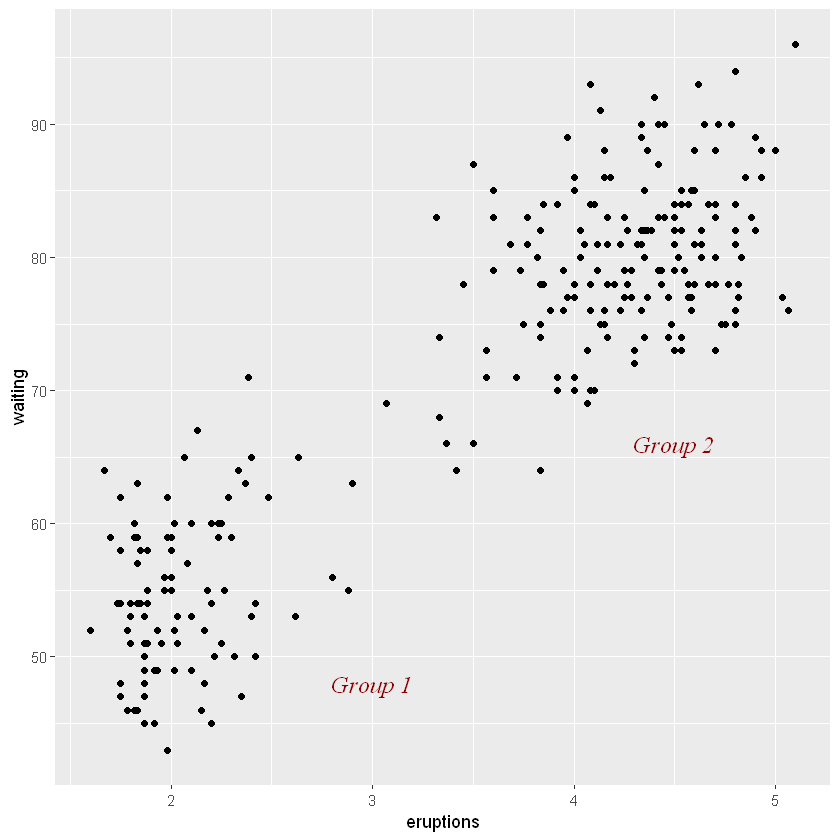

In [16]:
p <- ggplot(faithful, aes(x=eruptions, y=waiting)) + geom_point()

p + annotate('text', x=3, y=48, label='Group 1', family='serif',fontface='italic',color='darkred',size=5) + 
 annotate('text', x=4.5, y=66, label='Group 2', family='serif',fontface='italic',color='darkred',size=5)

当你希望添加独立的文本对象时，千万不要使用`geom_text()`。`annotate(geom='text')`会向图形添加一个单独的文本对象，而geom_text()却会根据数据创建许多的文本对象。
如果使用geon_text()，文本会在相同的位置被严重遮盖，每个数据点各重绘了一次：

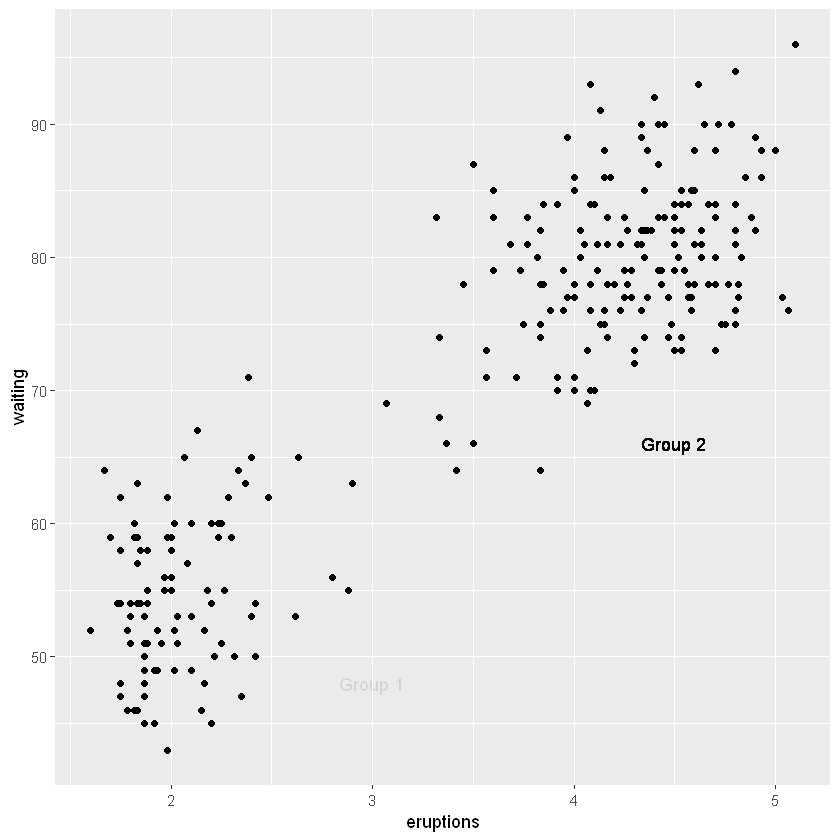

In [18]:
p + annotate('text', x=3, y=48, label='Group 1', alpha=.1) +  # 正常
 geom_text(x=4.5, y=66, label='Group 2', alpha=.1)  # 遮盖绘制

在上图中，每个文本标签都是90%透明的，这样就很清楚地展示出了哪一个被遮盖绘制了（geom_text被遮盖绘制）。在输出为点阵格式时，遮盖绘制问题可能会导致边缘走样（有锯齿）。

如果坐标轴是连续型的，你可以使用特殊值 Inf 和 -Inf 在绘图区域的边缘放置文本注解。  
同时，也需要使用hjust和vjust来调整文本相对于边角的位置——如果你让它们留在默认值的位置上，这些文本就会居中于边界线之上。  
要将文本定位到理想的位置，可能需要进行一些尝试：

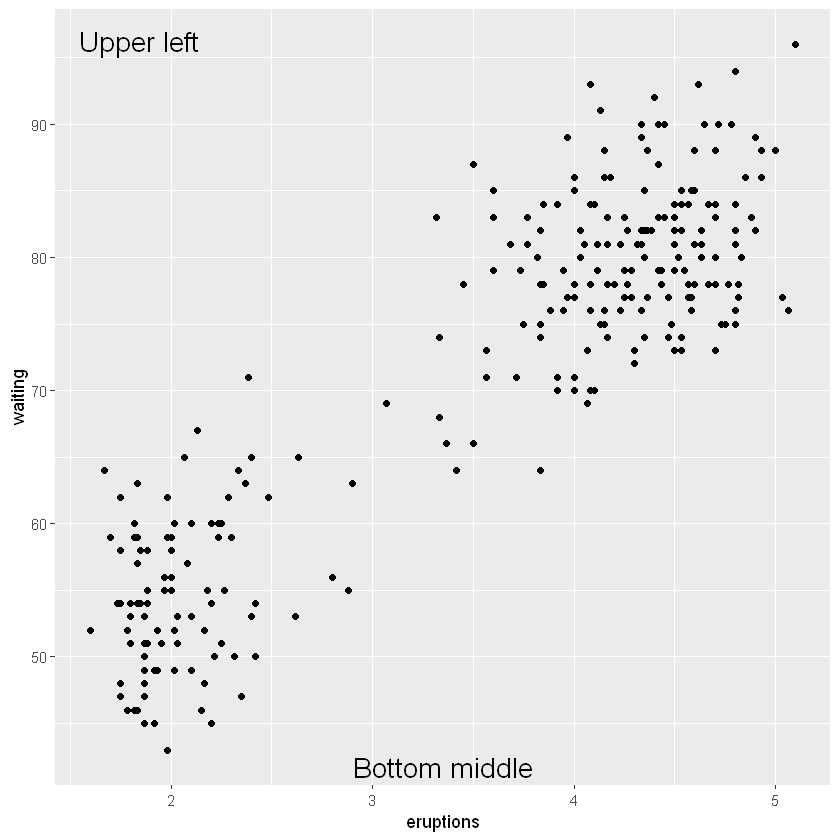

In [24]:
p + annotate('text', x=-Inf, y=Inf, label='Upper left', hjust=-.2, vjust=2, size=6) + 
 annotate('text', x=mean(range(faithful$eruptions)), y=-Inf, vjust=-0.4, 
         label='Bottom middle',size=6)

## 在注释中使用数学表达式

使用`annotate(geom='text')`并设置`parse=TRUE`

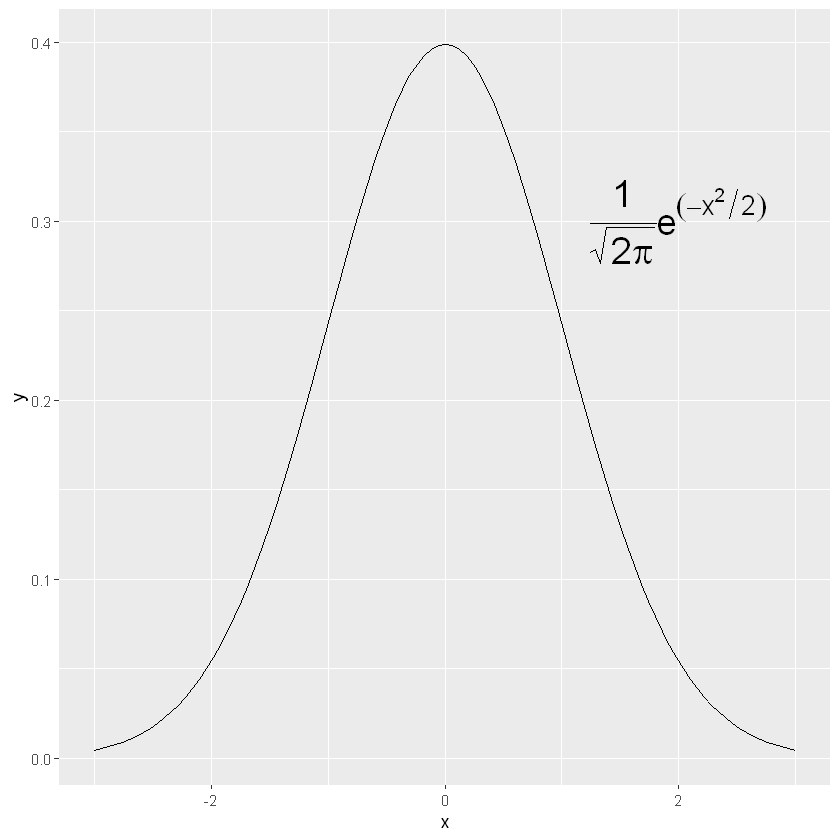

In [29]:
# 一条正态曲线

p <- ggplot(data.frame(x=c(-3,3)), aes(x=x)) + stat_function(fun = dnorm)

p + annotate('text', x=2, y=0.3, parse=TRUE,
           label='frac(1, sqrt(2 * pi)) * e ^ (-x^2 / 2)', size=8)

💬**讨论**  
在ggplot2中使用`parse=TRUE`和文本类几何对象创建的数学表达式，和那些在R基础图形中利用 plotmath 和 expression 创建的数学表达式有着类似的格式，唯一的区别是，前者以字符串的形式存储，而后者是表达式对象。

要将常规文本融入表达式中，只需在双引号内使用单引号（或者反过来）标出纯文本的部分即可。<font color='red'>通过内部引号闭合的每一块文本都将被作为数学表达式中的一个变量对待</font>。  

切记，在R的数学表达式语法中，你不能简单地把一个变量直接放到另一个变量旁边而不在中间加上任何记号。

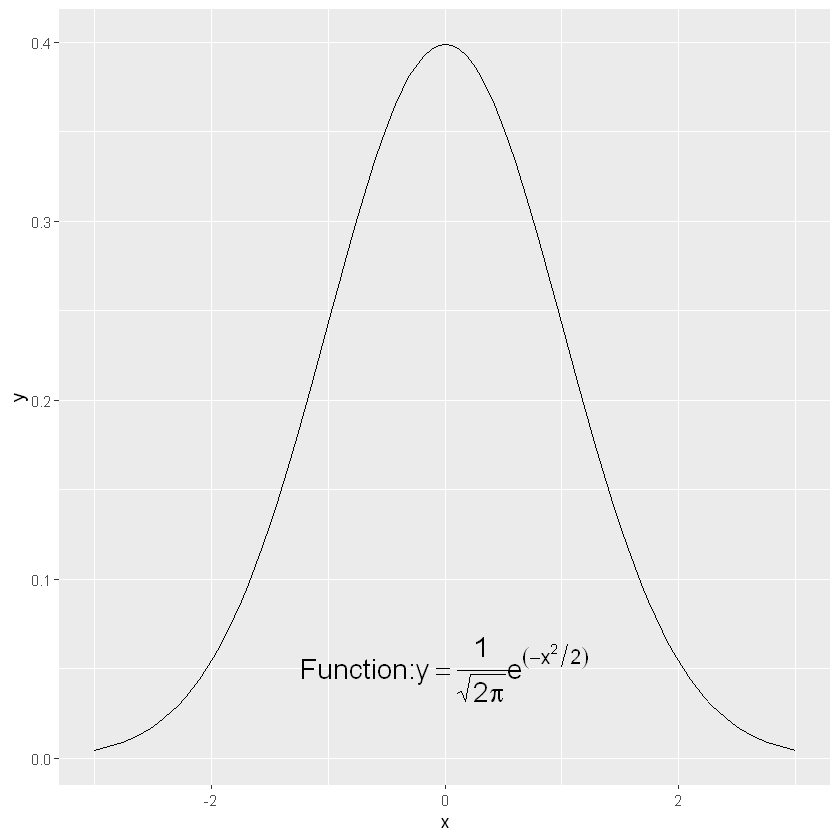

In [33]:
p + annotate('text', x=0, y=0.05, parse=TRUE, size=6,
            label="'Function:' * y==frac(1,sqrt(2 * pi)) * e^(-x^2/2) ")

❗ 表达式中，"="是没有意义的，"=="才是等号的含义  
在如上表达式中，'function' 和 y 中间放了一个 * 操作符，它会被当作一个不可见的乘号对待（要显示一个可见的乘号，需要使用%*%）.

## 添加直线

对于横线和竖线，使用 `geom_hline()` 和 `geom_vline()`即可。对于有角度的直线，则可以使用geom_abline()。对于下例，我们将使用 heightweight 数据集：

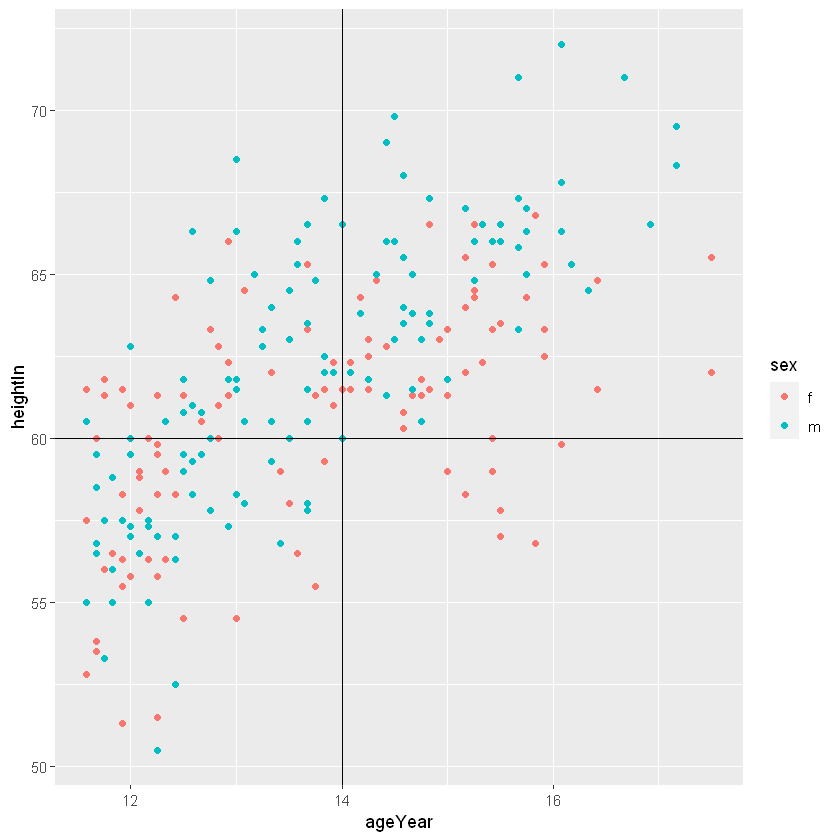

In [34]:
p <- ggplot(heightweight, aes(x=ageYear, y=heightIn, color=sex)) + geom_point()

# 添加横线和竖线
p + geom_hline(yintercept = 60) + geom_vline(xintercept = 14)

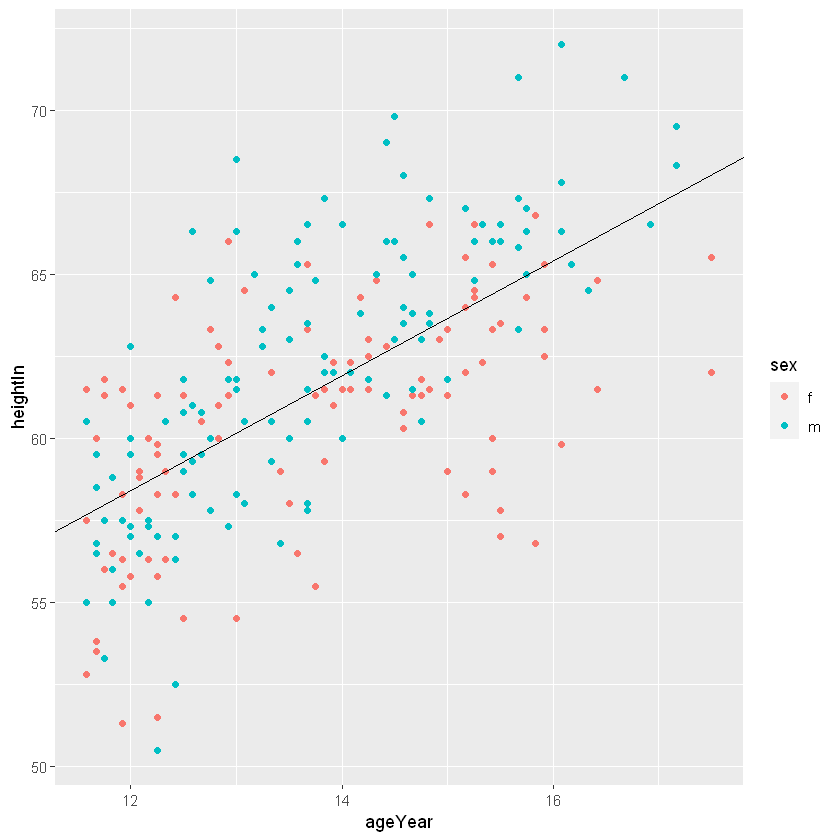

In [35]:
# 添加有角度的直线
p + geom_abline(intercept = 37.4, slope = 1.75)

上例演示了手动设置直线位置的方法，效果是每添加一个几何对象绘制一条线。我们也可以将值从数据映射到xintercept、yintercept等之上，甚至是绘制另一个数据框中的值

我们将在这里计算男性和女性的平均身高，并将它们存储到一个数据框hw_means中。然后为每个均值绘制一条水平线，并手工设定linetype和size：

In [36]:
library(plyr) # 为了使用ddply()函数

In [41]:
hw_means <- ddply(heightweight, 'sex', summarise, heightIn=mean(heightIn))
hw_means

sex,heightIn
<fct>,<dbl>
f,60.52613
m,62.06000


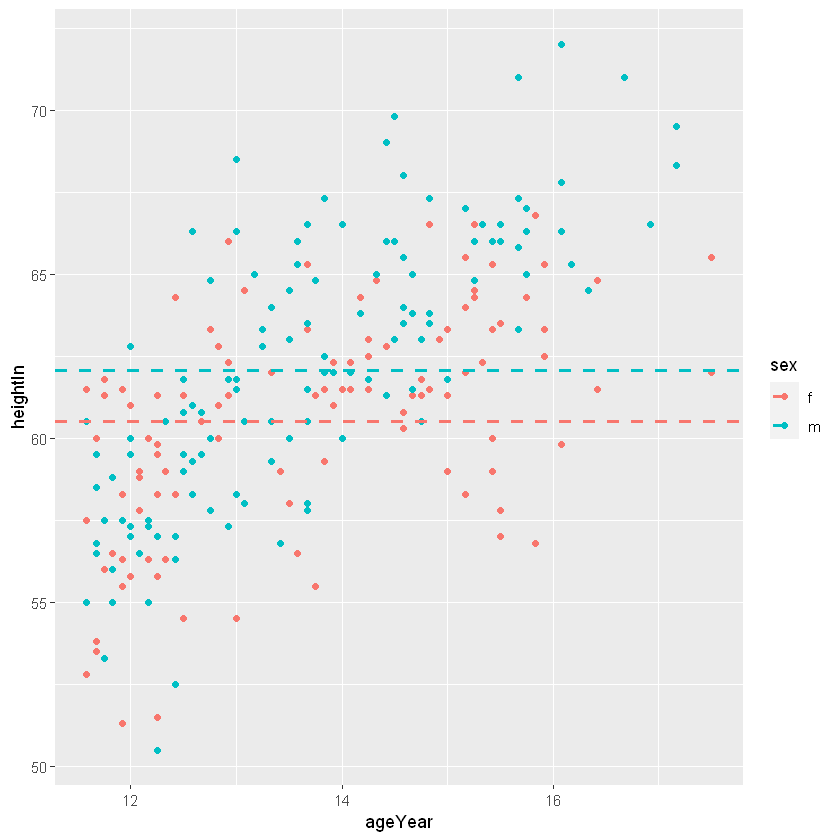

In [42]:
p + geom_hline(aes(yintercept=heightIn,color=sex), data=hw_means,
              linetype='dashed', size=1)

如果某个坐标轴是离散型而不是连续型的，不能以字符串的形式直接指定截距——必须仍以数字的形式指定它们。  
假设此坐标轴表示一个因子，那么第一个水平为数值1，第二个水平为数值2，依次类推。可以像下面这种手工指定数值型的截距，或者使用which(levels(...))计算所需数值：

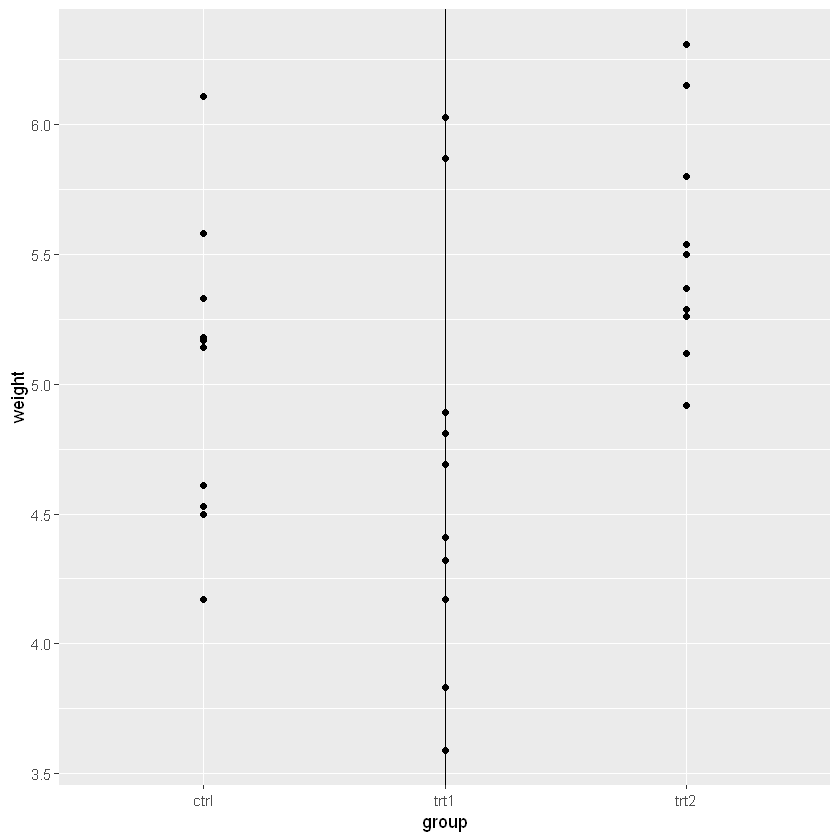

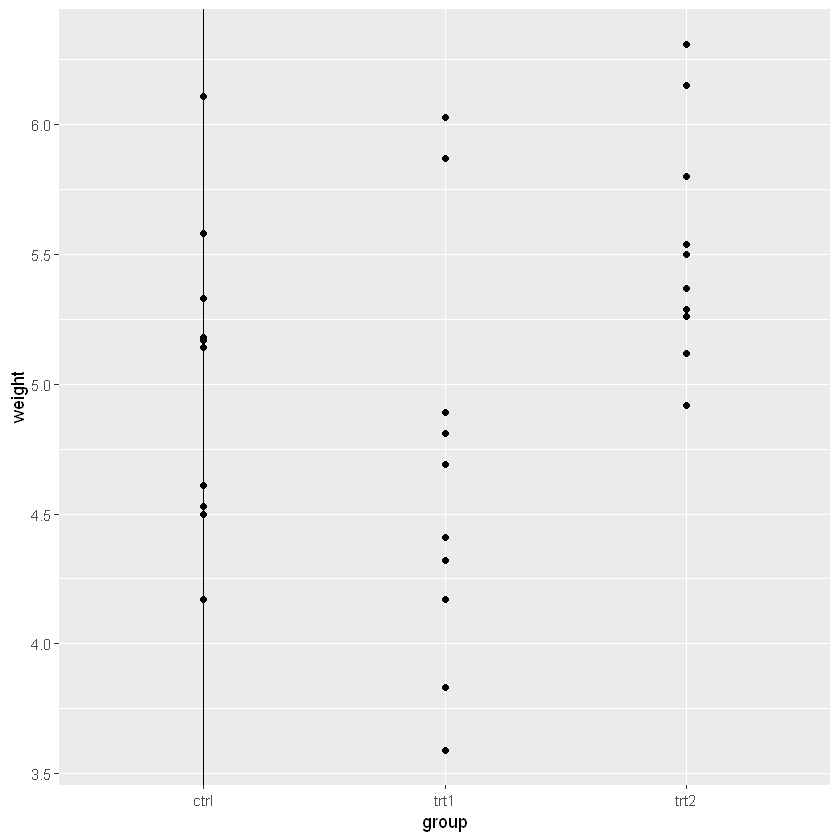

In [3]:
pg <- ggplot(PlantGrowth, aes(x=group, y=weight)) + geom_point()

pg + geom_vline(xintercept = 2)

pg + geom_vline(xintercept = which(levels(PlantGrowth$group)=='ctrl'))

## 添加线段和箭头

使用`annotate('segment')`

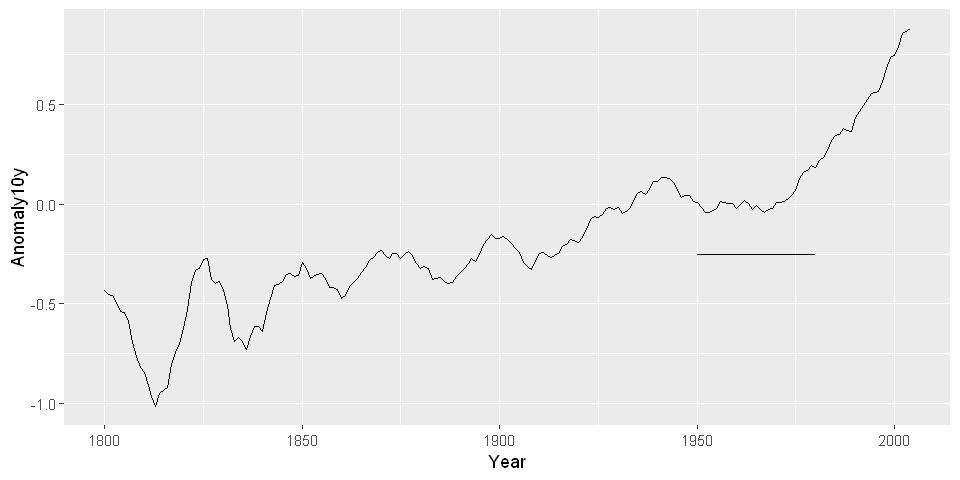

In [12]:
options(repr.plot.width=8, repr.plot.height=4)
p <- ggplot(subset(climate, Source=='Berkeley'), aes(x=Year, y=Anomaly10y)) + 
 geom_line()

p + annotate('segment', x=1950, xend=1980,y=-.25, yend = -.25)

可以使用 grid 包中的`arrow()`函数向线段两端添加箭头或平头

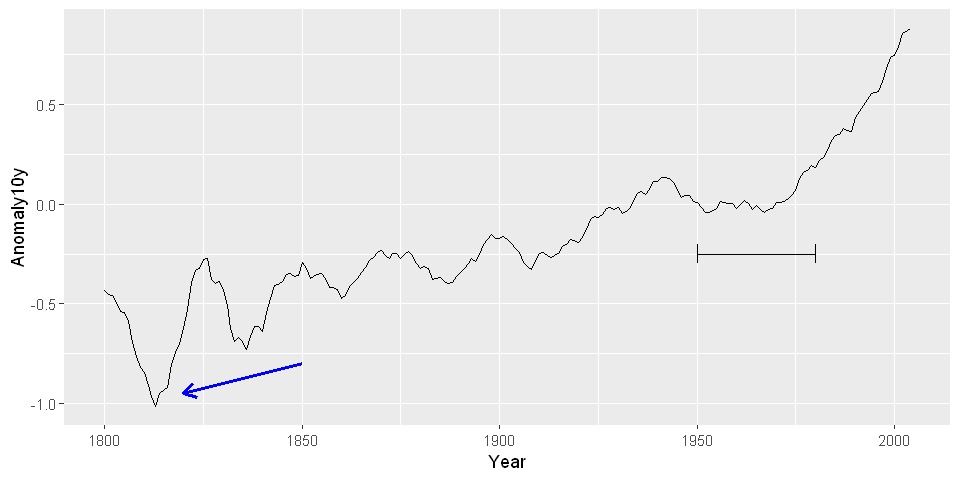

In [13]:
library(grid)
p + annotate('segment', x = 1850, xend = 1820, y = -.8, yend = -.95, color = 'blue', size = 1, arrow=arrow(length = unit(.3, 'cm'))) + 
    annotate('segment', x=1950, xend=1980,y=-.25, yend = -.25,
            arrow=arrow(ends = 'both', angle = 90, length = unit(.2, 'cm')))

箭头线的默认角度（angle）为30度，默认长度（length）为0.2英寸（0.508厘米）。如果一个或多个坐标轴是离散型的，则 x 和 y 的位置即由拥有坐标值1,2,3等的类别项表示。

## 添加矩形阴影

💡 使用`annotate('rect')`

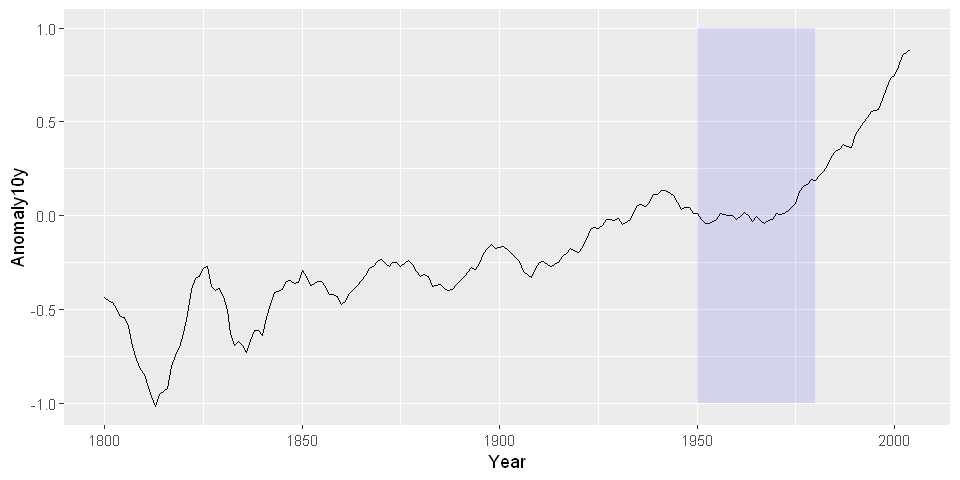

In [14]:
p <- ggplot(subset(climate, Source=='Berkeley'), aes(x=Year, y=Anomaly10y)) + 
        geom_line()

p + annotate('rect', xmin = 1950, xmax = 1980, ymin = -1, ymax = 1, alpha = .1, fill = 'blue')

💬**讨论**  
每一个图层都是按照添加到ggplot对象的先后顺序绘制的。  

只要传递了合适的参数，任意几何对象都是可以配合`annotate()`使用。在本例中，`geom_rect()`所需的参数是 x 和 y 的最大值和最小值。

## 高亮某一元素

要高亮一个或多个元素，需要在数据中创建一个新列并将其映射为颜色。在本例中，我们将创建一个新列 h1， 并根据 group 的值来设定它的值：

In [16]:
pg <- PlantGrowth
pg$h1 <- 'no'
pg$h1[pg$group=='trt2'] <- 'yes'

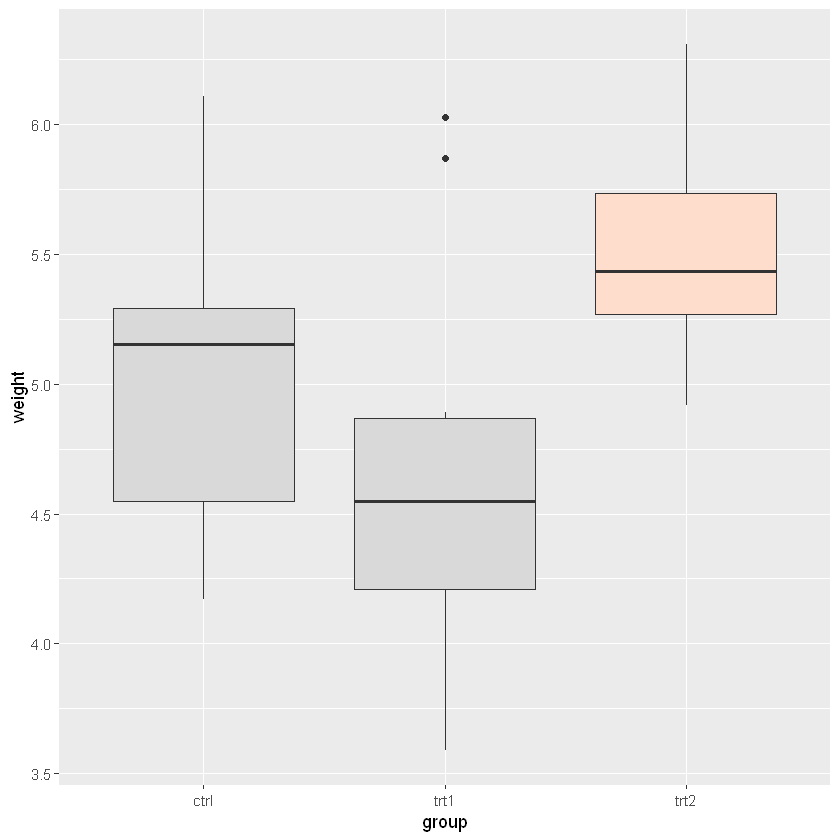

In [19]:
options(repr.plot.width=7, repr.plot.height=7)
ggplot(pg, aes(x=group, y=weight, fill=h1)) + geom_boxplot() + 
 scale_fill_manual(values = c('grey85', '#FFDDCC'), guide='none')

## 添加误差线

使用`geom_errorbar()`并将变量映射到 ymin 和 ymax（当横向作图时，为 xmin 和 xmax）。对于条形图和折线图，添加误差线的方法相同。

In [20]:
ce <- subset(cabbage_exp, Cultivar == 'c39')
head(ce,2)

,Cultivar,Date,Weight,sd,n,se
,<fct>,<fct>,<dbl>,<dbl>,<int>,<dbl>
1,c39,d16,3.18,0.9566144,10,0.30250803
2,c39,d20,2.80,0.2788867,10,0.08819171


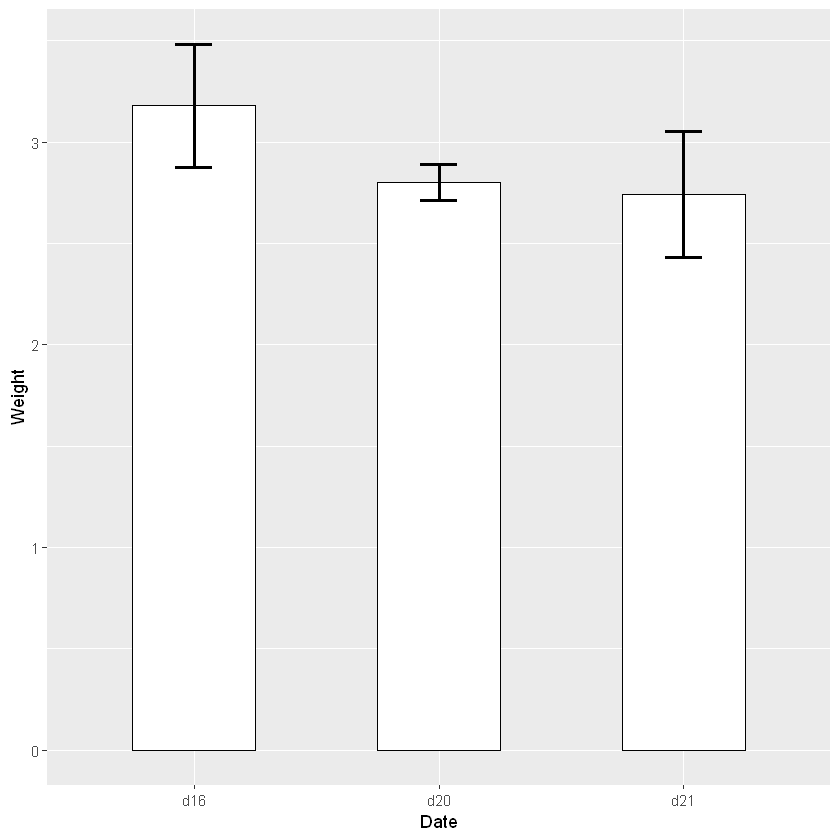

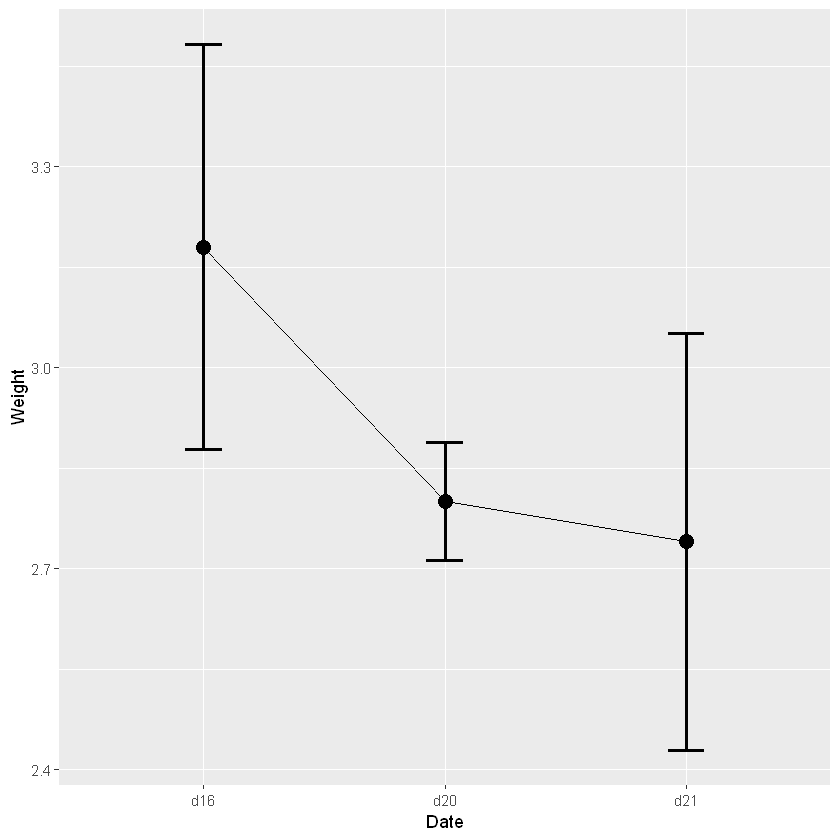

In [36]:
# 为条形图添加误差线
ggplot(ce, aes(x=Date, y=Weight)) + 
 geom_bar(fill='white', color='black', stat = 'identity', width = 0.5) + 
 geom_errorbar(aes(ymin=Weight - se, ymax=Weight + se), width = 0.15, size = 1)

# 为折线图添加误差线
ggplot(ce, aes(x=Date, y=Weight)) + 
 geom_line(aes(group=1)) + 
 geom_point(size = 4) + 
 geom_errorbar(aes(ymin=Weight - se, ymax=Weight + se), width = 0.15, size = 1)

关于 `geom_line()`中设置group，可参见[第四章折线图](#绘制简单折线图)

💬**讨论**  
对于一幅分组的条形图，各误差线也必须被并列（dodged）；（参见[绘制簇状条形图](#绘制簇状条形图)以了解关于分组条形图和并列的更多信息）。

In [37]:
head(cabbage_exp, 2)

,Cultivar,Date,Weight,sd,n,se
,<fct>,<fct>,<dbl>,<dbl>,<int>,<dbl>
1,c39,d16,3.18,0.9566144,10,0.30250803
2,c39,d20,2.80,0.2788867,10,0.08819171


`geom_bar()`的默认并列宽度为0.9，必须让误差线的并列宽度与此相同。如果不指定并列宽度，则默认按误差线的宽度并列，而此宽度通常小于条形的宽度：

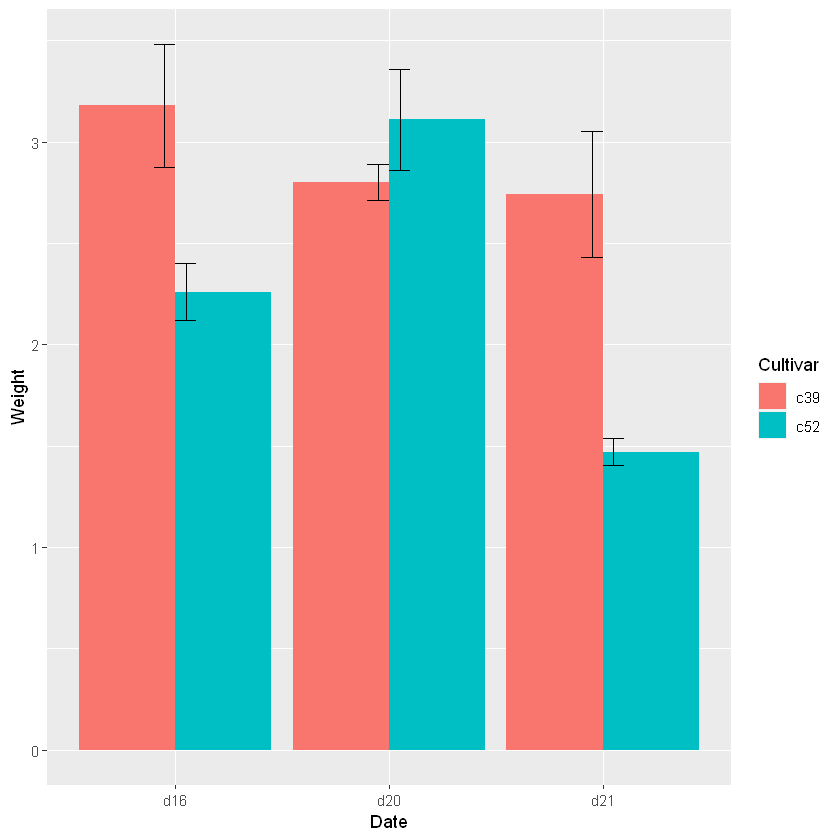

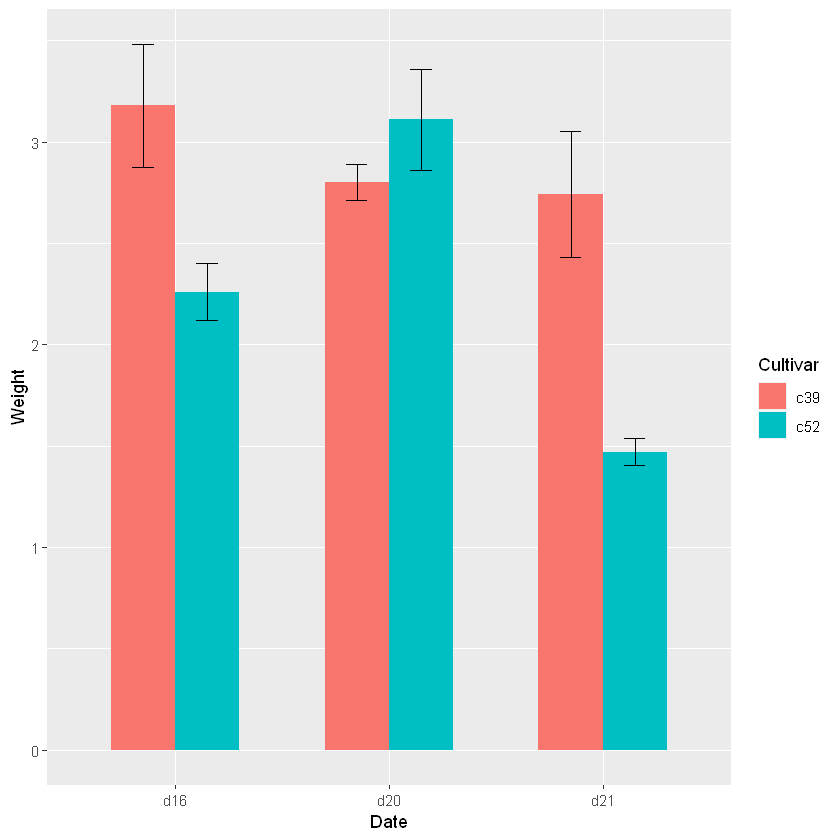

In [51]:
# 反例：未指定并列宽度
ggplot(cabbage_exp, aes(x=Date, y=Weight, fill=Cultivar)) + 
 geom_bar(position = 'dodge', stat = 'identity') + 
 geom_errorbar(aes(ymin=Weight-se, ymax=Weight+se),
              position='dodge', width=0.2)

# 正例：设定列宽与条形的相同
ggplot(cabbage_exp, aes(x=Date, y=Weight, fill=Cultivar)) + 
 geom_bar(position = 'dodge', stat = 'identity', width = 0.6) + 
 geom_errorbar(aes(ymin=Weight-se, ymax=Weight+se),
              position=position_dodge(0.6), width=0.2, )

对于折线图和点图，应 先绘制误差线，这样它们就会位于点和线的下层。

应当同时并列所有的几何元素，这样它们就会同误差线对齐。

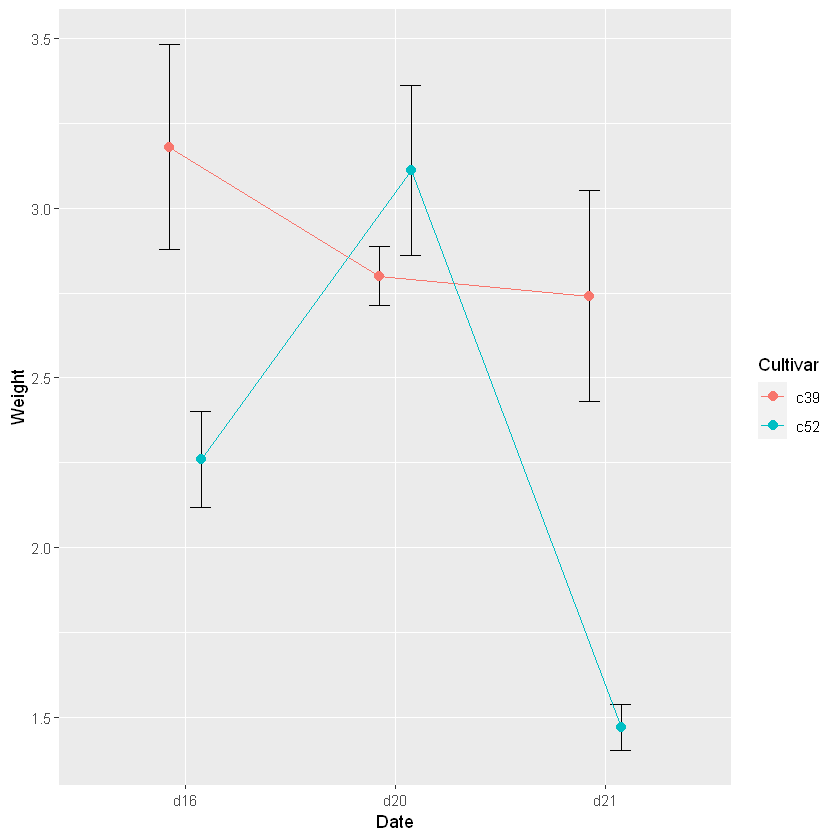

In [49]:
pd <- position_dodge(.3) # 保存并列设置，因为我们要重复使用

ggplot(cabbage_exp, aes(x=Date, y=Weight, color=Cultivar, group=Cultivar)) + 
 geom_errorbar(aes(ymin=Weight-se, ymax=Weight+se), position = pd, width=0.2, color = 'black') + 
 geom_line(position = pd) + 
 geom_point(position = pd, size = 2.5)

通过将 Cultivar 映射到 group 的方式来确保它被作为分组变量使用。  
当一个离散型变量被映射到一个如 color 或 fill 的图形属性时，此变量就会被用于对数据进行分组。

### 添加误差线实例

In [46]:
condition <- c(rep('wt1',3), rep('MutL',3), rep('ΔL',3), rep('blank',3), rep('wt2',3), rep('ΔupL',3), rep('ΔlowL',3), rep('A1c',3))

In [47]:
value <- c(1.00, 1.03, 0.96, 0.47, 0.51, 0.50, 0.60, 0.56, 0.57, rep(0,3),0.97, 1.02, 1.00, 0.24, 0.27, 0.25, 0.23, 0.25, 0.23, 0.11, 0.12, 0.10)

In [48]:
df <- data.frame(condition, value)

In [49]:
ord <- unique(df$condition)

In [50]:
ord

[1] "wt1"   "MutL"  "ΔL"    "blank" "wt2"   "ΔupL"  "ΔlowL" "A1c"

In [51]:
mean_df <- as.data.frame(tapply(df$value, df$condition, FUN = mean))  #得到平均值
means <- mean_df[ord,] # 按condition的顺序取平均值

sd_df <- as.data.frame(tapply(df$value, df$condition, FUN = sd))
sds <- sd_df[ord,]

mean_col <- rep(means,rep(3,length(means))) # 重复平均值用于做新列
sd_col <- rep(sds,rep(3,length(sds)))

df$mean <- mean_col
df$sd <- sd_col

In [52]:
df$condition <- factor(condition,levels = rev(ord)) # 设定condition 的 level 顺序

No summary function supplied, defaulting to `mean_se()`



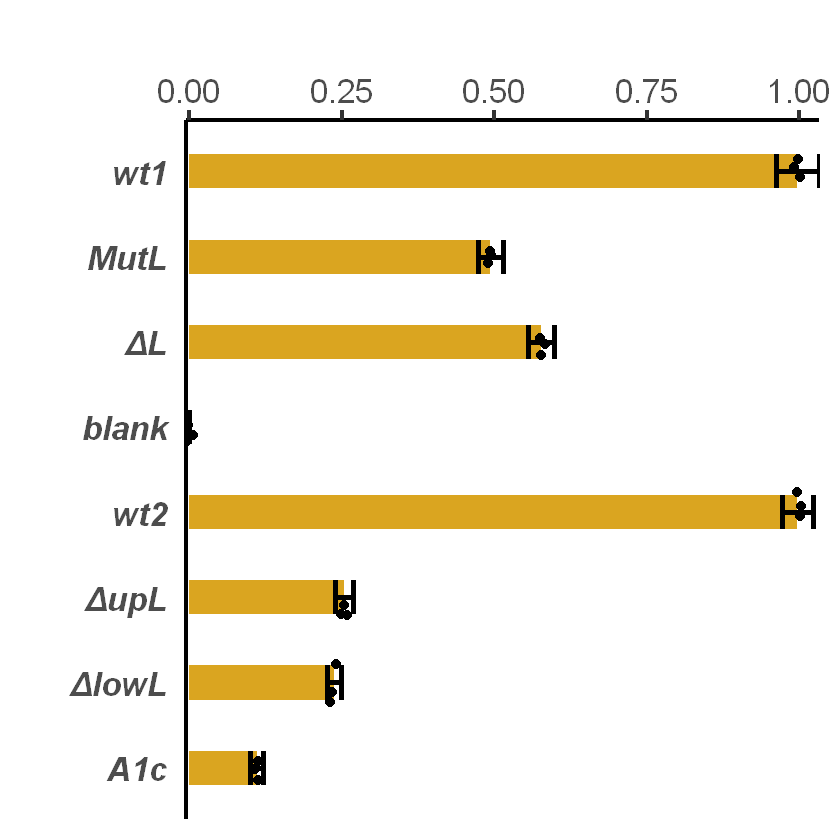

In [160]:
#pdf(file='LH_plot.pdf')
ggplot(df, aes(x=condition)) + 
 theme_classic(base_size = 25) +
 geom_bar(mapping = aes(y = mean) ,color=NA, fill="GoldEnrod",width = 0.4, stat = 'summary') + 
 geom_errorbar(aes(ymin=mean-sd, ymax=mean+sd),width=0.4, size = 1.5) +
 geom_point(aes(x=factor(condition), y = mean),size=2.5, position = position_jitter(width = 0.26)) + 
 theme(axis.text.y = element_text(hjust = 1,family = 'sans', face = 'bold.italic')) + 
 coord_flip() + 
 scale_y_continuous(position = 'right', expand = c(0,0.0)) + 
 labs(x= '', y = '') + 
 theme(axis.ticks.y = element_blank())

## 向独立分面添加注解

使用分面变量创建一个新的数据框，并设定每个分面要绘制的值。然后配合新数据框使用`geom_text()`:

In [52]:
head(mpg, 2)

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact


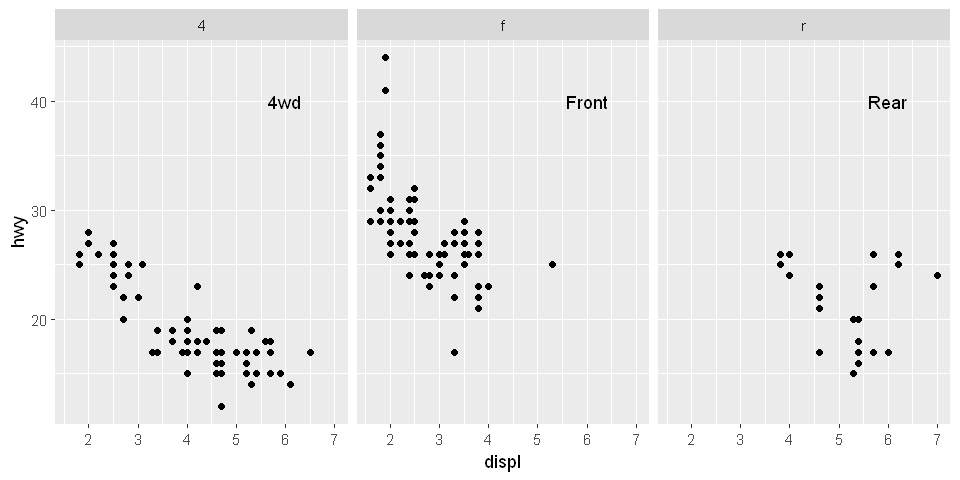

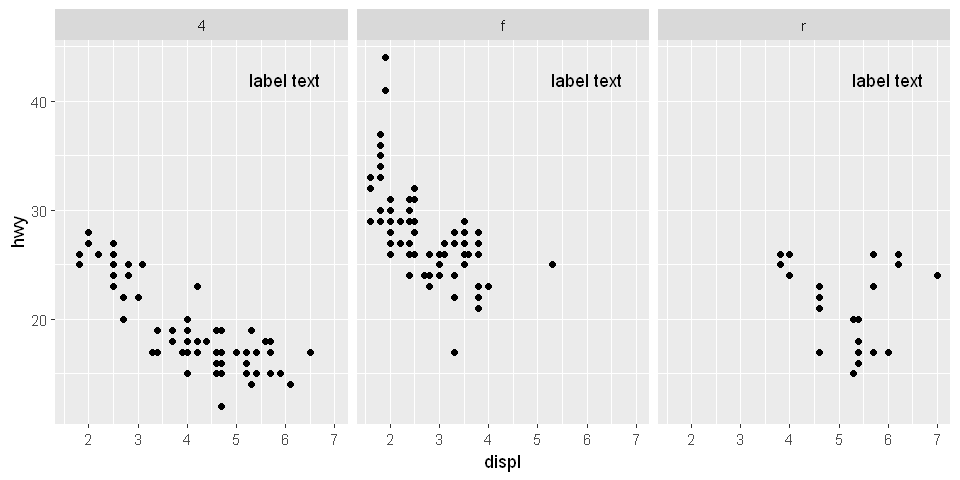

In [57]:
options(repr.plot.width=8, repr.plot.height=4)
# 基本图形
p <- ggplot(mpg, aes(x=displ, y=hwy)) + geom_point() + facet_grid(. ~ drv) 

# 存有每个分面所需要标签的数据框
f_labels <- data.frame(drv = c('4', 'f', 'r'), label = c('4wd', 'Front', 'Rear'))

p + geom_text(x=6, y=40, aes(label=label), data = f_labels)

# 如果你使用annotate(), 标签将在所有分面上出现
p + annotate('text',x=6, y=42, label='label text')

# 第八章 坐标轴

## 交换x轴和y轴

使用coord_flip()来翻转坐标轴：

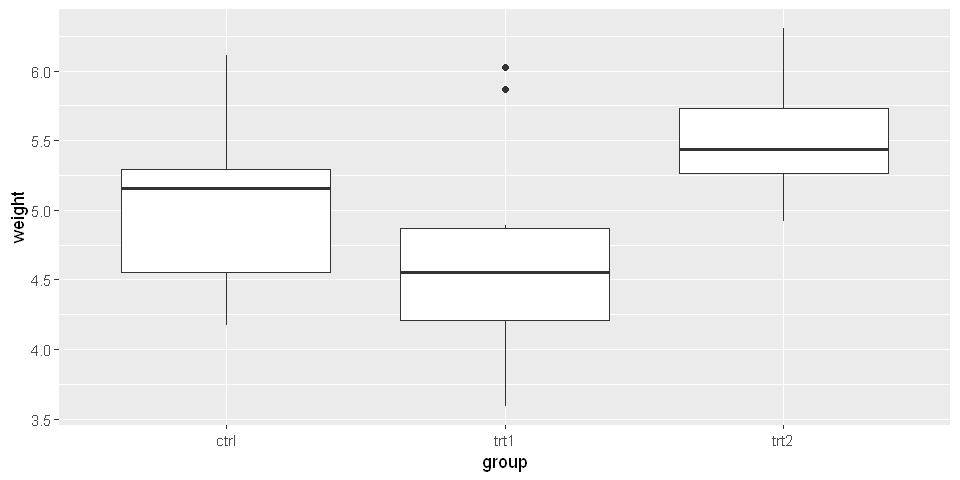

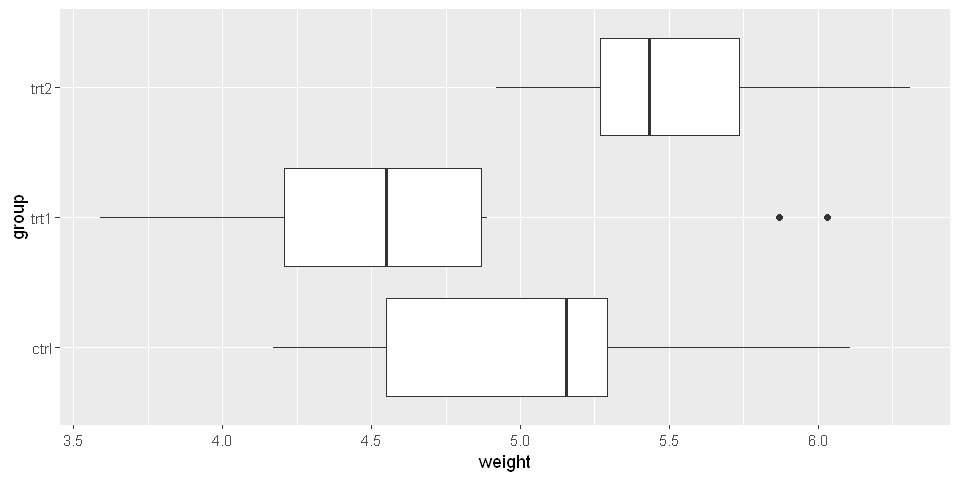

In [58]:
ggplot(PlantGrowth, aes(x=group, y=weight)) + geom_boxplot()

ggplot(PlantGrowth, aes(x=group, y=weight)) + geom_boxplot() + coord_flip()

对于散点图来说，调换纵轴和横轴上显示的元素非常简单：仅仅交换映射到 x 和 y 的变量就可以了。但并不是所有 ggplot2 中的几何对象都会同等对待 x轴 和 y轴。  
举例来说，箱线图依 y 轴对数据计算统计摘要，折线图中的线段只沿 x 轴移动，误差线只有一个单独的 x 值但具有若干 y 值，等等。如果你正在使用这些几何对象，并且希望在图形中交换它们的坐标轴，那么 `coord_flip()` 正是你所需要的。  

有时在交换坐标轴后，各项的顺序可能正好与你想要的相反。如果 x 变量是一各 factor 变量，则排列顺序可以通过使用`scale_x_distance()`和参数 `limit=rev(levels(...))`进行反转，

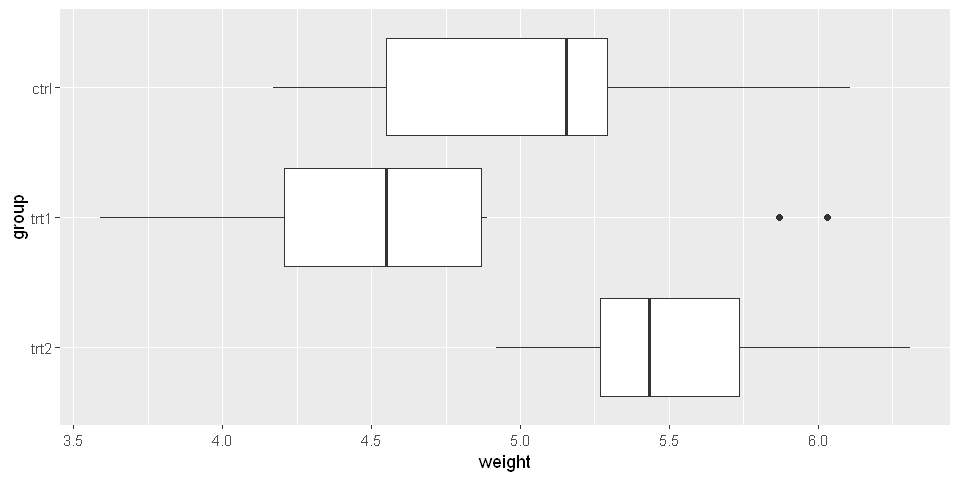

In [60]:
ggplot(PlantGrowth, aes(x=group, y=weight)) + geom_boxplot() + coord_flip() + 
 scale_x_discrete(limits=rev(levels(PlantGrowth$group)))

## 设置连续型坐标轴的值域

可以使用`xlim()`或`ylim()`来设置一条连续型坐标轴的最小值和最大值。

In [61]:
head(PlantGrowth, 2)

,weight,group
,<dbl>,<fct>
1,4.17,ctrl
2,5.58,ctrl


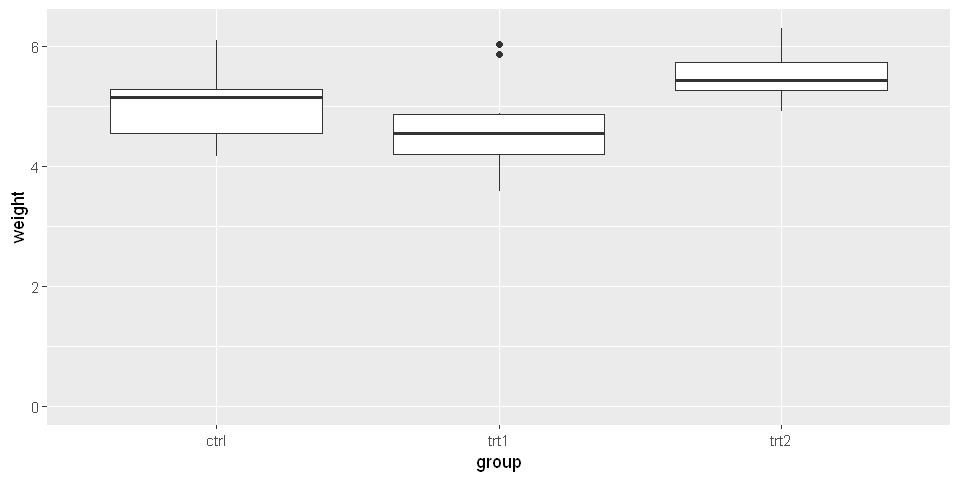

In [62]:
p <- ggplot(PlantGrowth, aes(x=group, y=weight)) + geom_boxplot()

p + ylim(0, max(PlantGrowth$weight))

💬**讨论**  
使用`ylim()`来设定范围是通过`scale_y_continuous()`来设定范围的简便写法。一下两种表达方式等价：

In [64]:
ylim(0, 10)
scale_y_continuous(limits = c(0, 10))

<ScaleContinuousPosition>
 Range:  
 Limits:    0 --   10

<ScaleContinuousPosition>
 Range:  
 Limits:    0 --   10

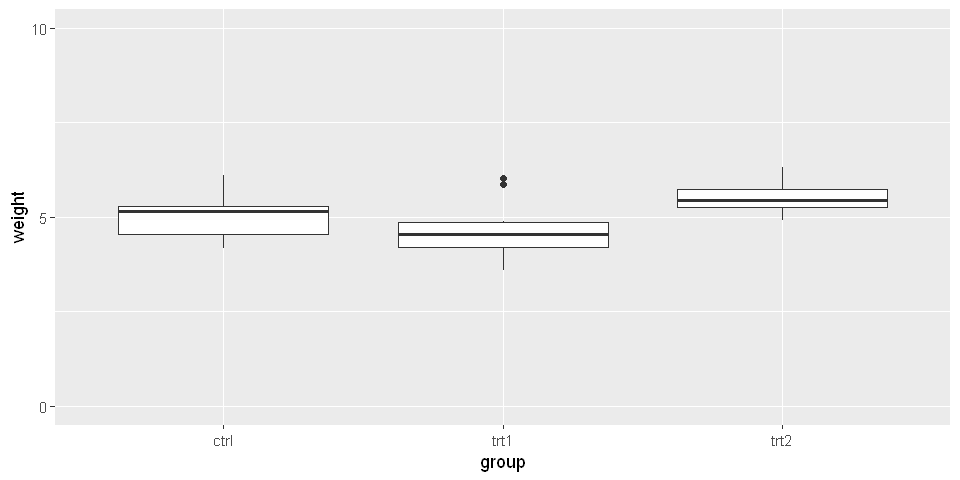

In [65]:
p + scale_y_continuous(limits = c(0, 10), breaks = c(0, 5, 10))

ggplot2中有两种设置坐标轴值域的方式。第一种是修改标度，第二种是应用一个坐标变换。  
当你修改x标度和y标度的范围时，任何在范围以外的数据都会被移除——换言之，超出范围的数据不仅不会被展示，而且会被完全移出考虑处理的数据范围。  

以上箱线图为例，如果你限制了 y 的值域，使得某些原始数据被剪掉，则箱线图中统计量的计算都会基于修剪后的数据，而箱线的形状也会随之改变

Warning message:
"Removed 13 rows containing non-finite values (stat_boxplot)."


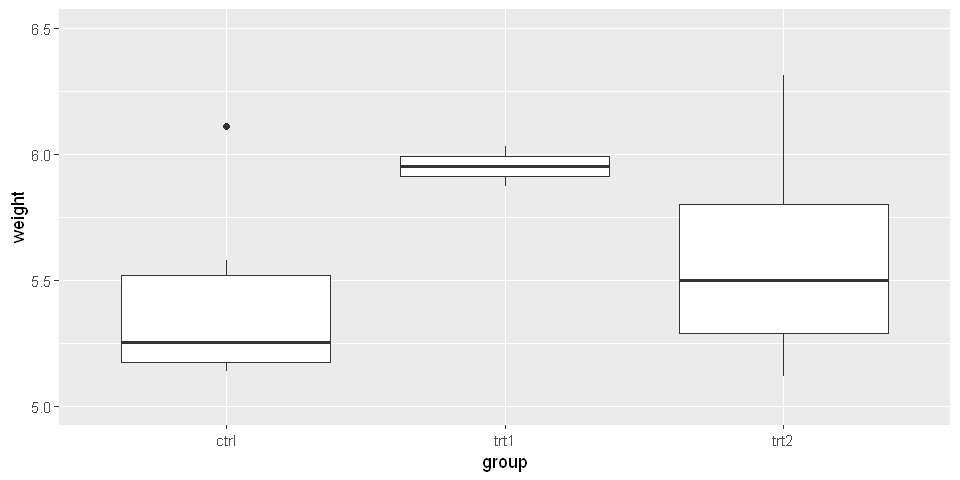

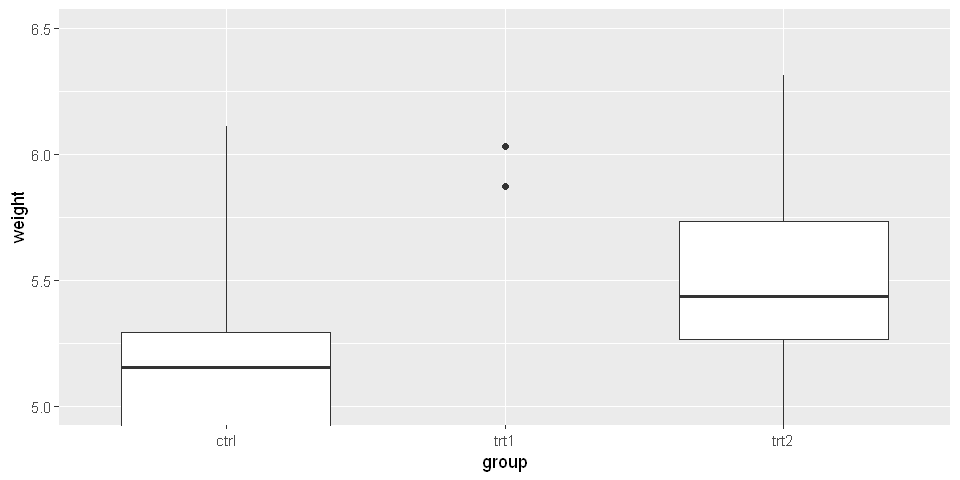

In [67]:
p + scale_y_continuous(limits = c(5.0, 6.5))
p + coord_cartesian(ylim = c(5.0, 6.5))

通过使用坐标变换，数据则不会被修剪，从本质上说，它只是将数据放大或缩小到指定的范围。

最后，使用`expand_limits()`来单向扩展值域也是可以的。不过，不能用它来缩减值域：

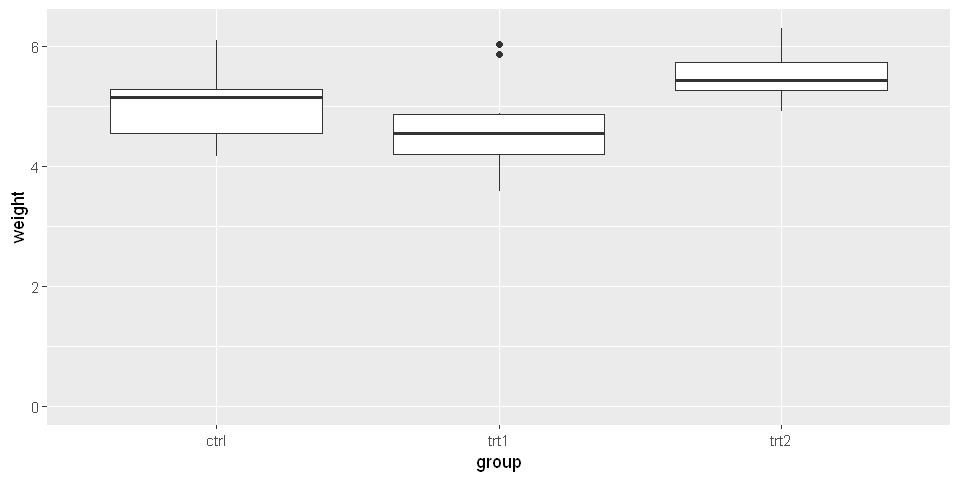

In [68]:
p + expand_limits(y=0)

## 反转一条连续型坐标轴

使用 `scale_y_reverse` 或 `scale_x_reverse`。坐标轴的方向也可通过指定反序的范围来反转，先写最大值，再写最小值：

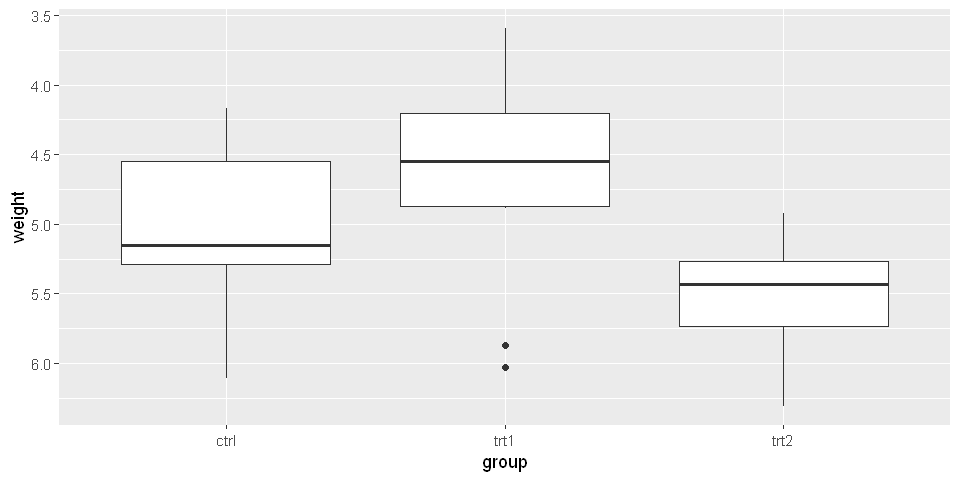

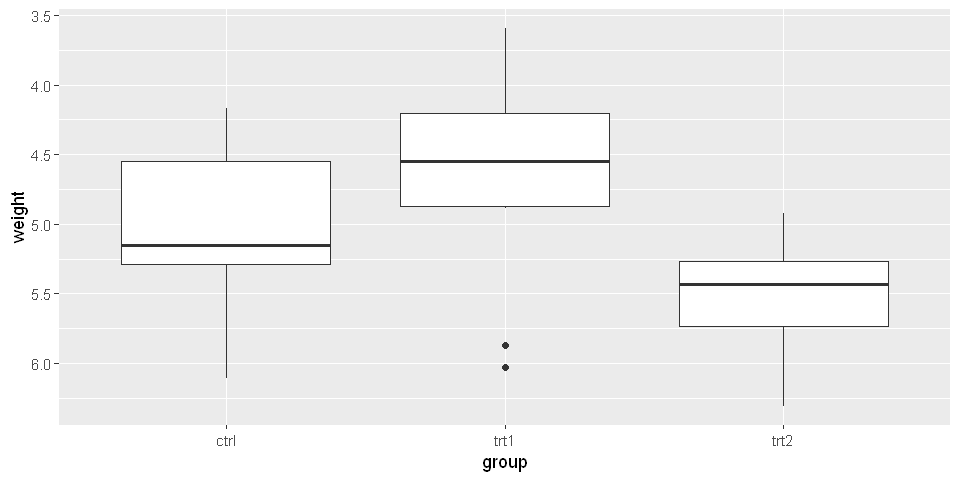

In [70]:
ggplot(PlantGrowth, aes(x=group, y=weight)) + geom_boxplot() + scale_y_reverse()

# 通过指定反序的范围产生类似的效果
ggplot(PlantGrowth, aes(x=group, y=weight)) + geom_boxplot() + scale_y_reverse()

💬**讨论**  
与`scale_y_continuous()`类似，`scale_y_reverse()`也无法与ylim配合工作（对x轴属性也一样）。如果你希望反转某条坐标轴并为它设定值域，则必须使用`scale_y_continuous()`：

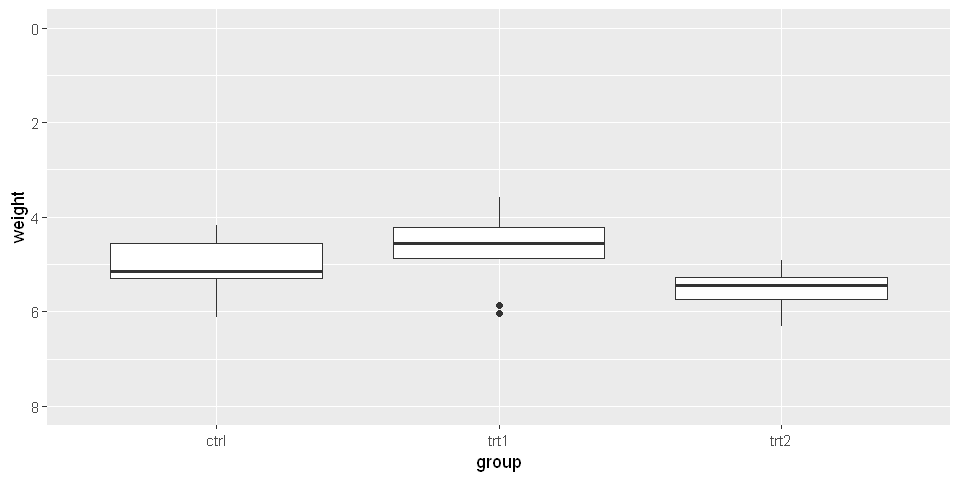

In [71]:
ggplot(PlantGrowth, aes(x=group, y=weight)) + geom_boxplot() + 
 scale_y_reverse(limits=c(8,0))

## 修改类别型坐标轴上项目的顺序

对于类别型（或者说离散型）坐标轴来说，会有一个因子型变量映射到它上面，坐标轴上项目的顺序可以通过设定`scale_x_discrete()`或`scale_y_discrete()`中的参数limits来修改。

要手动设定坐标轴上项目的顺序，将一个依理想顺序排列的水平向量指定给limits即可。也可以通过这种方式忽略掉某些项目。

In [72]:
unique(PlantGrowth$group)

[1] ctrl trt1 trt2
Levels: ctrl trt1 trt2

Warning message:
"Removed 10 rows containing missing values (stat_boxplot)."


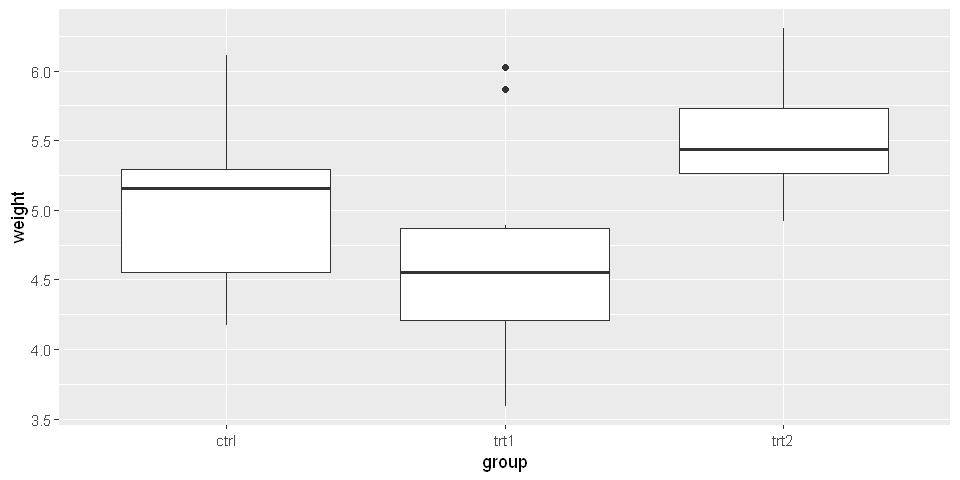

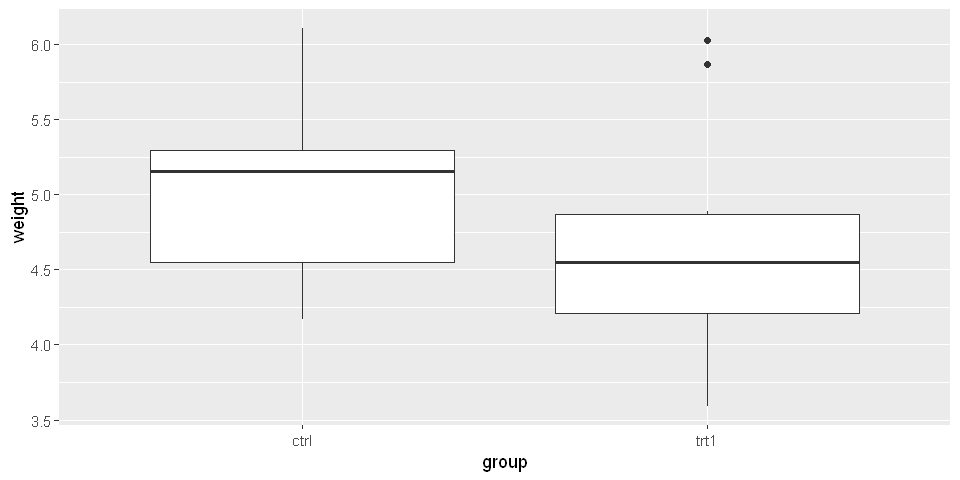

In [74]:
p <- ggplot(PlantGrowth, aes(x=group, y=weight)) + geom_boxplot()

p + scale_x_discrete(limits=c('ctrl', 'trt1', 'trt2'))

p + scale_x_discrete(limits=c('ctrl', 'trt1'))

要反转项目顺序，设定 `limits=rev(levels(...))`，将因子型变量放入括号中即可。

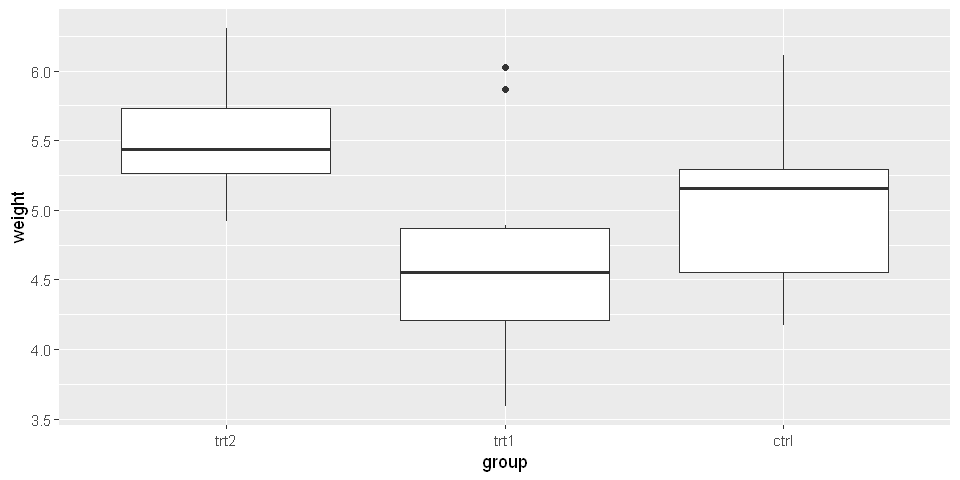

In [75]:
p + scale_x_discrete(limits=rev(levels(PlantGrowth$group)))

## 设置x轴和y轴的缩放比例

使用 `coord_fixed()`。 以下代码将得到 x 轴和 y 轴之间 1：1 的缩放结果。这里的1：1指的是坐标轴单位长度表示的数值范围，而不是总长宽比例。

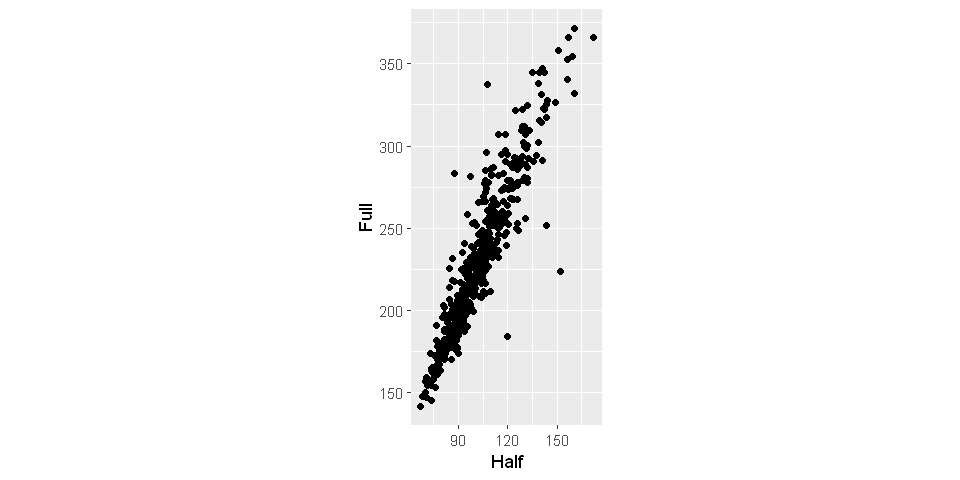

In [76]:
sp <- ggplot(marathon, aes(x=Half, y=Full)) + geom_point()

sp + coord_fixed()

通过在`scale_y_continuous()`和`scale_x_continuous`中调整参数breaks，从而将刻度间距设为相同，也会有所帮助

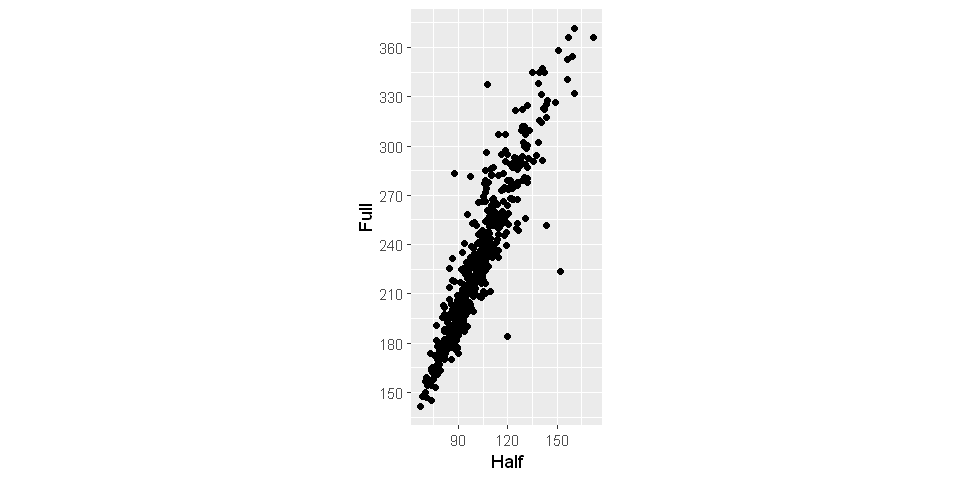

In [79]:
sp + coord_fixed() + 
 scale_y_continuous(breaks = seq(0, 420, 30)) + 
 scale_x_continuous(breaks = seq(0, 420, 30))

如果你希望为两个坐标轴之间指定其他的固定比例而非相同的比例，可以设置参数ratio。对于marathon数据集，我们可能想让对应半程马拉松时间的坐标轴被拉伸到全程马拉松时间坐标轴的两倍。

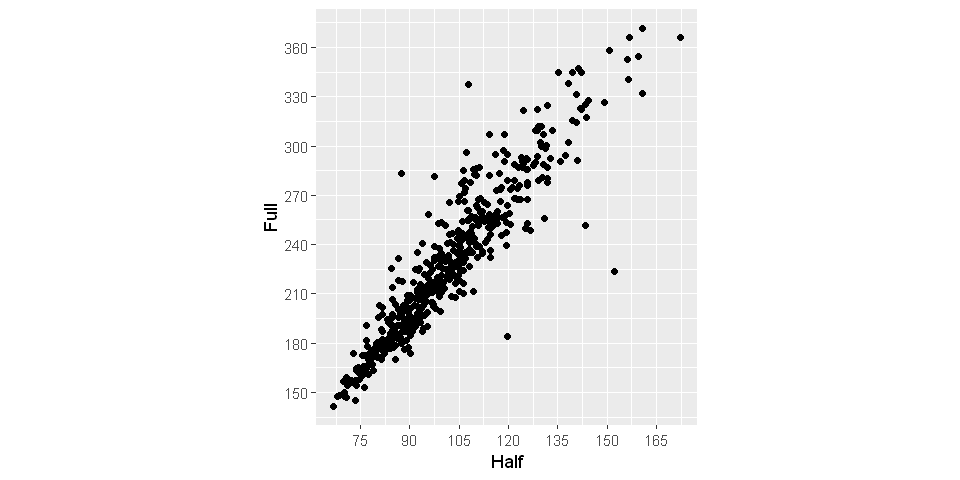

In [85]:
sp + coord_fixed(ratio = 1/2) + 
 scale_y_continuous(breaks = seq(0, 420, 30)) + 
 scale_x_continuous(breaks = seq(0, 420, 15))

## 设置刻度线的位置

通常来说ggplot()会自动将刻度线摆放在合适的位置，但如果你希望改变它们的位置，设置标度中的参数breaks即可。

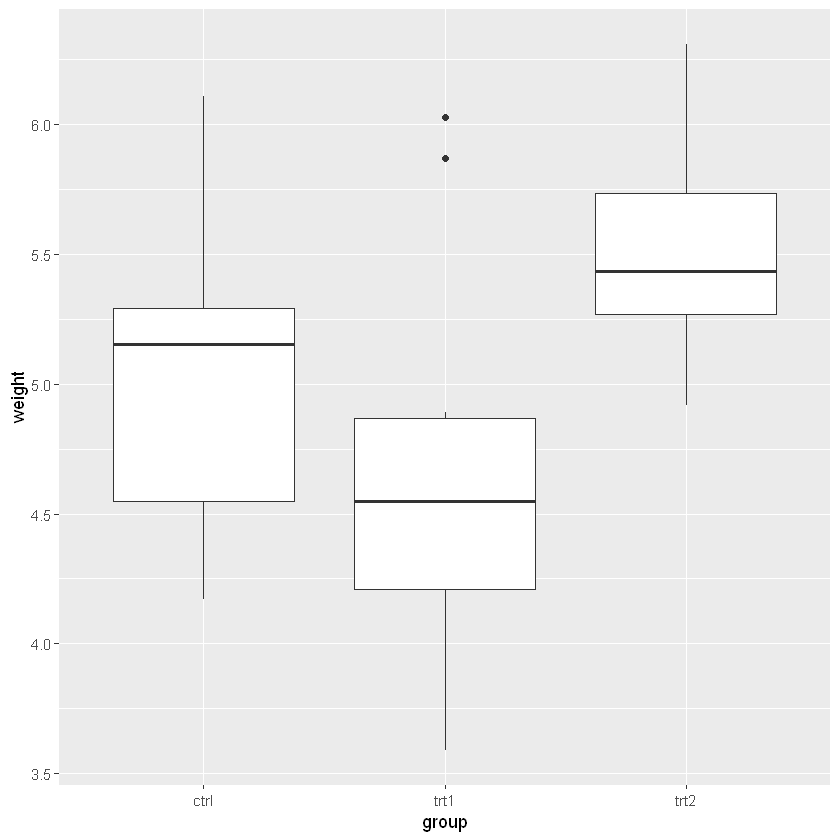

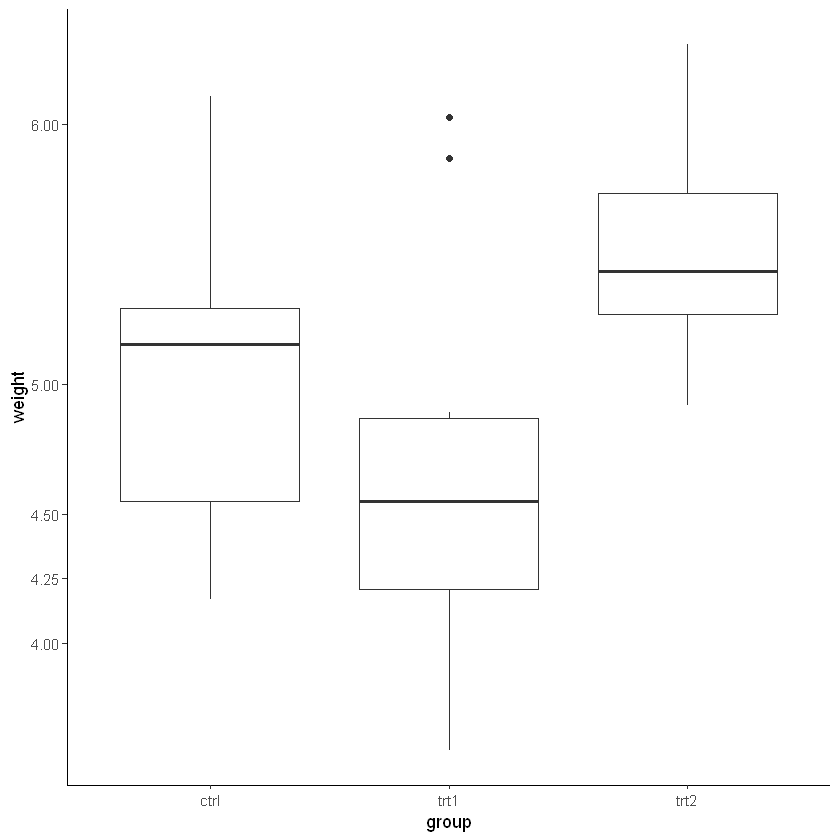

In [3]:
ggplot(PlantGrowth, aes(x=group, y=weight)) + geom_boxplot()

ggplot(PlantGrowth, aes(x=group, y=weight)) + geom_boxplot() + 
 scale_y_continuous(breaks = c(4, 4.25, 4.5, 5, 6, 8)) + 
 theme_classic()

💬**讨论**  
可以使用`seq()`函数或运算符：来生成刻度线的位置向量：

In [4]:
seq(4, 7, by=.5)

5:10

[1] 4.0 4.5 5.0 5.5 6.0 6.5 7.0

[1]  5  6  7  8  9 10

设定`breaks`将会决定为哪些水平加上标签，但不会移除它们或是改变它们的顺序。可以通过指定`limits`来修改项目的顺序或移除项目.

Warning message:
"Removed 10 rows containing missing values (stat_boxplot)."


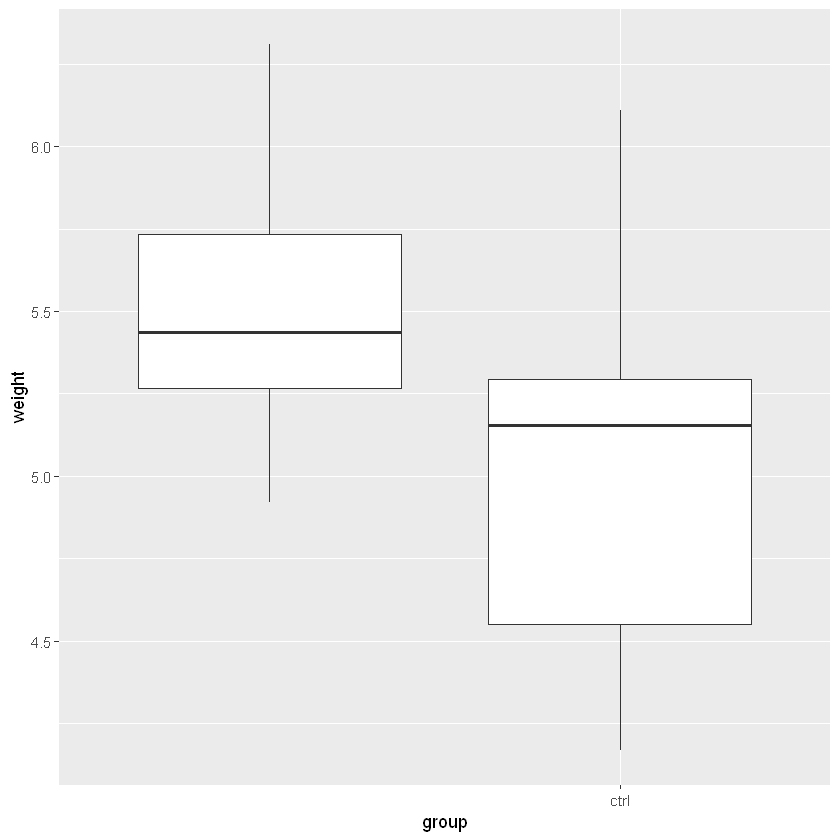

In [5]:
ggplot(PlantGrowth, aes(x=group, y=weight)) + geom_boxplot() + 
 scale_x_discrete(limits=c('trt2','ctrl'), breaks = 'ctrl')

## 移除刻度线和标签

仅移除刻度标签，使用 `theme(axis.text.y = element_blank())` (也可对axis.text.x做相同处理)即可。这种方法对于连续型和离散型坐标轴均有效：

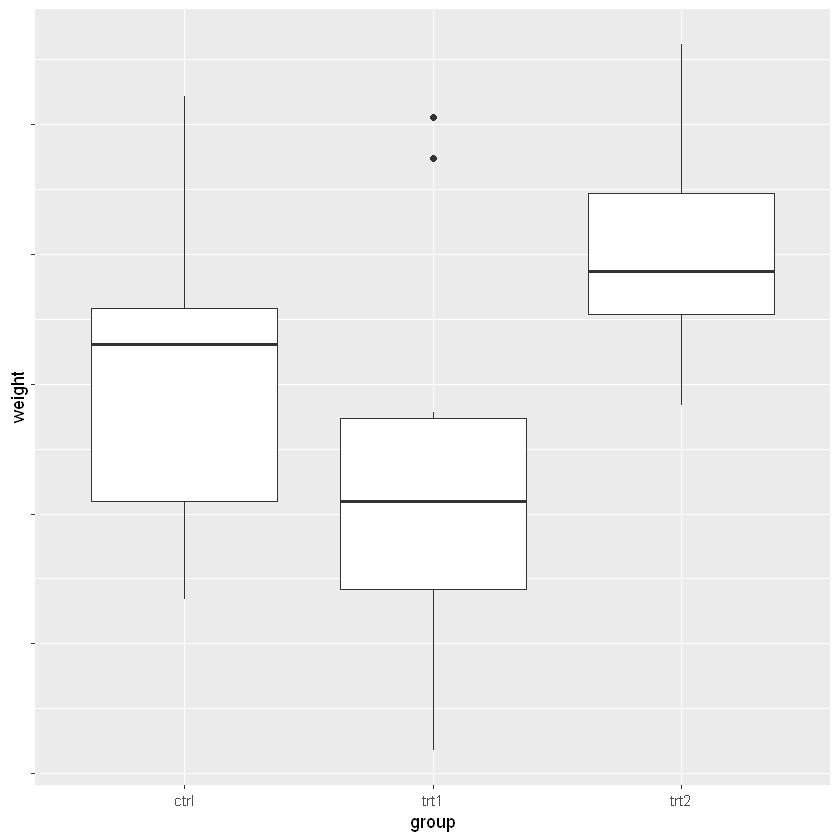

In [9]:
p <- ggplot(PlantGrowth, aes(x=group, y=weight)) + geom_boxplot()

p + theme(axis.text.y = element_blank())

要移除刻度线，可使用theme(axis.ticks=element_blank()).这样会同时移除两轴的刻度线（无法仅隐藏单个坐标轴的刻度线）。

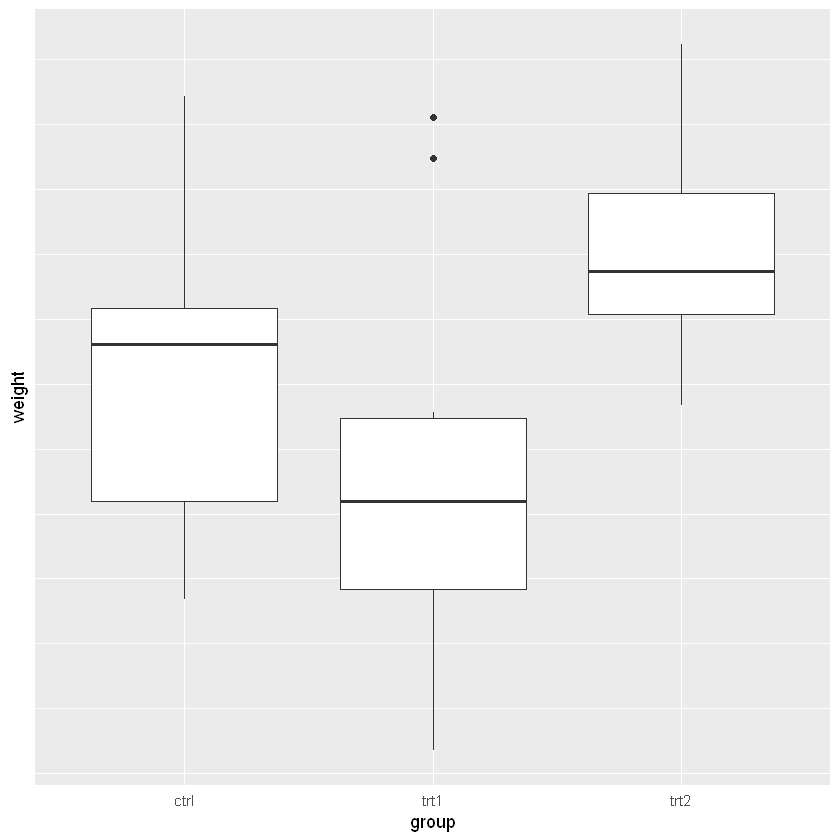

In [7]:
p + theme(axis.ticks = element_blank(), axis.text.y = element_blank())

要移除刻度线、刻度标签和网格线，将`breaks`设置为`NULL`即可：

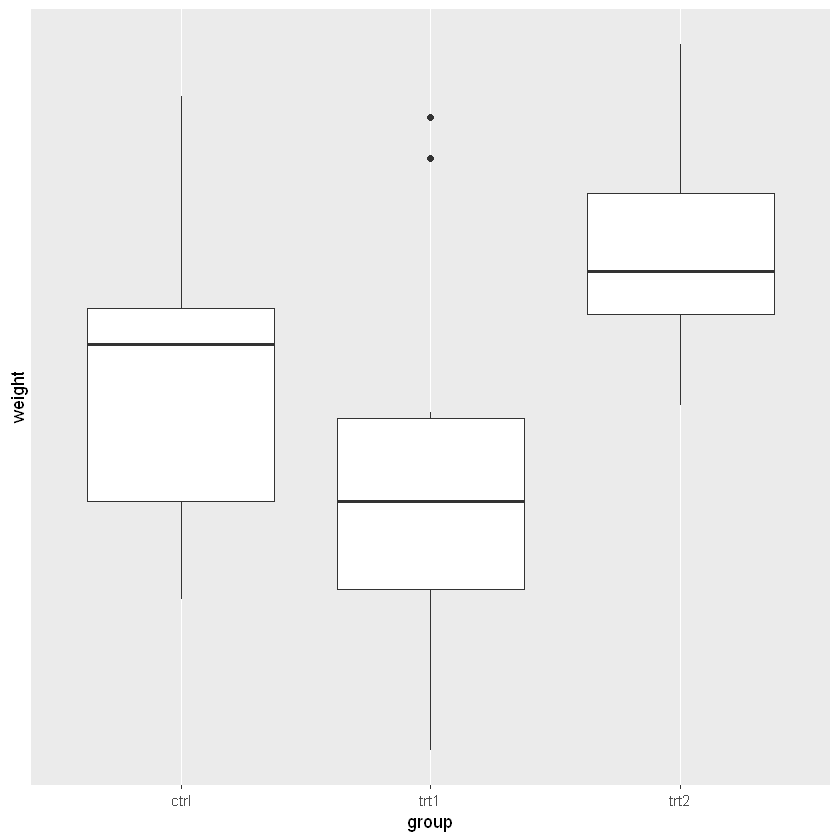

In [10]:
p + scale_y_continuous(breaks = NULL)

💬**讨论**  
事实上，共有三种项目可以控制：刻度标签、刻度线和网格线。对于连续型坐标轴，ggplot()通常会在每个breaks值的位置放置刻度线、刻度标签和主网格线。对于类别型坐标轴，这些元素则出现在每个limits值的位置。  
我们可以独立控制每条坐标轴上的刻度标签。但是，刻度线和网格线必须同时控制。

## 修改刻度标签的文本

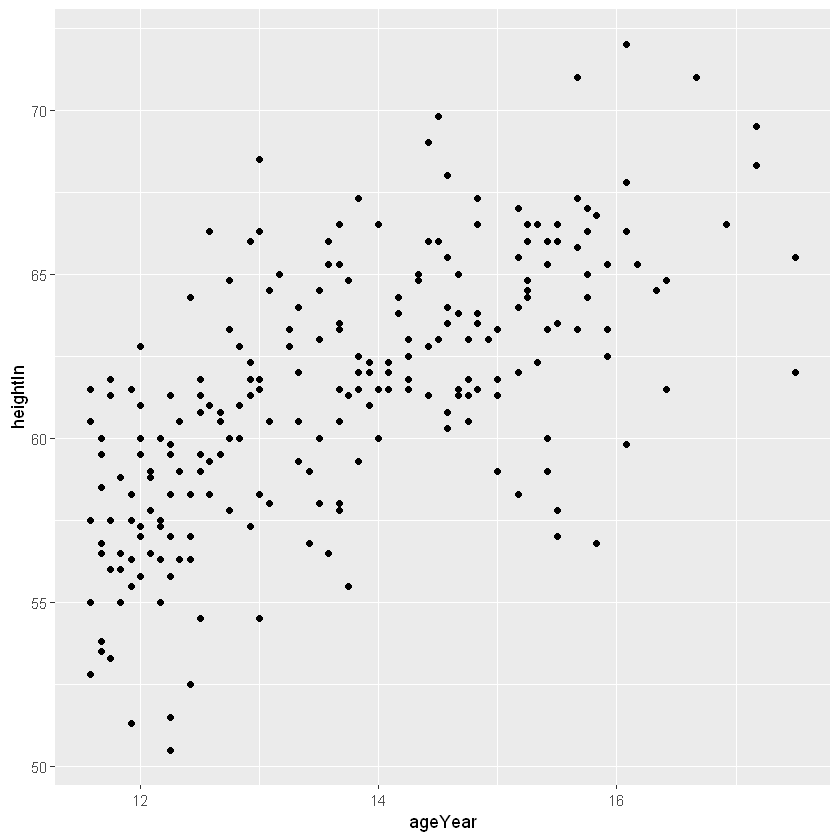

In [3]:
hwp <- ggplot(heightweight, aes(x=ageYear, y=heightIn)) + 
        geom_point()

hwp

要想任意设定标签，在标度中为breaks和labels赋值即可。其中一个标签含有一个换行符（\n），意为让ggplot()在那里另起一行：

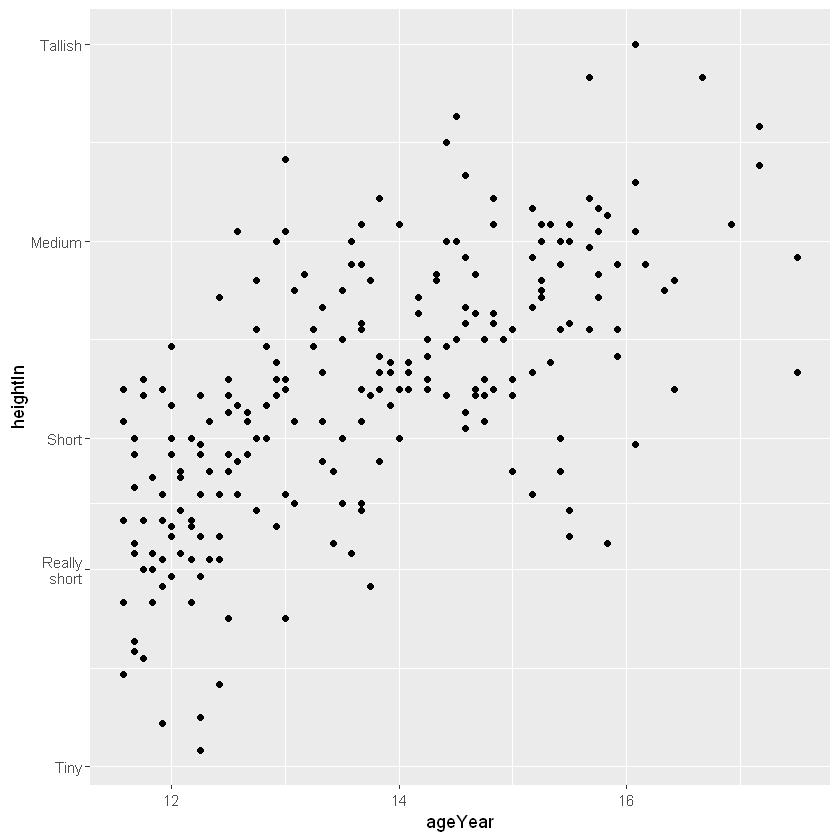

In [4]:
hwp + scale_y_continuous(breaks = c(50,56,60,66,72),
                        labels = c('Tiny', 'Really\nshort', 'Short',
                                  'Medium', 'Tallish'))

💬**讨论**  
除了完全任意地设置标签以外，更常见的情况是数据以某种格式存储，而我们希望以另外一种格式显示标签。  
我们可能向让身高变量显示为英尺和英寸的格式，而不是仅仅显示一个英寸数值。要完成这项任务，我们可以定义一个格式刷（formatter）函数，这样的函数可以读入数值并返回相应的字符串。例如，以下函数可将英寸数值转换为英尺加英寸的格式：

In [5]:
footinch_formatter <- function(x){
    foot <- floor(x/12)
    inch <- x %% 12
    return(paste(foot, "'", inch, "\"", sep=""))
}

下面是此函数对输入值56~64的返回结果：

In [6]:
footinch_formatter(56:64)

[1] "4'8\""  "4'9\""  "4'10\"" "4'11\"" "5'0\""  "5'1\""  "5'2\""  "5'3\"" 
[9] "5'4\""

现在就可以使用参数labels把我们的函数传递给标度了：

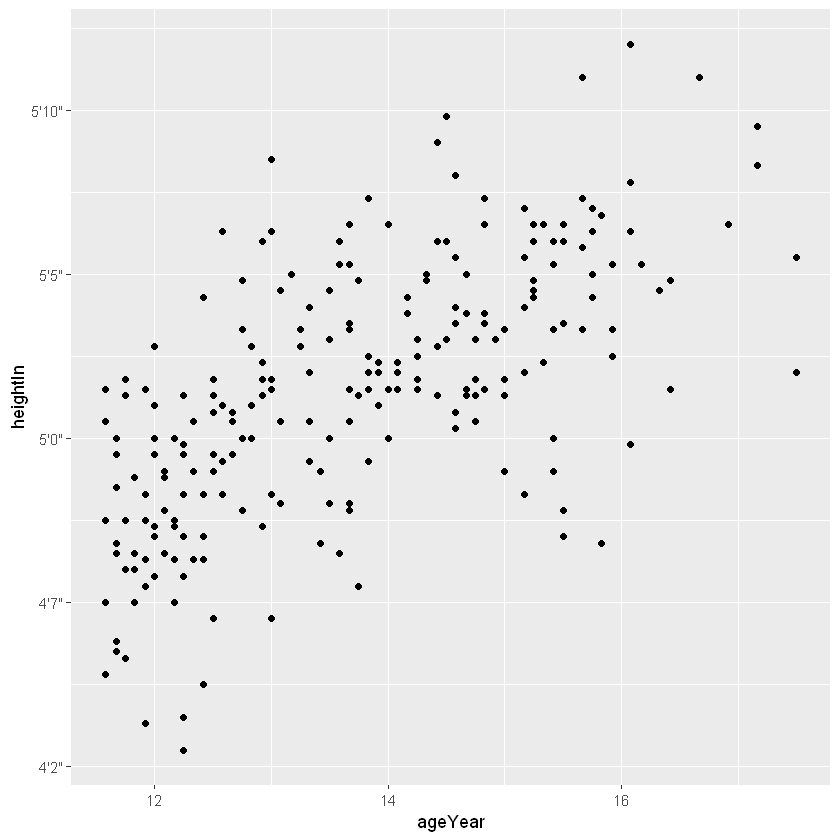

In [7]:
hwp + scale_y_continuous(labels = footinch_formatter)

在图中，每隔五英寸放置了一个自动生成的刻度线，但是对于这个数据来说看起来有点古怪。我们可以通过指定参数breaks让ggplot()每隔四英寸设置一条刻度线取而代之：

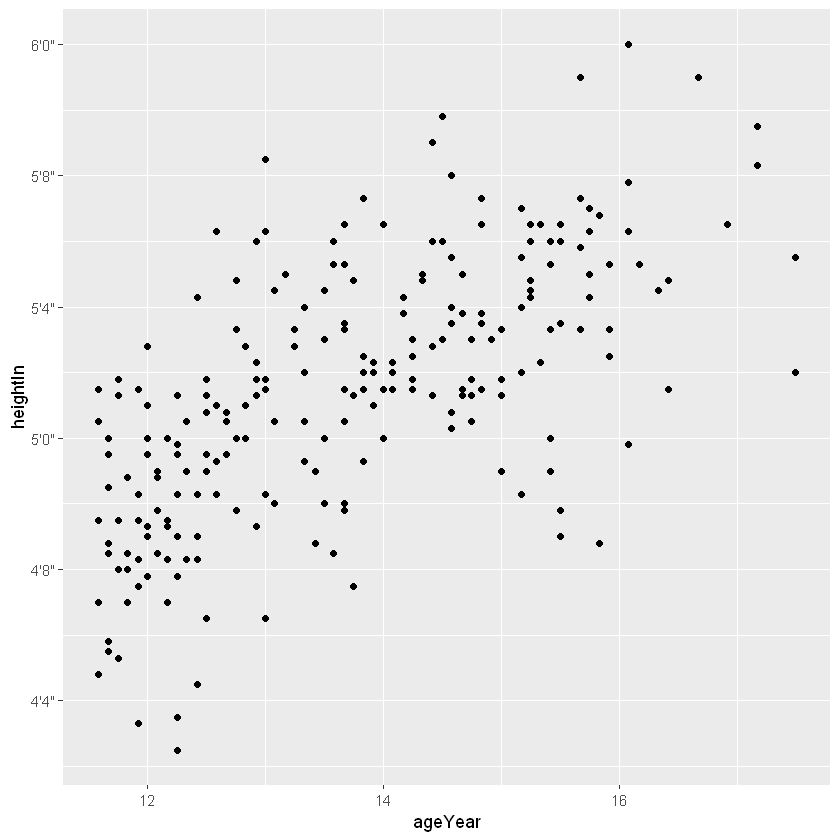

In [8]:
hwp + scale_y_continuous(breaks = seq(48,72,4), labels = footinch_formatter)

另一项常见任务是将时间测度转换为HH:MM:SS(时：分：秒)或者其他类似的格式。以下函数可以读入分钟的数值并将它们转换为这种格式，同时舍入到最接近的秒数（也可以按照自己的特殊需要来定义）：

In [11]:
timeHMS_formatter <- function(x){
    h <- floor(x/60)
    m <- floor(x %% 60)
    s <- round(60 * (x %% 1)) # 舍入到最接近的秒数
    lab <- sprintf("%02d:%02d:%02d", h, m, s) # 格式化字符串为HH:MM:SS 的格式
    lab <- gsub("^00:", "", lab) # 如果开头存在00：则移除
    lab <- gsub("^0", "", lab) # 如果开头存在0 则移除
    return(lab)
}

In [12]:
timeHMS_formatter(c(.33, 50, 51.25, 59.32, 60, 60.1, 130.32))

[1] "0:20"    "50:00"   "51:15"   "59:19"   "1:00:00" "1:00:06" "2:10:19"

随ggplot2安装的scales包自带了一些内建的格式化函数：  
- comma() 在千、百万、十亿等位置向数字添加逗号。
- dollar()添加一个美元符号并舍入到最接近的美分。
- percent()乘以100，舍入到最接近的整数值，并添加一个百分号。
- scientific()对大数字和小数字给出科学计数法表示，如 3.30e+05。  

如果你希望使用这些函数，必须首先使用library(scales)加载scales包

## 修改刻度标签的外观

💡 **方法**  
旋转标签文本

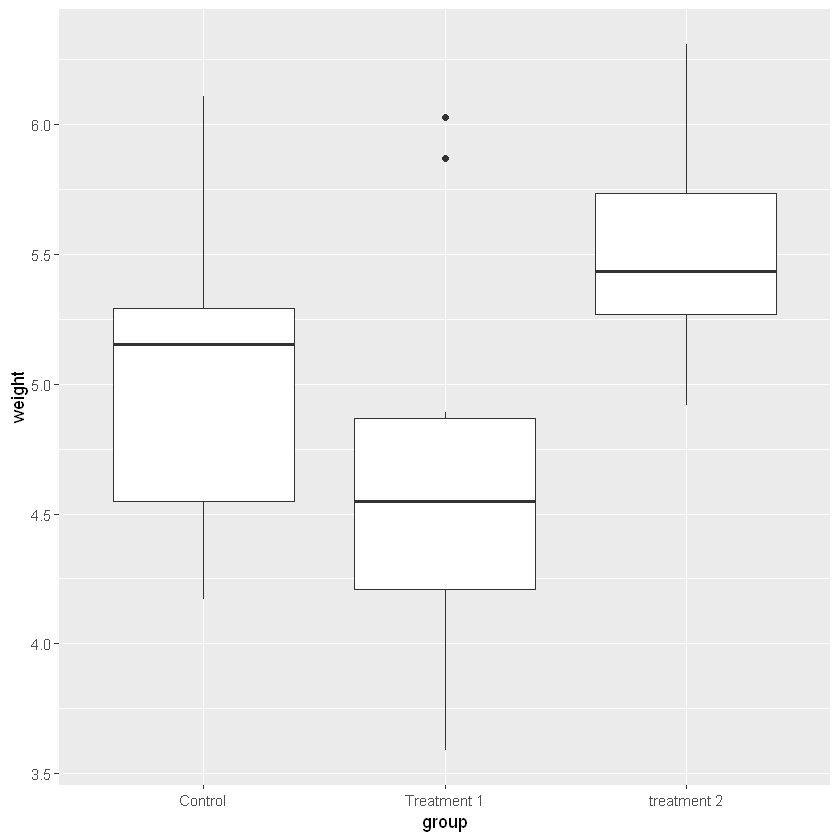

In [13]:
bp <- ggplot(PlantGrowth, aes(x=group, y=weight)) + geom_boxplot() + 
       scale_x_discrete(breaks=c('ctrl', 'trt1', 'trt2'),
                       labels=c('Control', 'Treatment 1', 'treatment 2'))

bp

要将文本逆时针旋转90°，只需使用：

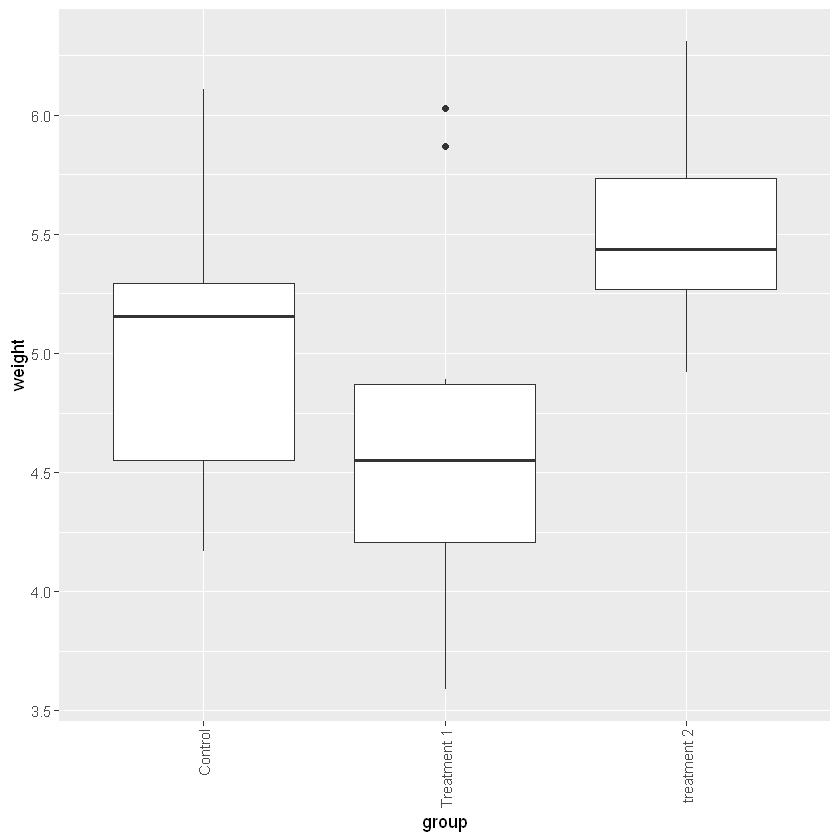

In [14]:
bp + theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = .5))

将文本旋转30°可以占用更小的纵向空间，并且易于阅读。

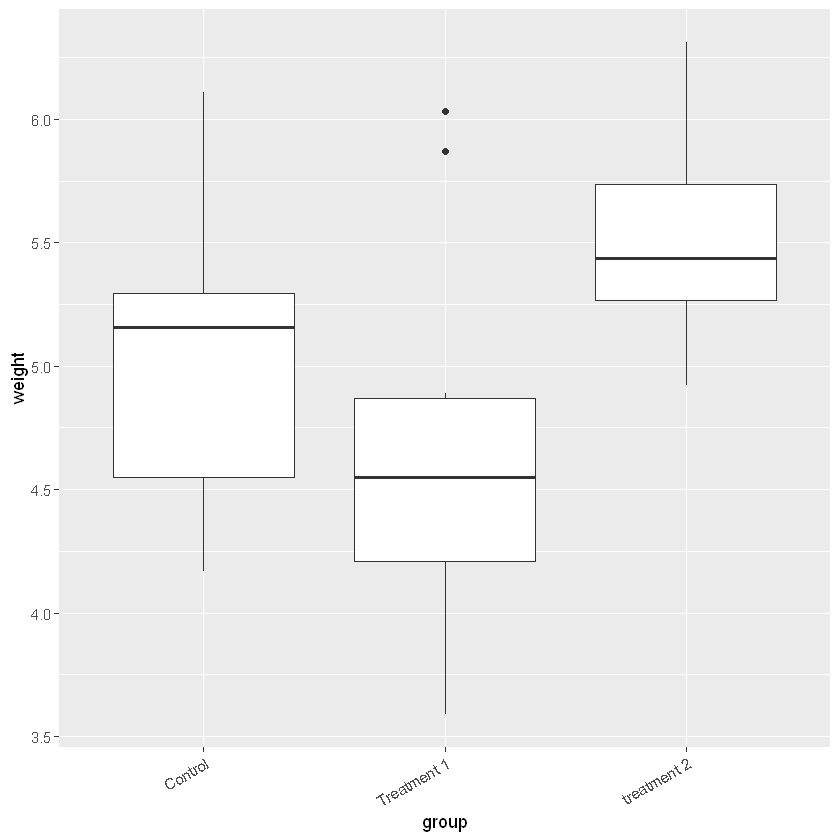

In [15]:
bp + theme(axis.text.x = element_text(angle = 30, hjust = 1, vjust = 1))

参数hjust和vjust设置了横向对齐（左对齐/居中/右对齐）和纵向对齐（顶部对齐/居中/底部对齐）。

💬**讨论**  
除了旋转以外，其他的文本属性，如大小、样式（粗体/斜体/常规）和字体族（如 Times 或 Helvetica）可以使用element_text()进行设置：

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"Windows字体数据库里没有这样的字体系列"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"Windows字体数据库里没有这样的字体系列"


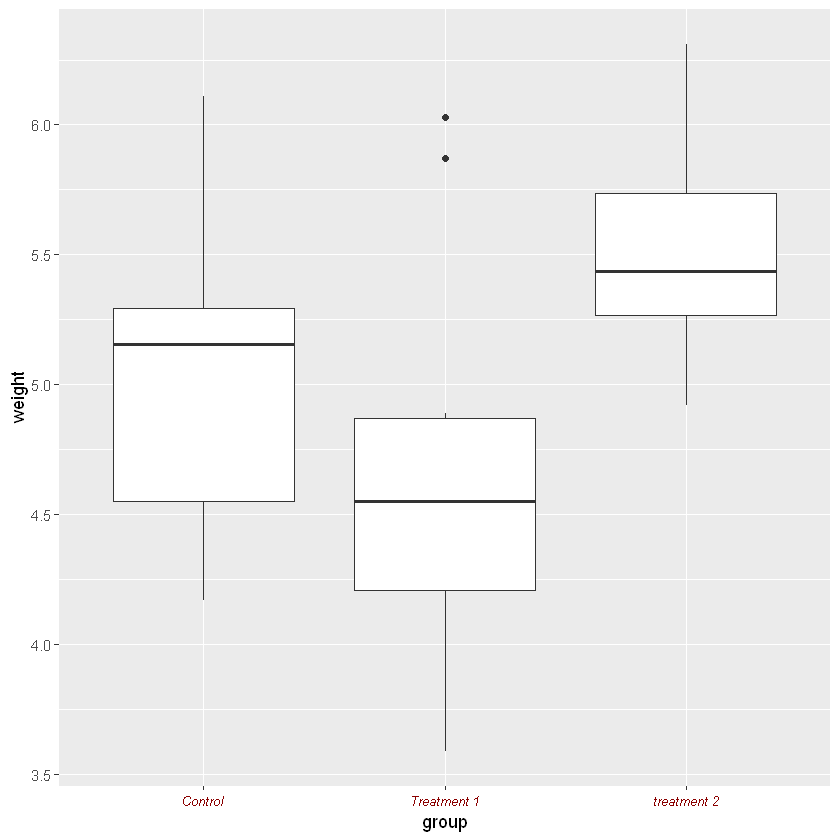

In [18]:
bp + theme(axis.text.x = element_text(family='Times', face='italic', color='darkred', size=rel(0.9)))

size 被设为 rel(0.9)，意为当前主题基础字体大小的0.9倍。  

这些命令仅仅控制了单个坐标轴上刻度标签的外观，并不影响其他坐标轴、坐标轴标签、整体的标题或图例。要同时控制所有这些元素的外观，可以使用主题系统。参见 [](#)

## 修改坐标轴标签的文本

使用`xlab()`或`ylab()`来修改坐标轴标签的文本：

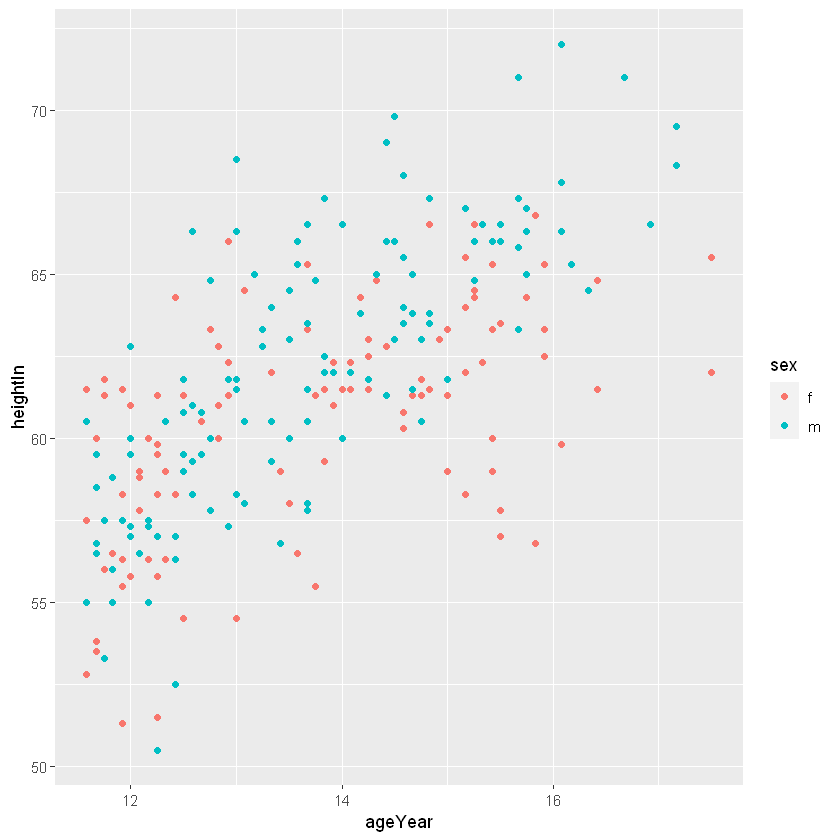

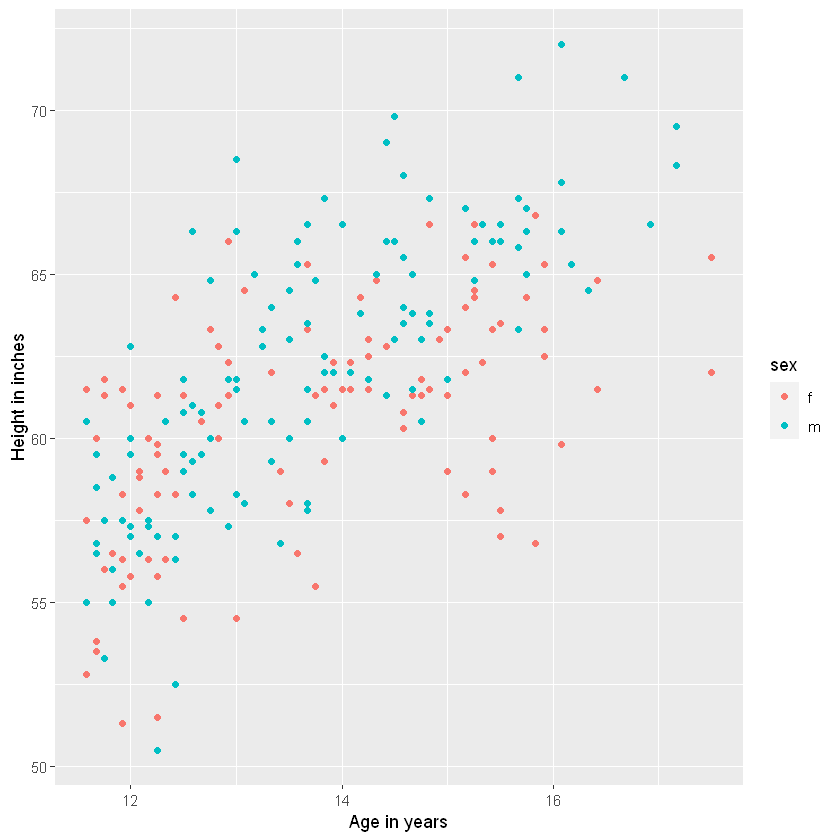

In [20]:
hwp <- ggplot(heightweight, aes(x=ageYear, y=heightIn, color=sex)) + 
        geom_point()

# 使用默认的坐标轴标签
hwp

# 设置坐标轴标签
hwp + xlab('Age in years') + ylab('Height in inches')

💬**讨论**  
默认情况下，图形将直接使用数据框中的列名作为数据轴标签。这对于探索数据来说可能还好，但在对外呈现数据时，你也许会希望更具描述力的坐标轴标签。  

除了`xlab()`和`ylab()`，也可以使用`labs()`：

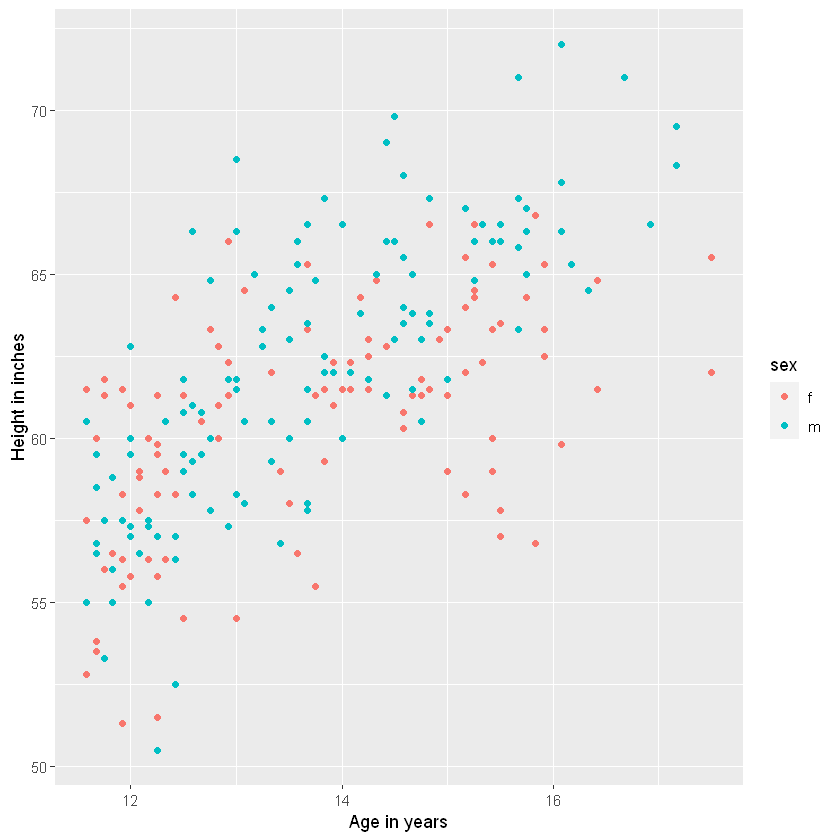

In [21]:
hwp + labs(x='Age in years', y='Height in inches')

设置坐标轴标签的另一种方法是在标度中指定，就像这样：

In [ ]:
hwp + scale_x_continuous(name='Age in years')

这种方法看起来可能有点别扭，不过可能在你同时设定标度的其他属性（如刻度线位置、值域等）时会比较有用。

当然，这种方法同样适用于其他的坐标轴标度，如scale_y_continuous()、scale_x_discrete()等。

还可以适用\n来添加换行

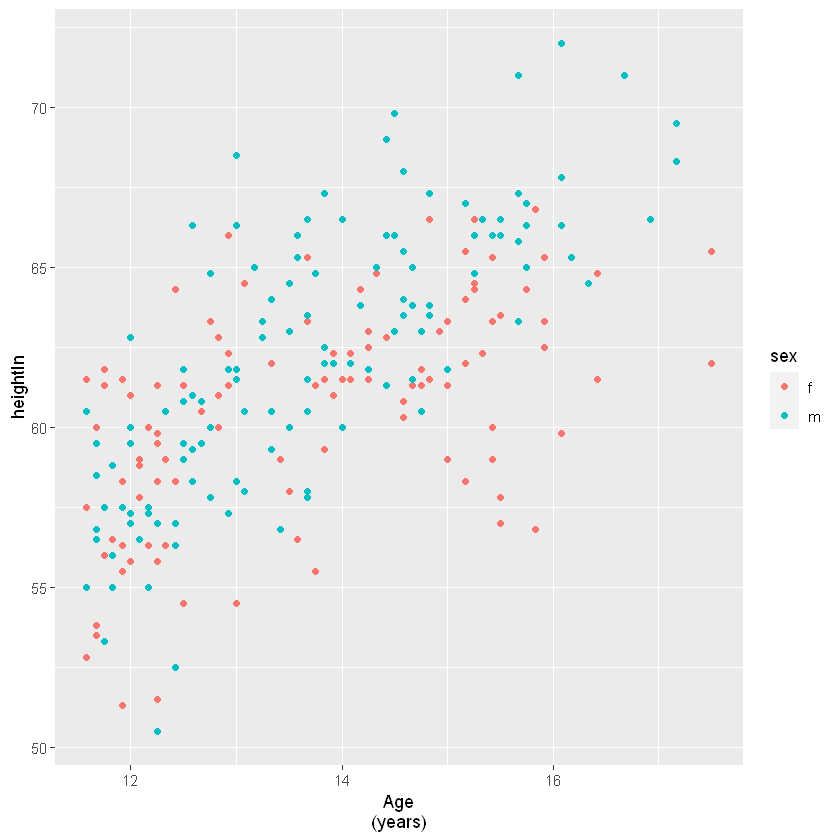

In [22]:
hwp + scale_x_continuous(name = 'Age\n(years)')

## 移除坐标轴标签

💡 **方法**  
使用theme(axis.title.x = element_black())。对于y轴标签，针对axis.title.y做同样处理。

移除坐标轴标签的另一种方法是将其设为一个空字符串。但如果以这种方式去做，那么图中将仍为文本留出空间。

## 移除坐标轴标签的外观

💡 **方法**  
使用`axis.title.x()`即可

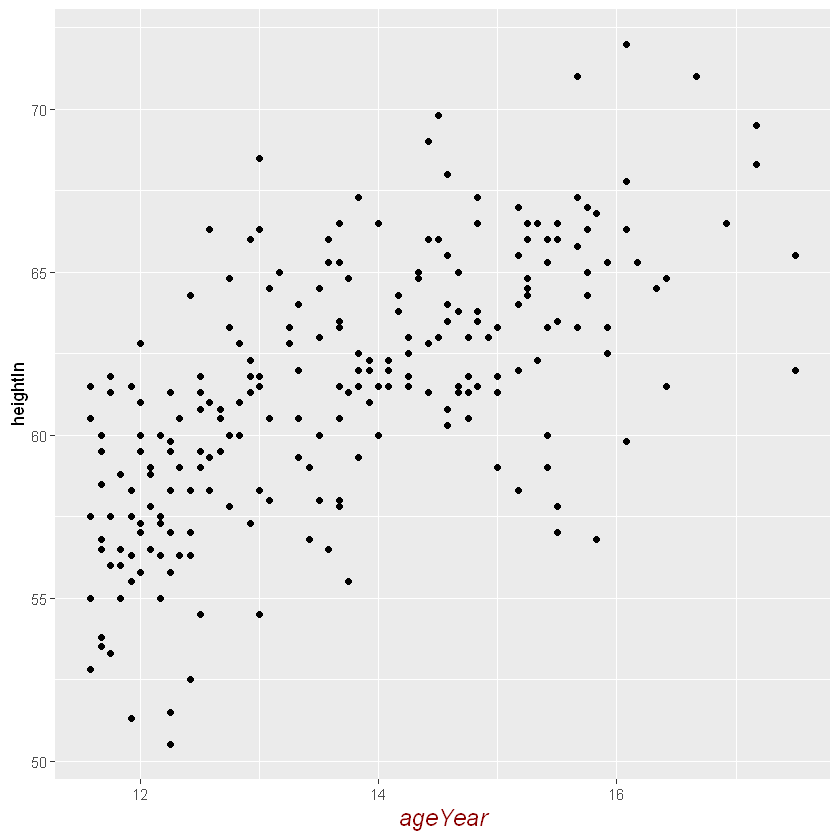

In [23]:
hwp <- ggplot(heightweight, aes(x=ageYear, y=heightIn)) + geom_point()

hwp + theme(axis.title.x = element_text(face='italic', color='darkred', size=14))

💬**讨论**  
对于y轴标签来说，有时不对文本进行旋转会比较有用。  
当调用`element_text()`时默认角度为0，所以如果设置了axis.title.y 但没有指定这个角度，它将以文本的顶部指向上方的朝向显示。如果修改了axis.title.y中的其他任何属性并且希望它以正常朝向，即旋转90°显示，则必须手动指定这个角度：

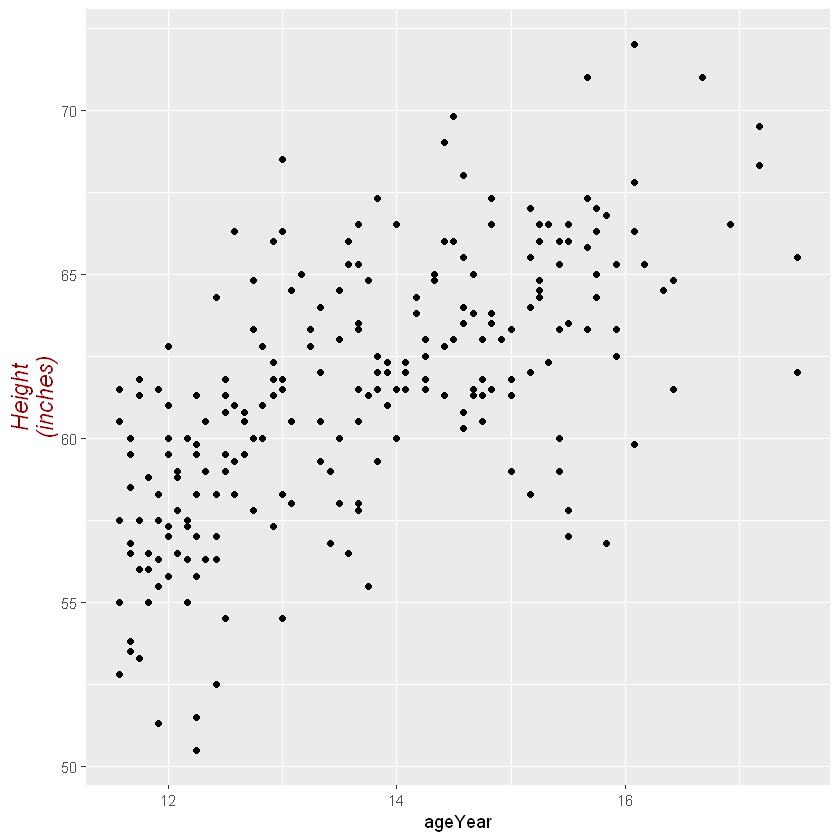

In [24]:
hwp + ylab('Height\n(inches)') + 
 theme(axis.title.y = element_text(angle = 90, face = 'italic', color = 'darkred', 'size'=14))

## 沿坐标轴显示直线

❓如何沿x轴和y轴显示直线，但不在图形的另外两侧显示？  
💡使用主题设置中的 `axis.line` 

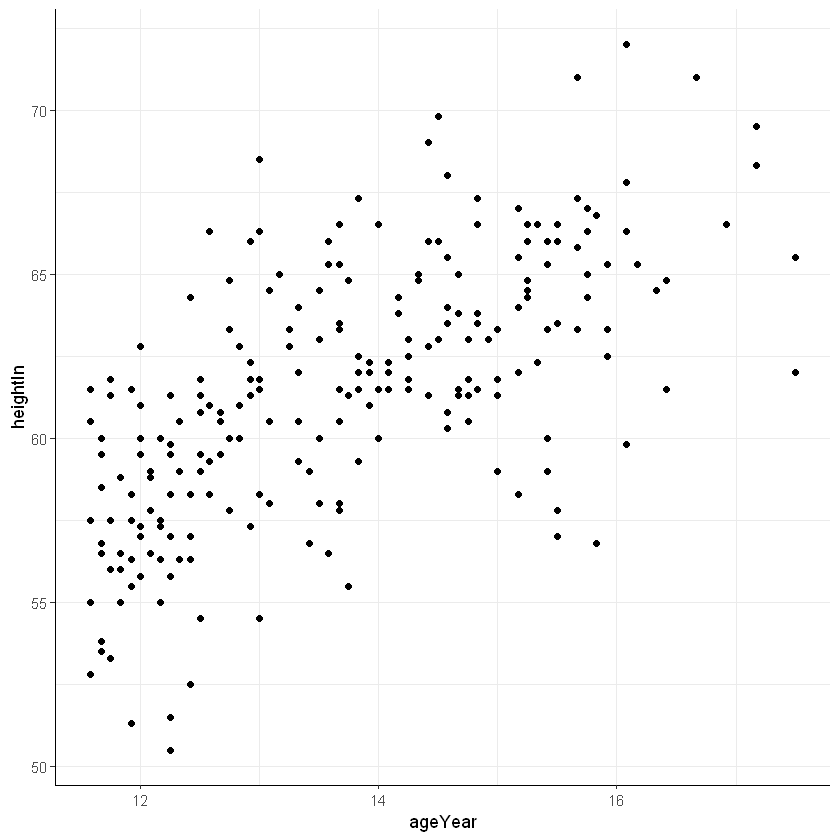

In [5]:
p <- ggplot(heightweight, aes(x=ageYear, y=heightIn)) + geom_point()

p + theme_bw() +
  theme(panel.border = element_blank(),
      axis.line = element_line(color='black'))

如果最初使用的主题在绘图区域的周围就有一条边（如 `theme_bw()`），则需要同时重置参数 `panel.border`

如果边界线比较粗，则它们的末端将仅会部分地重叠。要让它们完全重叠，设置`lineend="square"`即可：

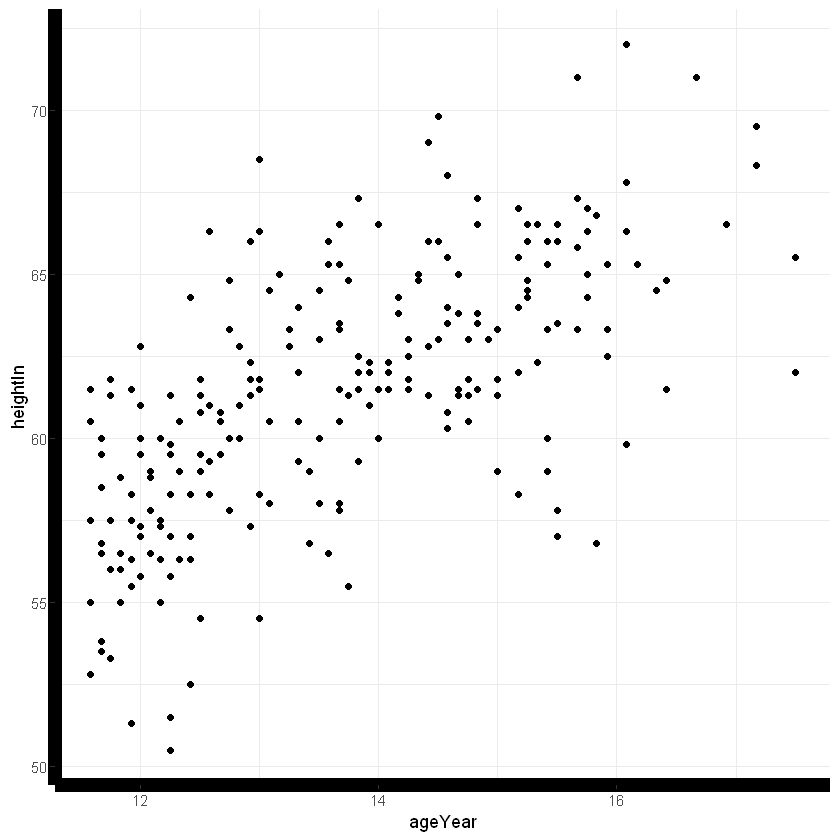

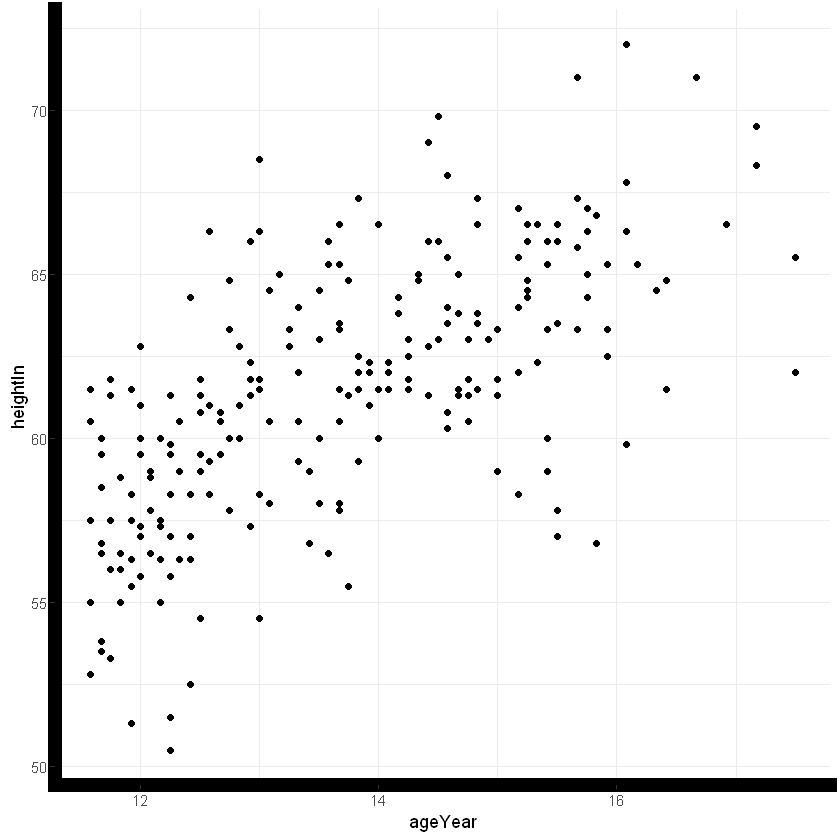

In [6]:
# 对于较粗地线条，只有一半重叠
p + theme_bw() + 
  theme(panel.border = element_blank(),
      axis.line = element_line(color='black', size=4))

# 完全重叠
p + theme_bw() +
  theme(axis.line = element_line(color='black', size=4, lineend = "square"),
        panel.border = element_blank())

## 使用对数坐标轴

💡使用scale_x_log10() 和/或 scale_y_log10:

In [8]:
library(MASS)

Warning message:
"package 'MASS' was built under R version 4.0.5"


In [9]:
head(Animals,2)

,body,brain
,<dbl>,<dbl>
Mountain beaver,1.35,8.1
Cow,465.00,423.0


In [10]:
p <- ggplot(Animals, aes(x=body, y=brain, label=row.names(Animals))) + 
      geom_text(size=3)

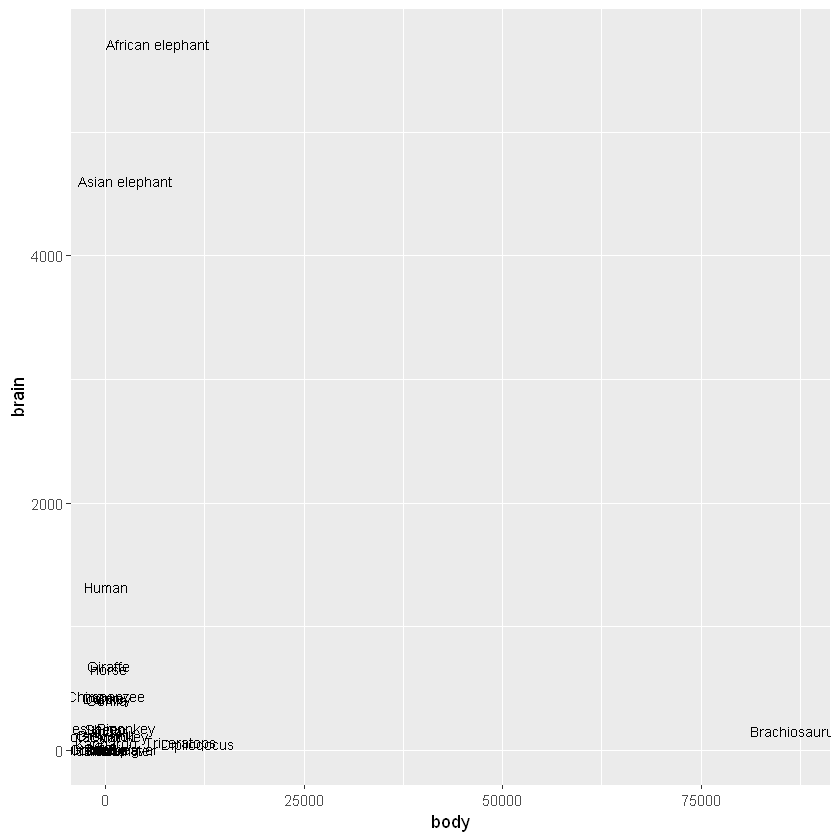

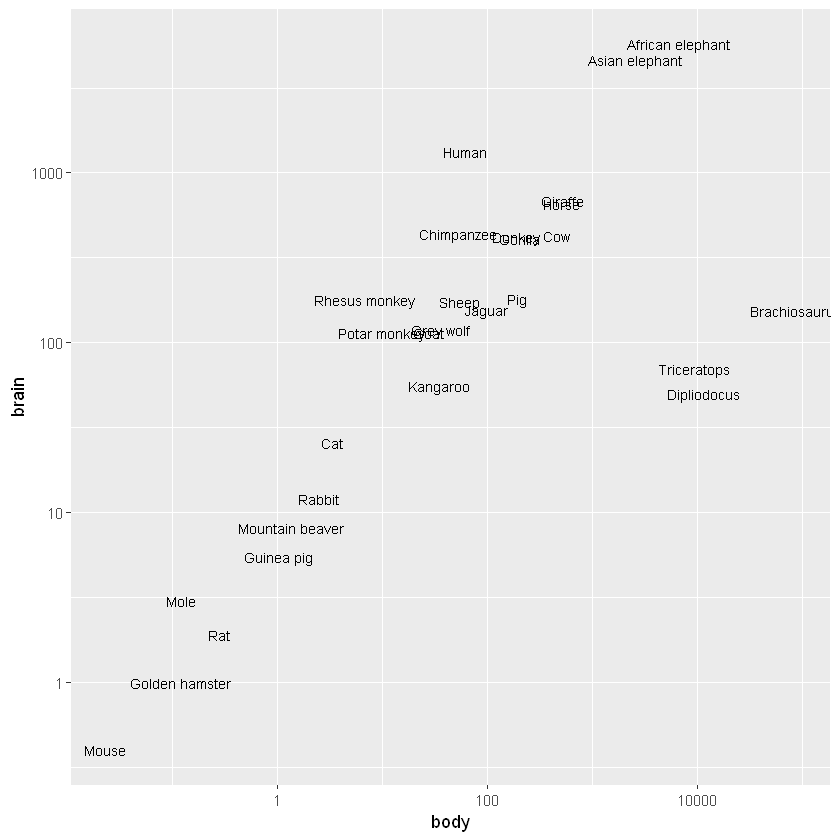

In [12]:
p

# 使用对数坐标轴
p + scale_x_log10() + 
 scale_y_log10()

关于将刻度线放到何处的问题，ggplot2会试着做出明智的选择，但是如果你不喜欢这些刻度，那么可以通过指定breaks（也可额外指定labels）来修改它们，在这个示例中，自动生成刻度线的间距较理想的间距更远。针对y轴的刻度线，可以像这样  
**10^(0:3)**  
获得一个含有从10<sup>0</sup>到10<sup>3</sup>的10的各次幂的向量

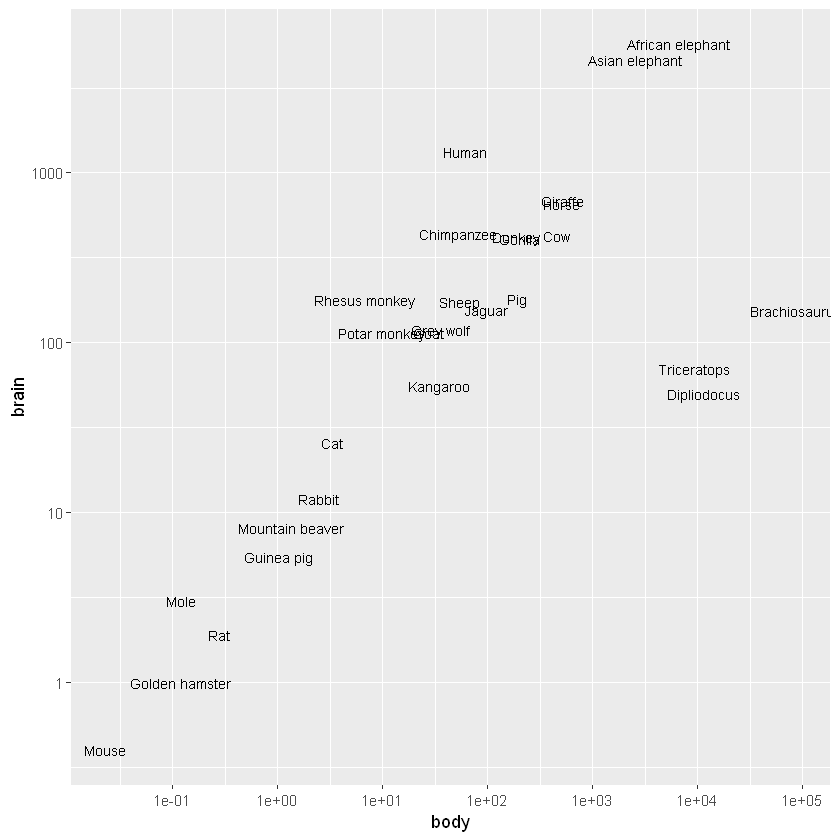

In [13]:
p + scale_x_log10(breaks=10^(-1:5)) + scale_y_log10(breaks=10^(0:3))

要让刻度标签而使用指数记数法，只要使用scales包中的函数trans_format()即可：

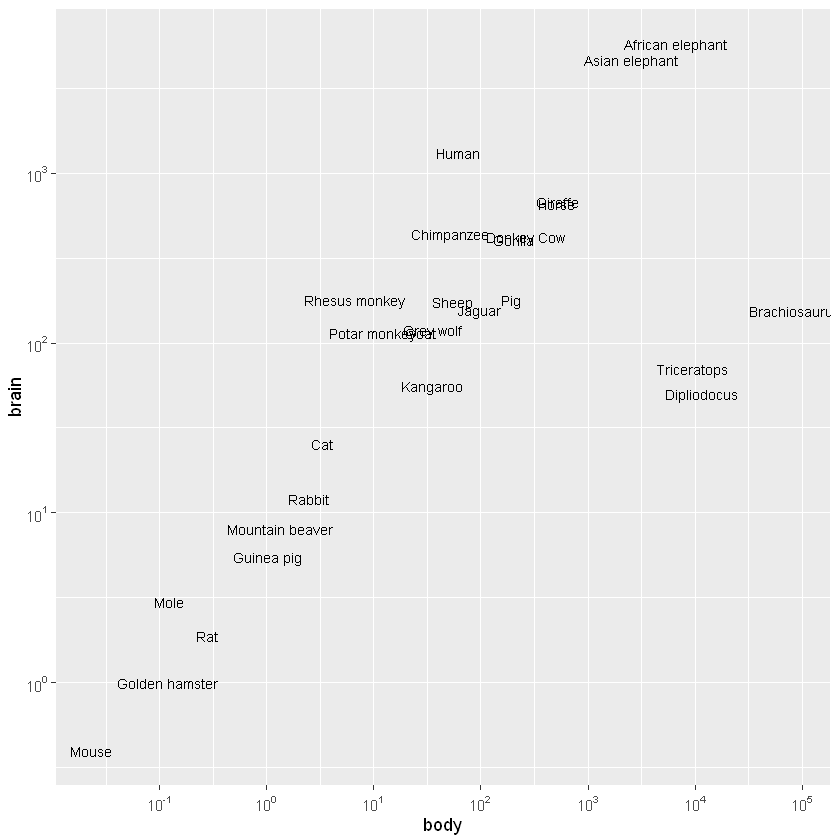

In [14]:
library(scales)
p + scale_x_log10(breaks=10^(-1:5),
                 labels=trans_format("log10", math_format(10^.x))) +
  scale_y_log10(breaks=10^(0:3),
               labels=trans_format("log10", math_format(10^.x)))

使用对数坐标轴的另一种方法是，在将数据映射到x和y坐标之前，先对其进行变换。从技术上讲，坐标轴仍然是线性的——它表示对数据变换后的数值：

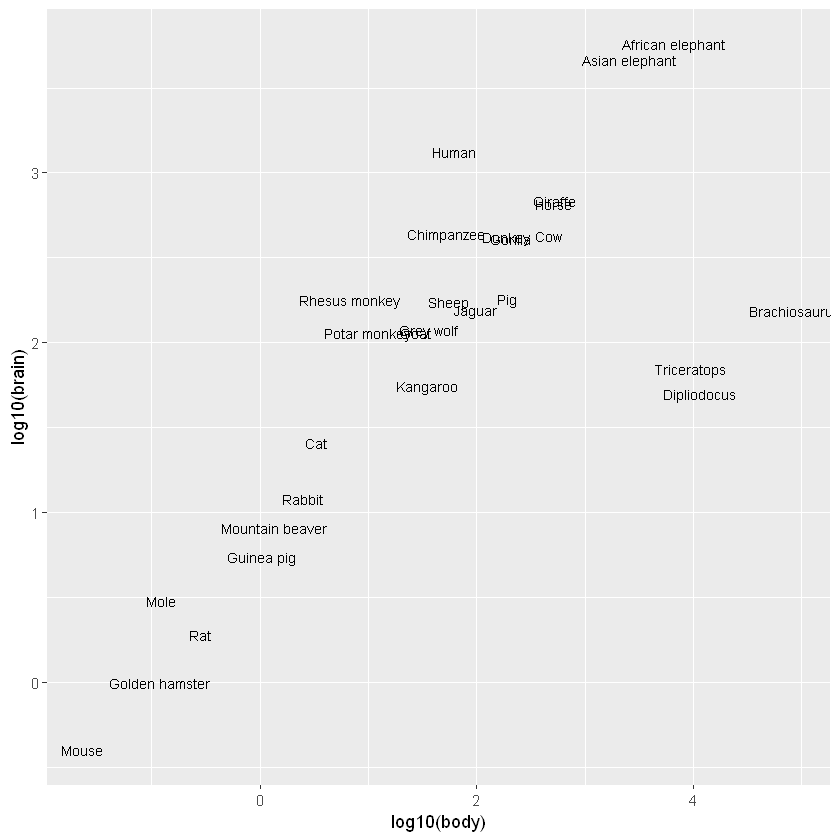

In [16]:
ggplot(Animals, aes(x=log10(body), y=log10(brain), label=row.names(Animals))) + 
 geom_text(size=3)

使用这些变换有点复杂—— scales_x_log10() 可以简写，但是对于其他的对数标度而言，需要完整地定义它们：

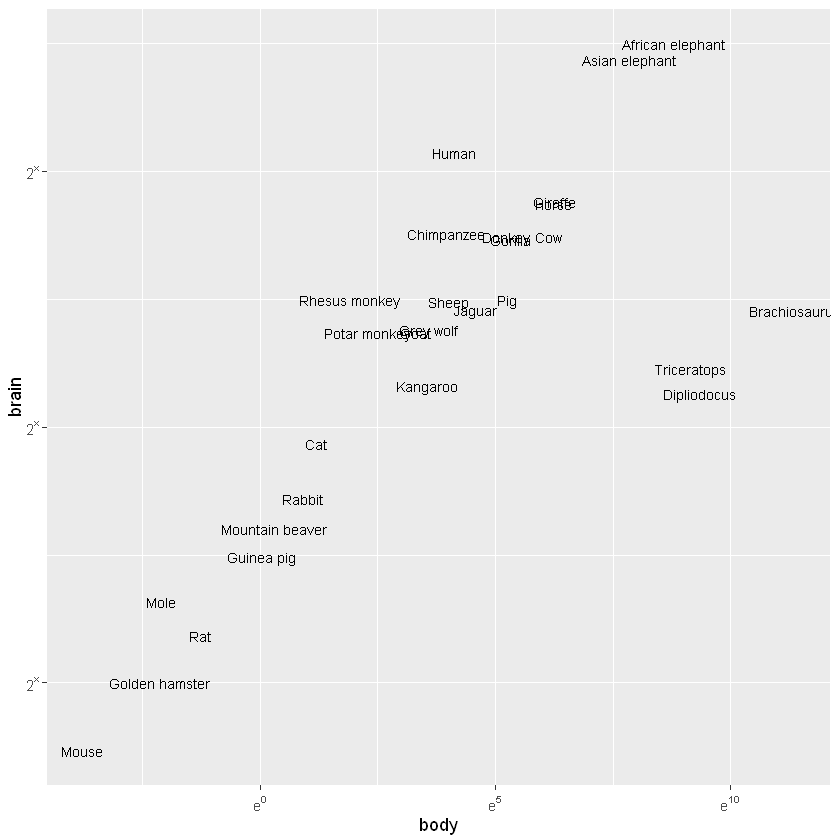

In [17]:
library(scales)

p + scale_x_continuous(trans = log_trans(),
                      breaks = trans_breaks("log", function(x) exp(x)),
                      labels = trans_format("log", math_format(e^.x))) + 
    scale_y_continuous(trans = log2_trans(),
                      breaks = trans_breaks("log2", function(x) 2^x),
                      labels = trans_format("log2", math_format(2^x)))

也可以只使用一条对数坐标轴。这种做法对于呈现金融数据往往是有用的，因为这样往往能更好地展示出按比例的变化。

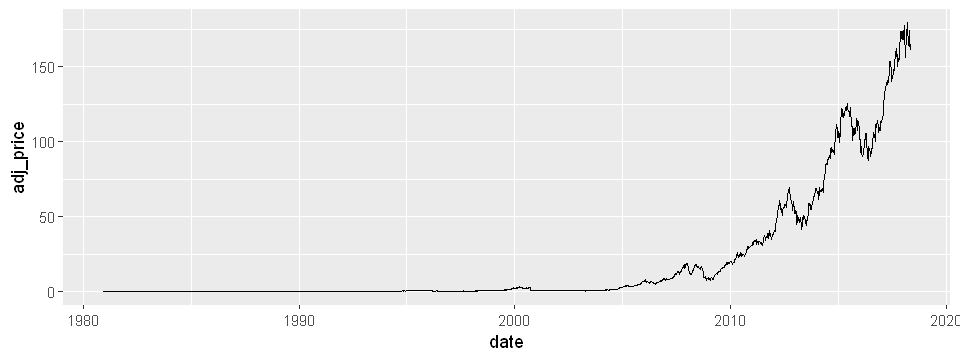

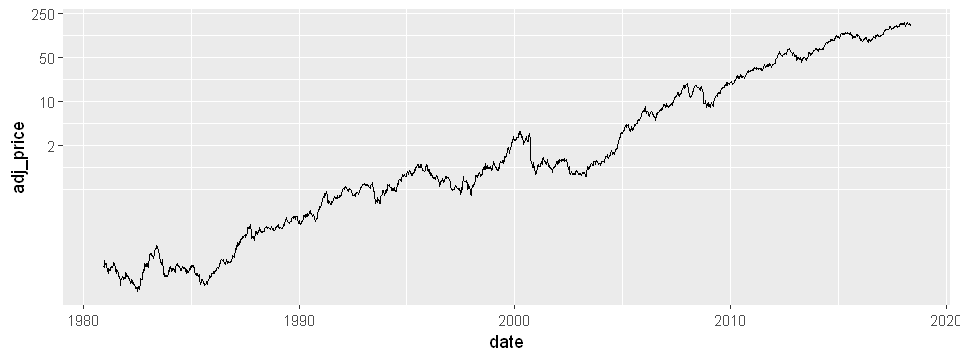

In [25]:
options(repr.plot.width = 8, repr.plot.height = 3 )
ggplot(aapl, aes(x=date, y=adj_price)) + geom_line()

ggplot(aapl, aes(x=date, y=adj_price)) + geom_line() + 
 scale_y_log10(breaks=c(2,10,50,250))

## 为对数坐标轴添加刻度

❓如何为对数坐标轴添加间距递减的刻度线  
💡使用`annotation_logticks()`  

In [2]:
library(MASS)
library(scales)

Warning message:
"package 'MASS' was built under R version 4.0.5"


In [3]:
head(Animals, 2)

,body,brain
,<dbl>,<dbl>
Mountain beaver,1.35,8.1
Cow,465.00,423.0


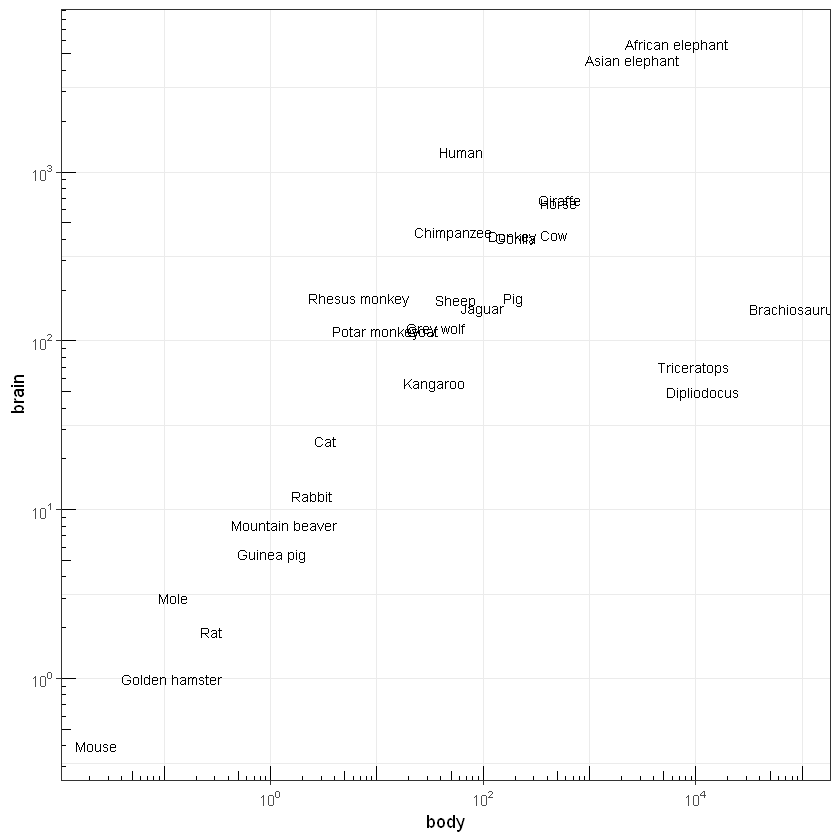

In [9]:
ggplot(Animals, aes(x=body, y=brain, label=rownames(Animals))) + 
 geom_text(size=3) + 
 annotation_logticks() + 
 theme_bw() +
 scale_x_log10(breaks = trans_breaks("log10", function(x) 10^x), 
               labels = trans_format("log10", math_format(10^.x))) + 
 scale_y_log10(breaks = trans_breaks("log10", function(x) 10^x),
               labels = trans_format("log10", math_format(10^.x)))

💬**讨论**  
使用annotation_logticks()创建的刻度线事实上是绘图区域中的几何对象。在每个10的幂次处有一条长刻度线，在每个5的位置处有一条中等长度的刻度线。

## 绘制环状图形

💡**方法**  
使用`coord_polar()`。

In [10]:
head(wind,5)

,TimeUTC,Temp,WindAvg,WindMax,WindDir,SpeedCat,DirCat
,<int>,<dbl>,<dbl>,<dbl>,<int>,<fct>,<dbl>
3,0,3.54,9.52,10.39,89,10-15,90
4,5,3.52,9.10,9.90,92,5-10,90
5,10,3.53,8.73,9.51,92,5-10,90
6,15,3.63,8.97,9.90,94,5-10,90
7,20,3.71,8.51,9.41,97,5-10,90


我们将使用`geom_histogram()`对每个`SpeedCat`和`DirCat`的类别绘制样本数量的计数值。将binwidth设置为15以使直方图的origin开始于-7.5的位置，这样每个扇形就会居中于0、15、30等位置：

Warning message:
"Removed 8 rows containing missing values (geom_bar)."


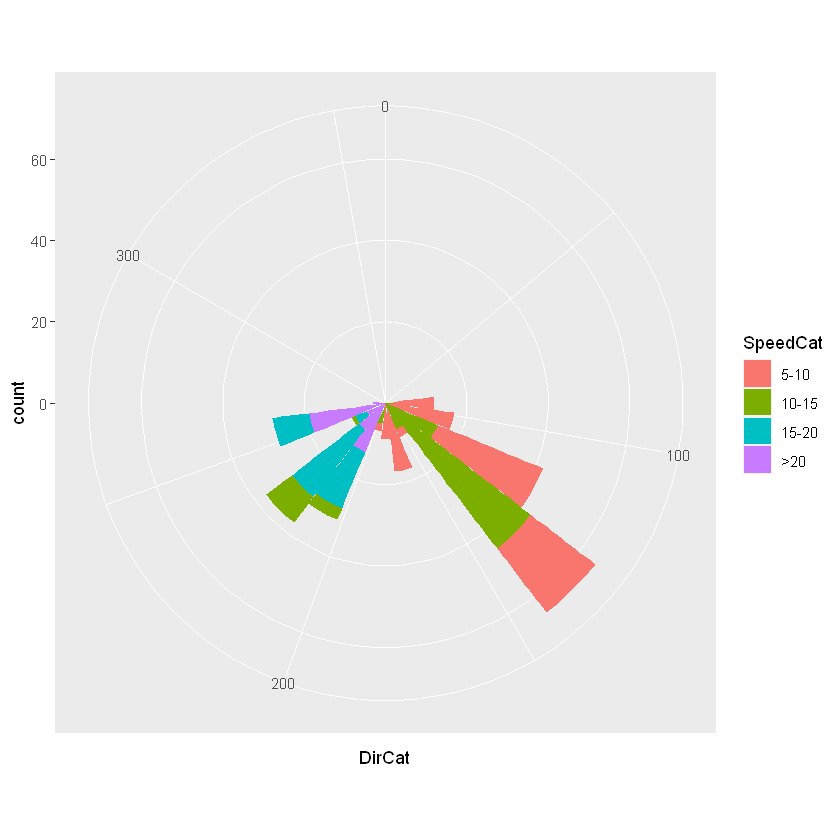

In [12]:
ggplot(wind, aes(x=DirCat, fill=SpeedCat)) + 
 geom_histogram(binwidth=15, boundary=-7.5) + 
 coord_polar() + 
 scale_x_continuous(limits=c(0,360))

使用坐标图时要小心，因为这种图形会扭曲对数据的感知。本例中，在210°位置有15个风速为15-20的观测以及13个风速大于20的观测，但是对图形匆匆一瞥时，看起来风速大于20的观测更多一些，而且还存在三个风速10-15的观测，它们却几乎不可见。

在这个例子中，我们可以通过反转图例、使用不同的调色板、添加外框线以及将分割点设置为某些更熟悉的值的方式，让图形稍微美观一些：

Warning message:
"`origin` is deprecated. Please use `boundary` instead."
Warning message:
"Removed 8 rows containing missing values (geom_bar)."


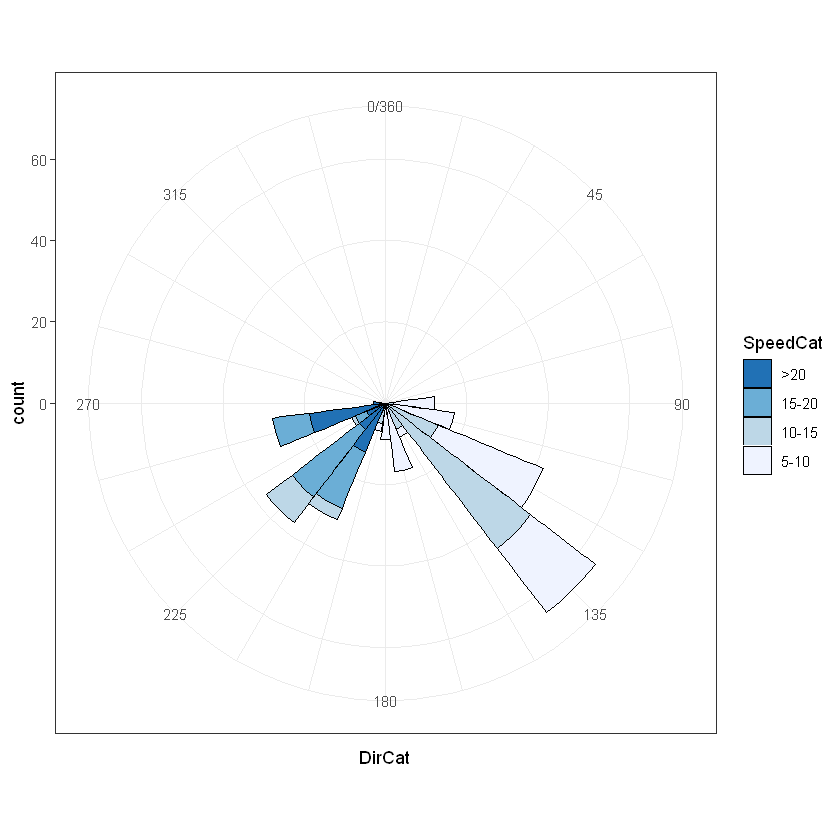

In [20]:
ggplot(wind, aes(x=DirCat, fill=SpeedCat)) + 
 theme_bw() + 
 geom_histogram(binwidth=15, origin=-7.5, color='black', size=.25) + 
 guides(fill=guide_legend(reverse = TRUE)) + 
 coord_polar() + 
 scale_x_continuous(limits = c(0,360), breaks = seq(0,360,by=45),
                   minor_breaks=seq(0, 360, by=15)) + 
 scale_fill_brewer()

使用参数start设置图形起始的角度可能也是有用的，特别是当我们使用一个离散型变量映射为角度（theta）时。起始角度的值以弧度计，如果知道要调整的角度，则必须将它转换为弧度：

In [21]:
coord_polar(start = -45 * pi / 180)

<ggproto object: Class CoordPolar, Coord, gg>
    aspect: function
    backtransform_range: function
    clip: on
    default: FALSE
    direction: 1
    distance: function
    is_free: function
    is_linear: function
    labels: function
    modify_scales: function
    r: y
    range: function
    render_axis_h: function
    render_axis_v: function
    render_bg: function
    render_fg: function
    setup_data: function
    setup_layout: function
    setup_panel_guides: function
    setup_panel_params: function
    setup_params: function
    start: -0.785398163397448
    theta: x
    train_panel_guides: function
    transform: function
    super:  <ggproto object: Class CoordPolar, Coord, gg>

极坐标可与其他几何对象搭配使用，包括线和点。在使用这些几何对象时有一些重要的问题要牢记于心。首先，默认情况下，对于映射到y（或者说r）的变量，最小值将被映射到中心；

## 在坐标轴上使用日期

# 第九章 控制图形的整体外观

## 设置图形标题

# 第十章 图例

## 移除图例

💡使用 guides()，并指定需要移除图例的标度

In [2]:
p <- ggplot(PlantGrowth, aes(x=group, y=weight, fill=group)) + 
 geom_boxplot() + 
 theme_bw(base_size = 25) + 
 theme(panel.grid = element_blank())

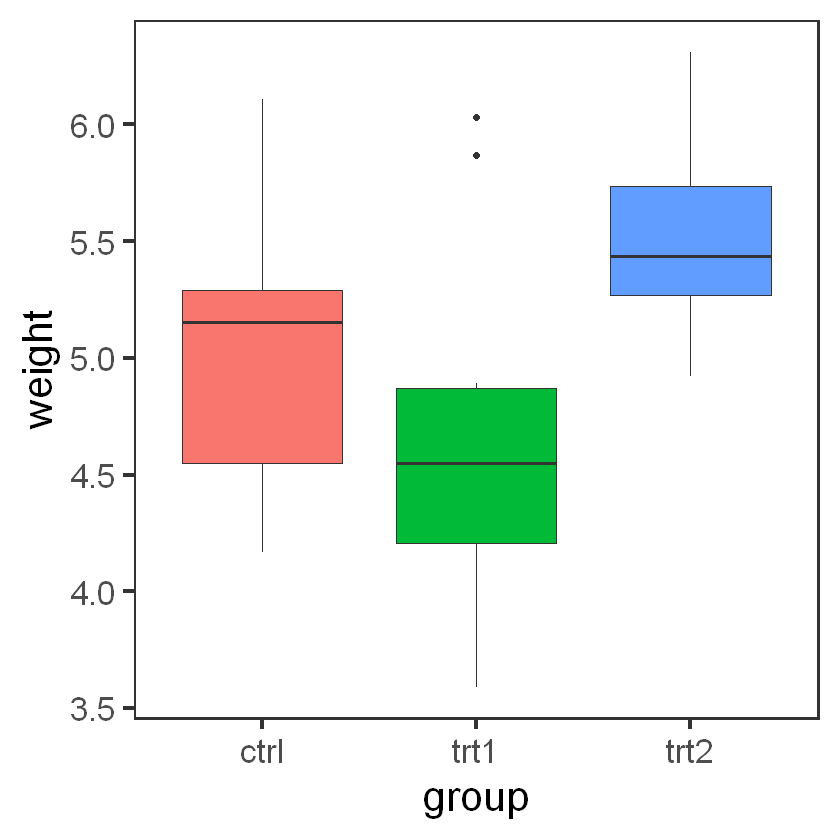

In [4]:
p + guides(fill="none")

或者在标度中设置 guide="none"

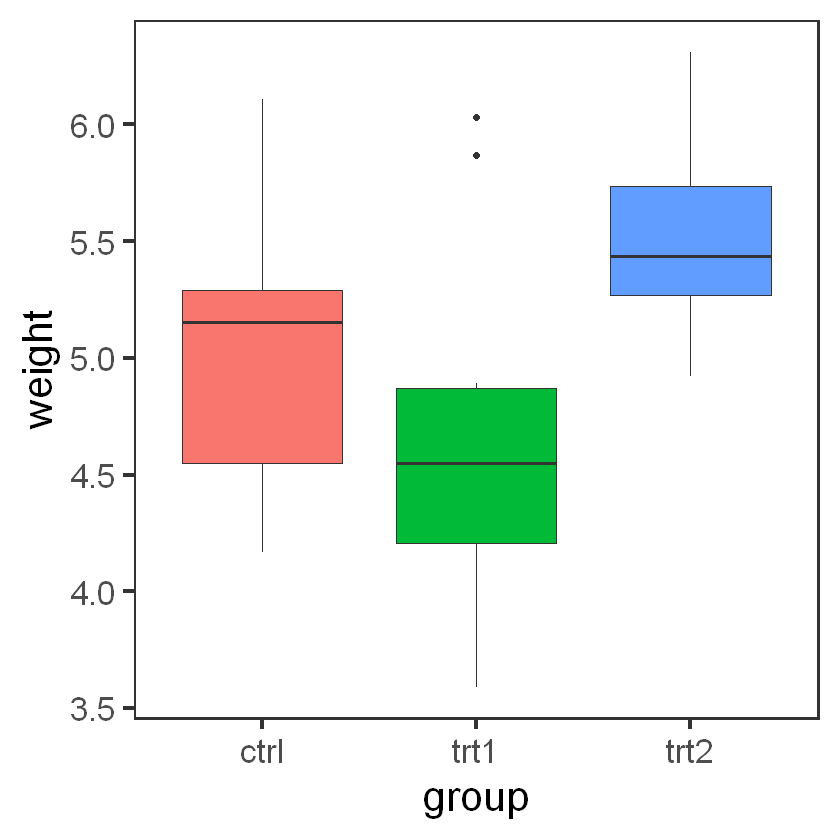

In [6]:
p + scale_fill_discrete(guide="none")

使用主题系统 theme，会移除所有图例

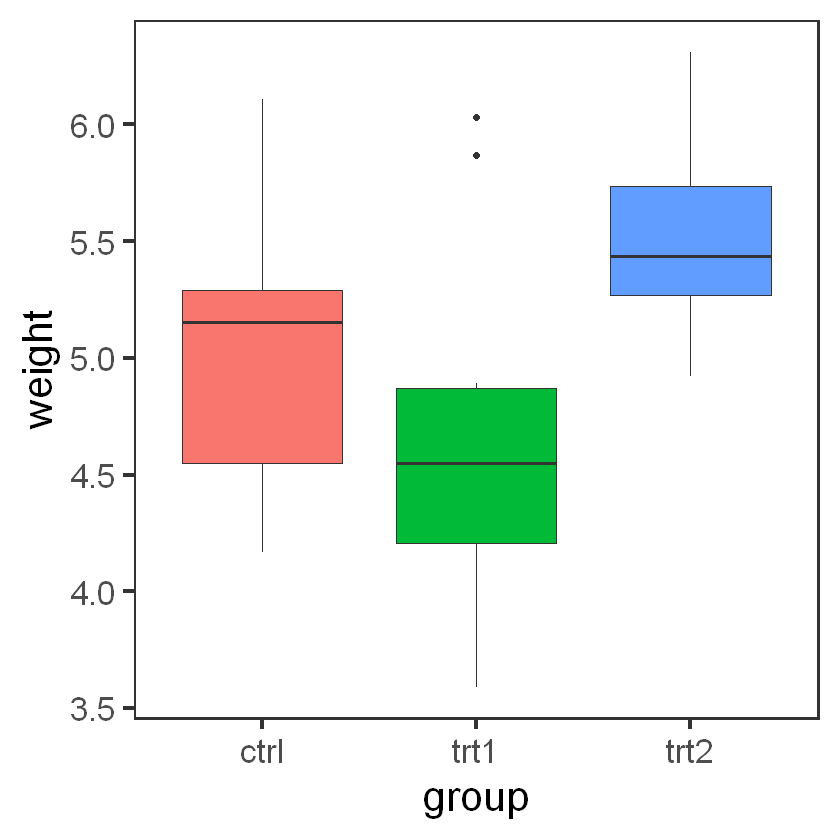

In [7]:
p + theme(legend.position = "none")

当某个变量被映射到图形属性fill上时，默认使用的标度为scale_fill_discrete() (与scale_fill_hue()等价)，这会将不同因子水平映射到色环上均匀分布的颜色值上。对于fill来说，也有其他的标度可用，如scale_fill_manual()。

## 修改图例的位置

💡使用theme(legend.position=...)即可。通过指定位置参数为top、left、right或bottom，图例即可被放置在顶部、左侧、右侧或底部：

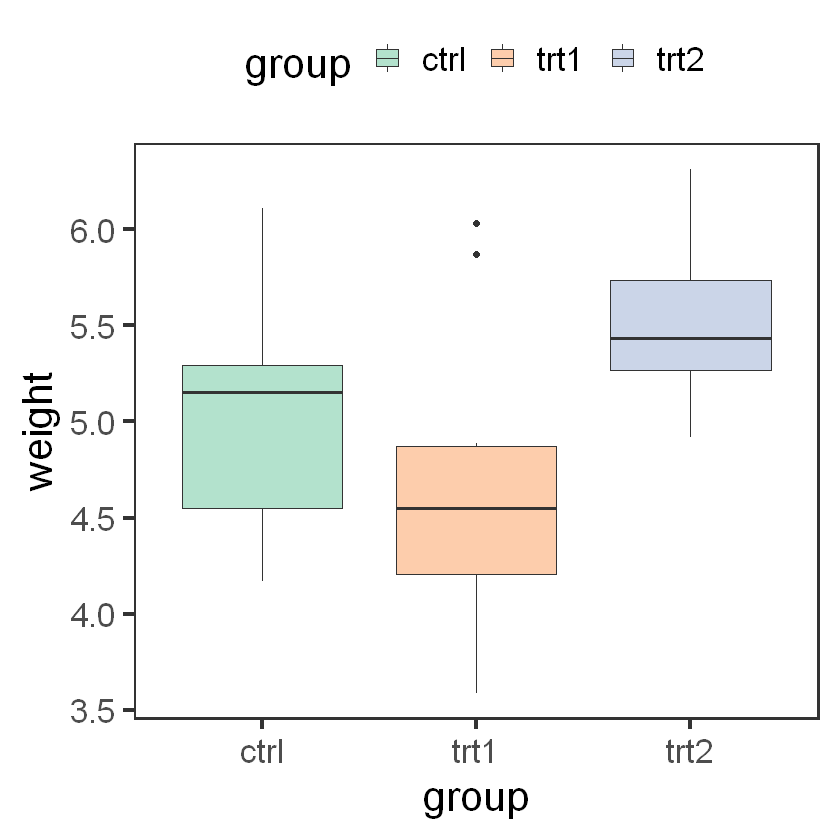

In [12]:
p + 
 scale_fill_brewer(palette = 'Pastel2') + 
 theme(legend.position = 'top')

通过指定像 legend.position=c(1,0) 这样的位置坐标，图例亦可被置于绘图区域内部。空间中左下角为原点(0,0)，右上角为(1,1)

也可以使用 legend.justification 来指定图例框的哪一部分被放置到 legend.position 所指定的位置上。默认情况下，图例的中心(0.5, 0.5)被置于给定的坐标处，但是指定一个不同的点往往是有用的。

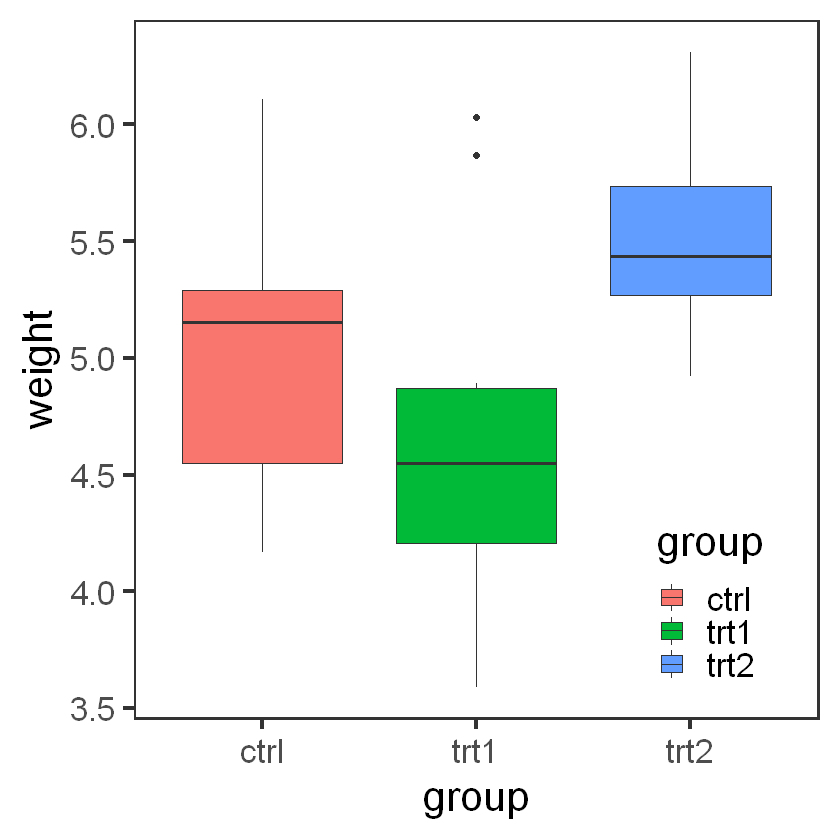

In [20]:
p + theme(legend.position = c(0.95,0.025), legend.justification = c(1,0))

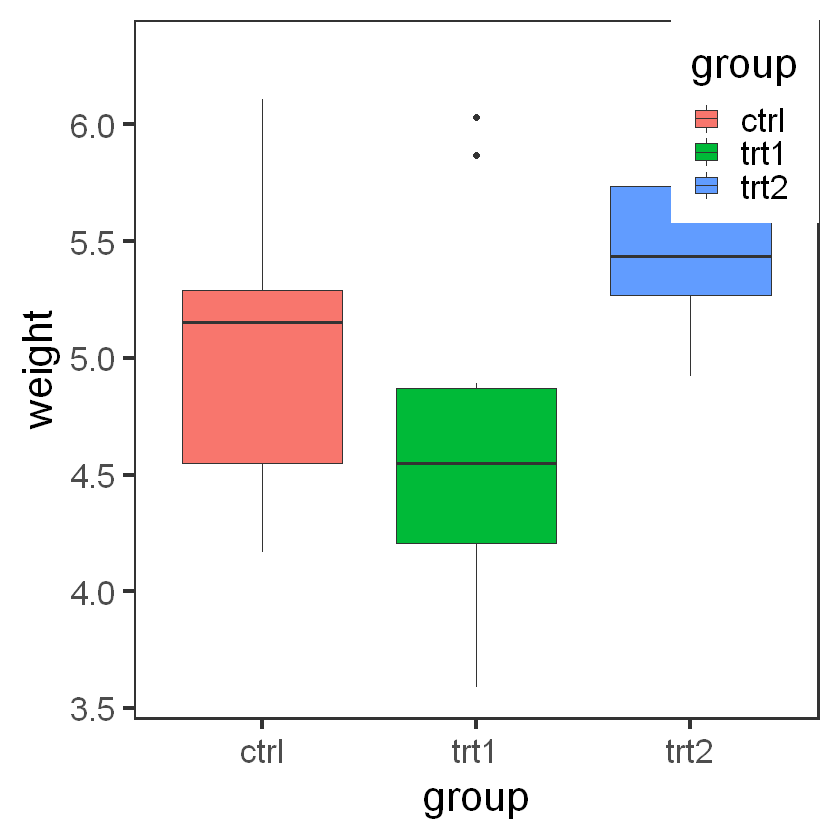

In [14]:
p + theme(legend.position = c(1,1), legend.justification = c(1,1))

在绘图区域内放置图例时，添加一个不透明的边界使其与图形分开可能会有所帮助

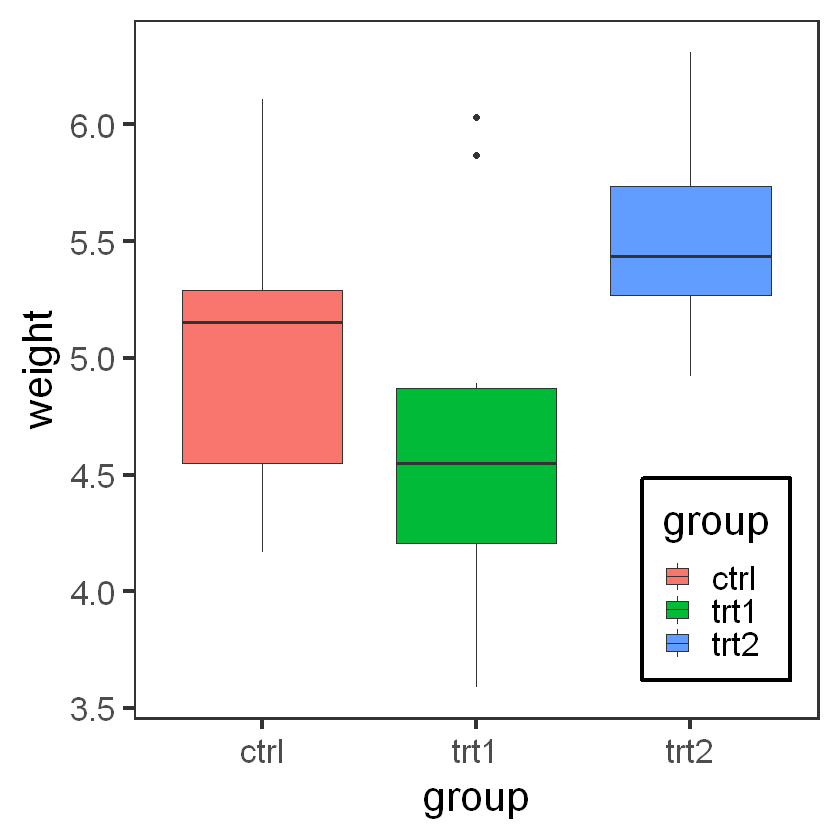

In [22]:
p + theme(legend.background = element_rect(fill = "white",color = "black"),
          legend.position = c(.85, .2))

## 修改图例项目的顺序

将对应标度的参数limits设置为理想的顺序即可

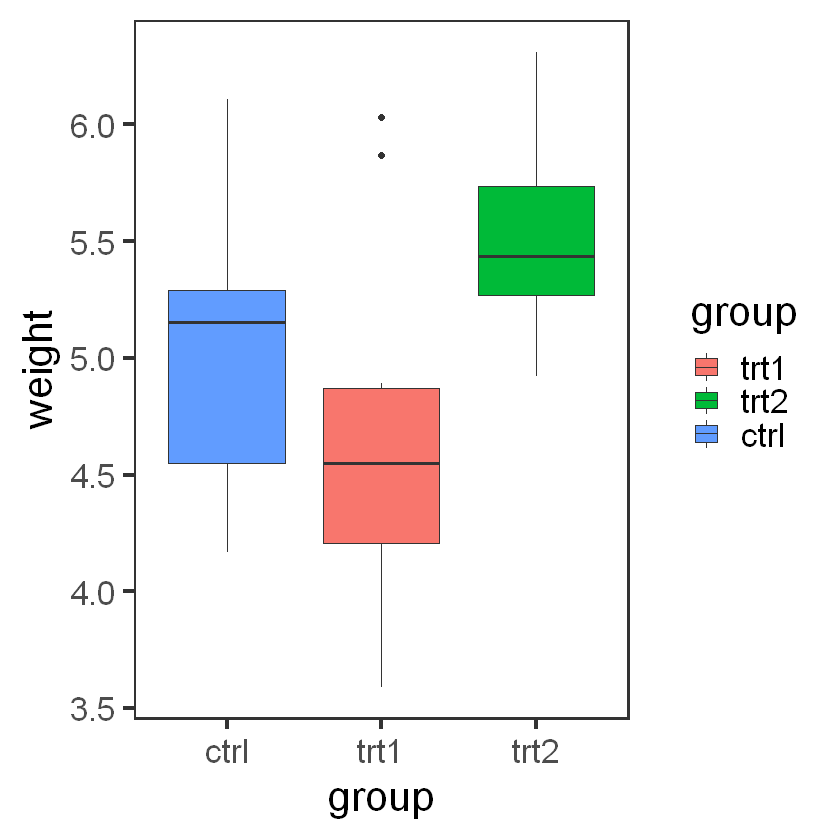

In [23]:
p + scale_fill_discrete(limits=c('trt1','trt2','ctrl'))

要注意的是，x轴上的顺序并没有改变。要修改这个顺序，需要设置 scale_x_discrete() 的limits参数，或者修改数据，使其拥有一个不同因子的水平顺序。

使用灰度调色板

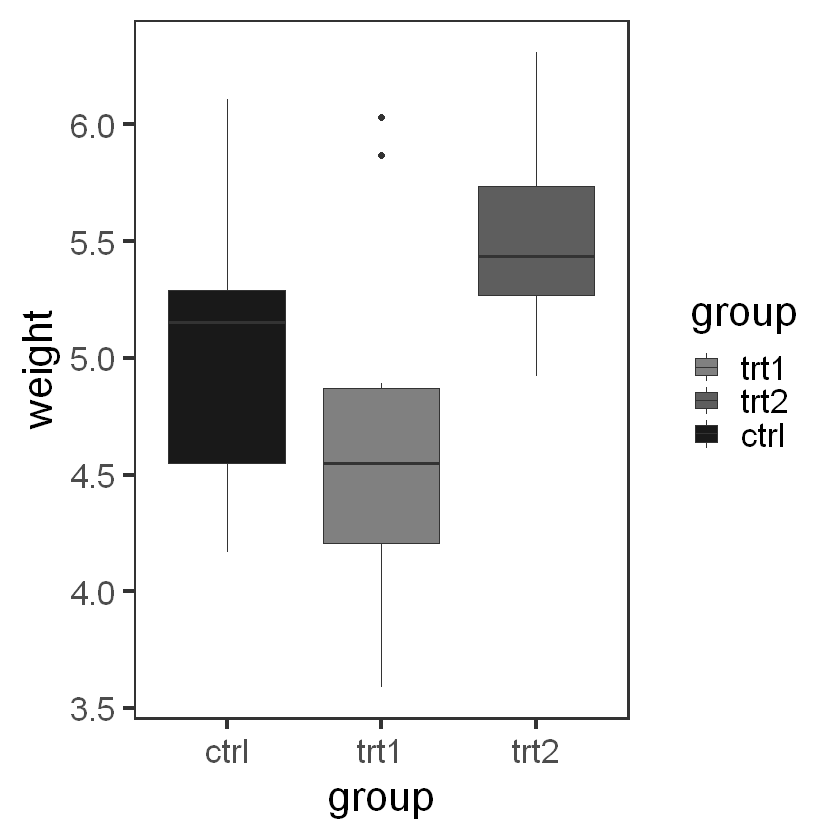

In [24]:
p + scale_fill_grey(start = .5, end = .1, limits=c('trt1', 'trt2', 'ctrl'))

## 反转图例项目的顺序

💡添加guides(fill=guide_legend(reverse=TRUE))以反转图例的顺序（对于其他图形属性，使用相应图形属性的名称，如color或size替换fill即可）：

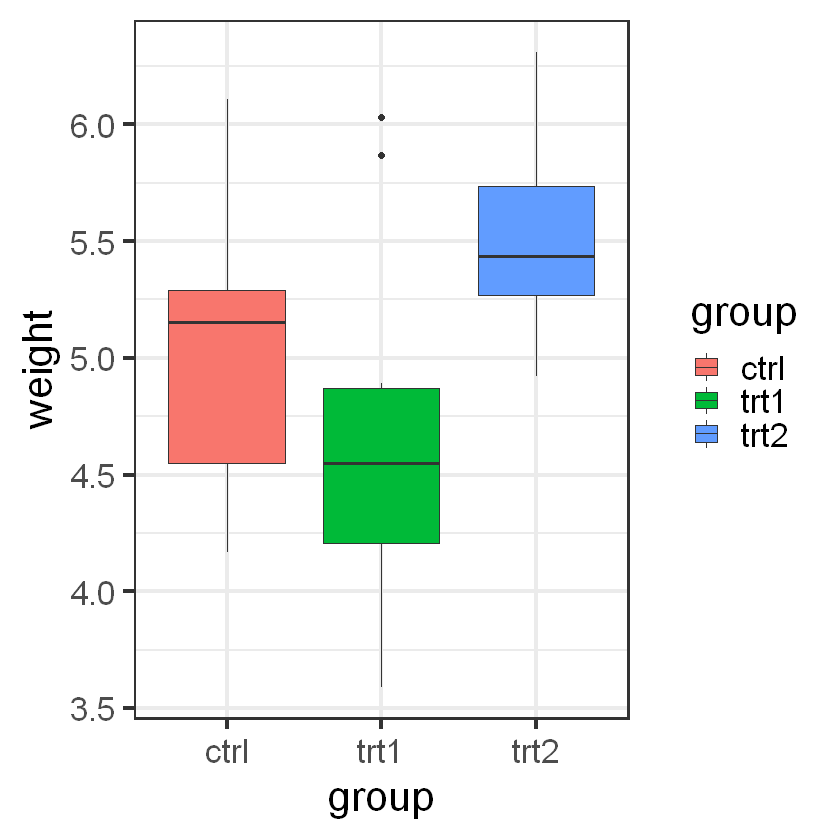

In [27]:
p <- ggplot(PlantGrowth, aes(x=group, y=weight, fill=group)) +
 theme_bw(base_size = 25) + 
 geom_boxplot()
p

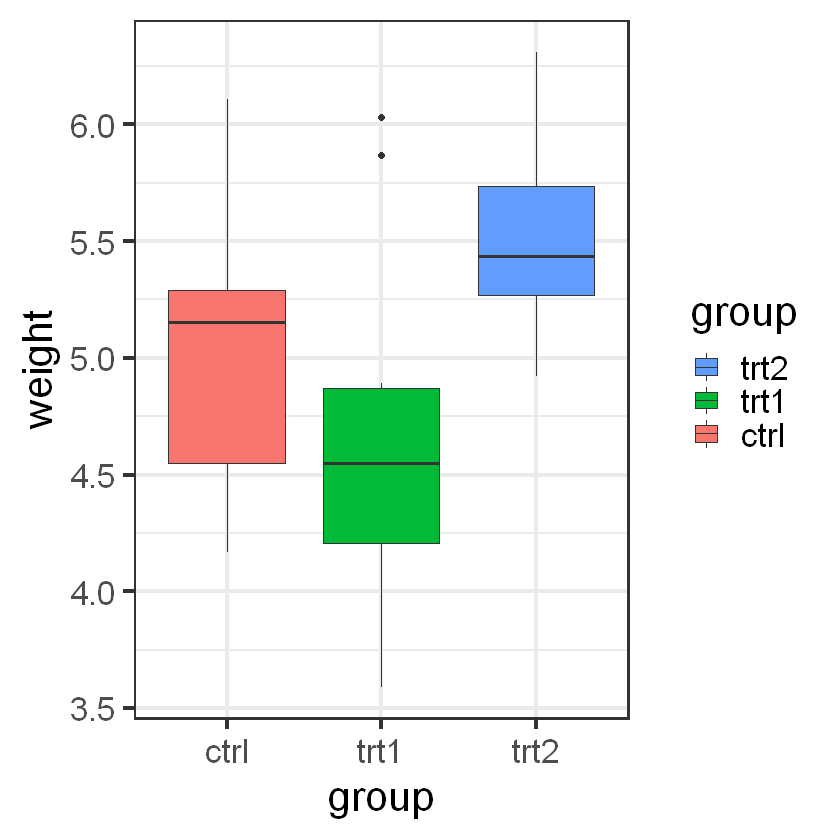

In [28]:
p + guides(fill=guide_legend(reverse = TRUE))

在设定标度的同时也可以控制图例

In [ ]:
scale_fill_hue(guide=guide_legend(reverse = TRUE))

## 修改图例标题

In [32]:
p <- ggplot(PlantGrowth, aes(x=group, y=weight, fill=group)) + 
 geom_boxplot() + 
 theme_bw(base_size = 25)

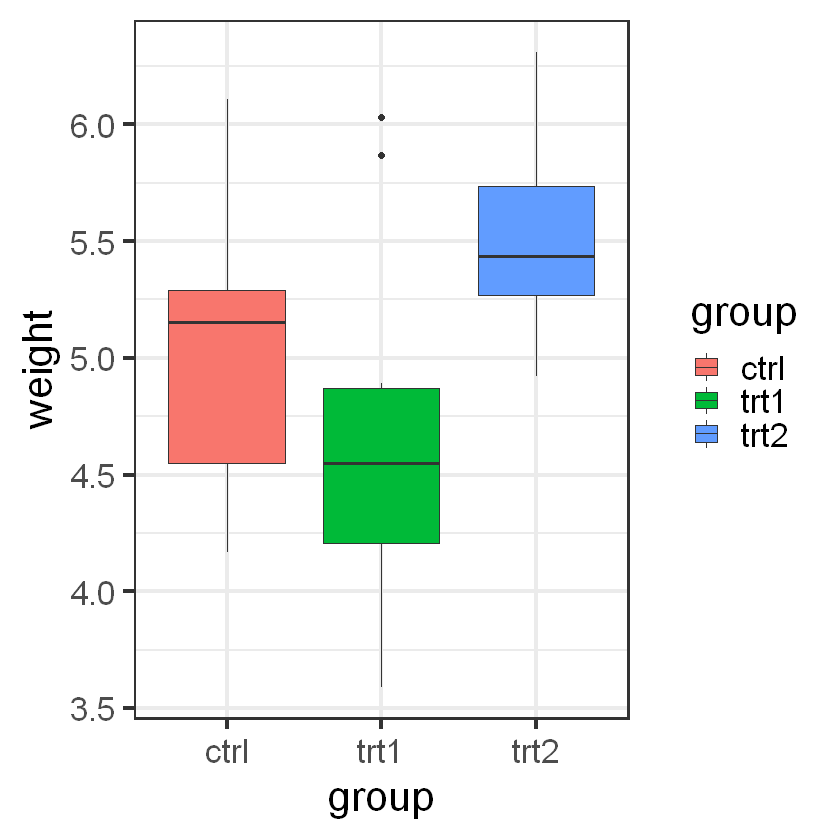

In [33]:
p

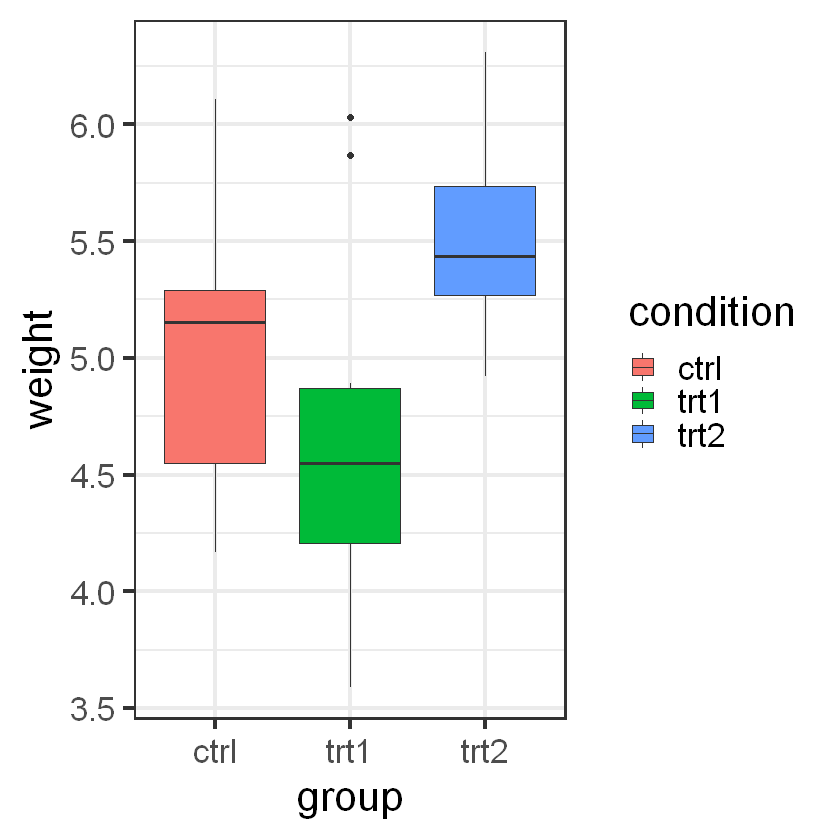

In [36]:
# 指定图形属性进行命名
p + labs(fill='condition')

在设定标度时也可以设置图例标题。由于图例和坐标轴均为引导元素，这样做与设置x轴或y轴标题的原理是相同的。

In [ ]:
p + scale_fill_discrete(name='condition')

如果有多个变量被映射到带有图例的图形属性（即除x和y以外的图形属性），可以分别设置每个图例的标题。

In [37]:
library(gcookbook)

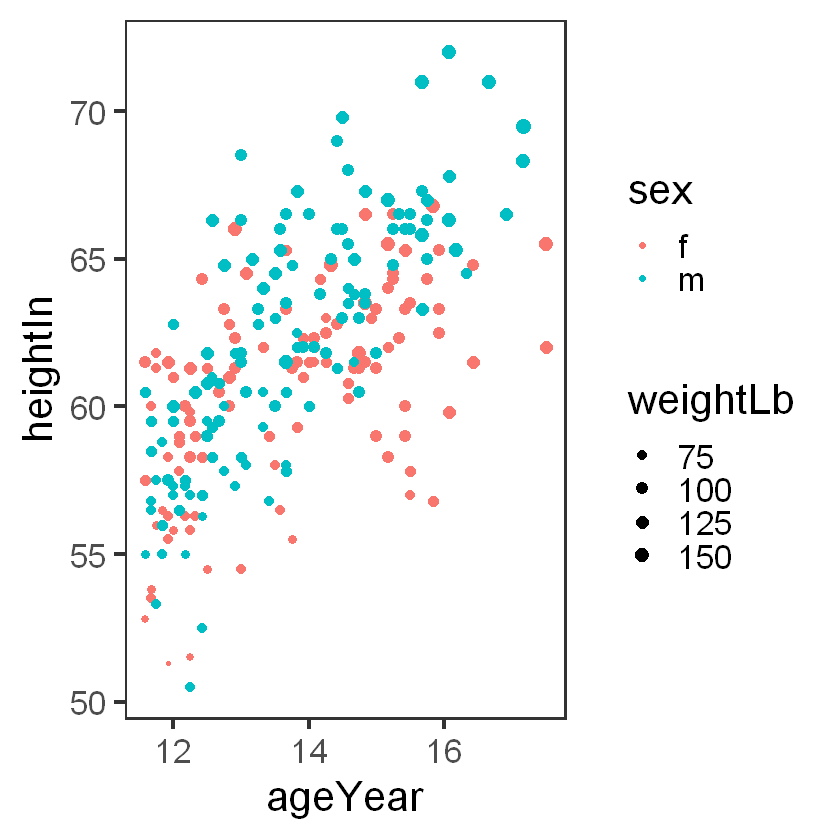

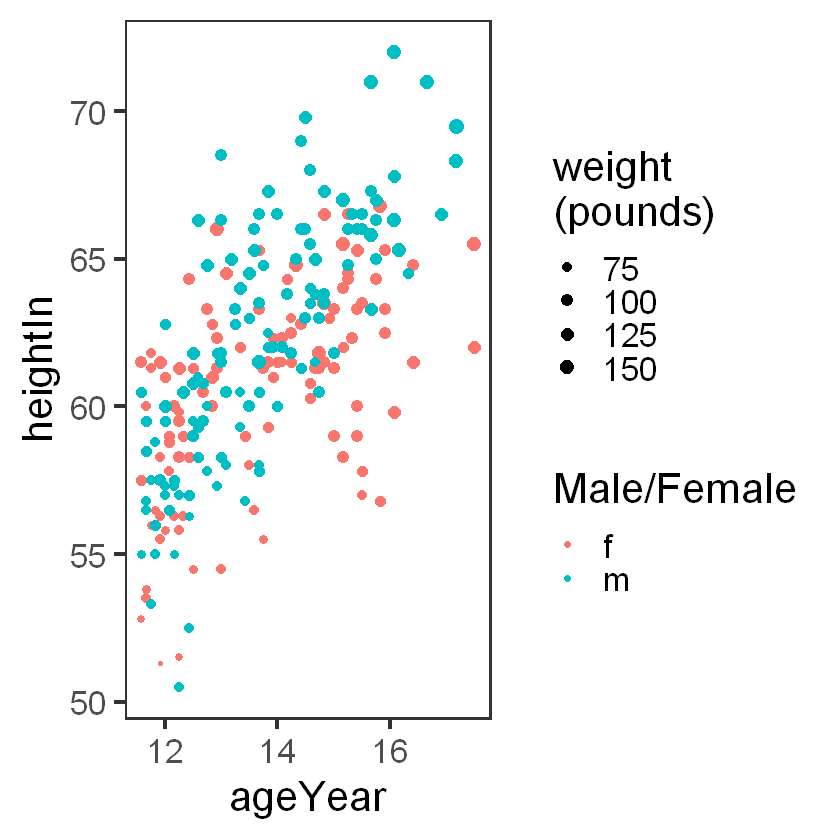

In [40]:
hw <- ggplot(data = heightweight, aes(x=ageYear, y=heightIn, color=sex)) + 
 geom_point(aes(size=weightLb)) + scale_size_continuous(range = c(1,4)) + 
 theme_bw(base_size = 25) + 
 theme(panel.grid = element_blank())

hw

hw + labs(color='Male/Female', size='weight\n(pounds)')

## 修改图例标题的外观

使用theme(legend.title=element_text())

Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
"Windows字体数据库里没有这样的字体系列"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"Windows字体数据库里没有这样的字体系列"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"Windows字体数据库里没有这样的字体系列"


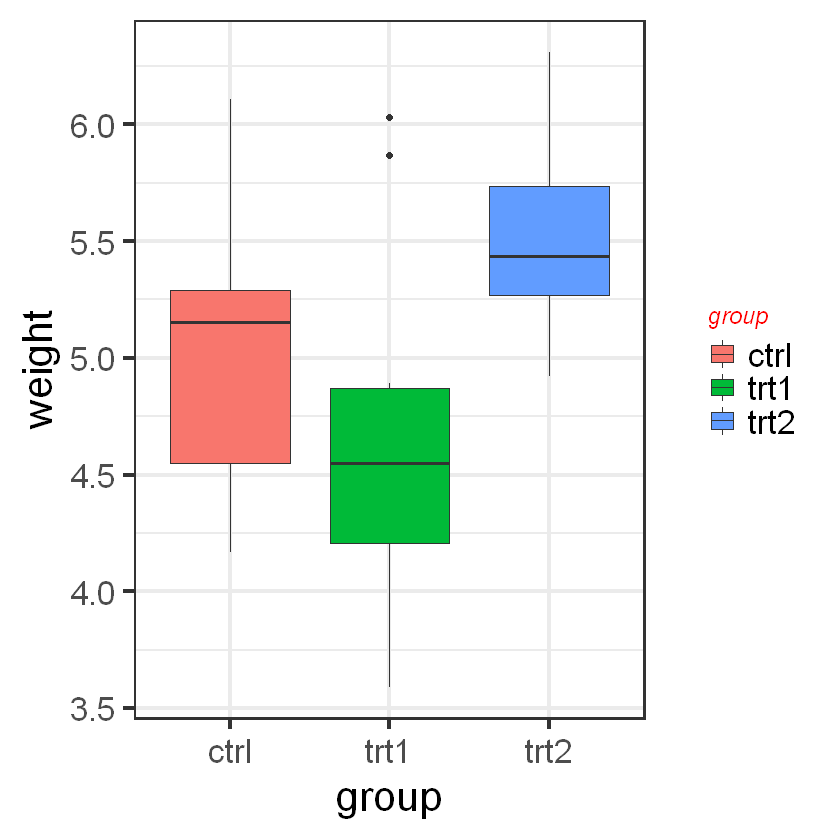

In [43]:
p <- ggplot(PlantGrowth, aes(x=group, y=weight, fill=group)) + 
 geom_boxplot() + theme_bw(base_size = 25)

p + theme(legend.title = element_text(face = 'italic', family = 'times', color = 'red', size = 14))

## 移除图例标题

添加语句guides(fill=guide_legend(title=NULL))可以从图例中移除标题

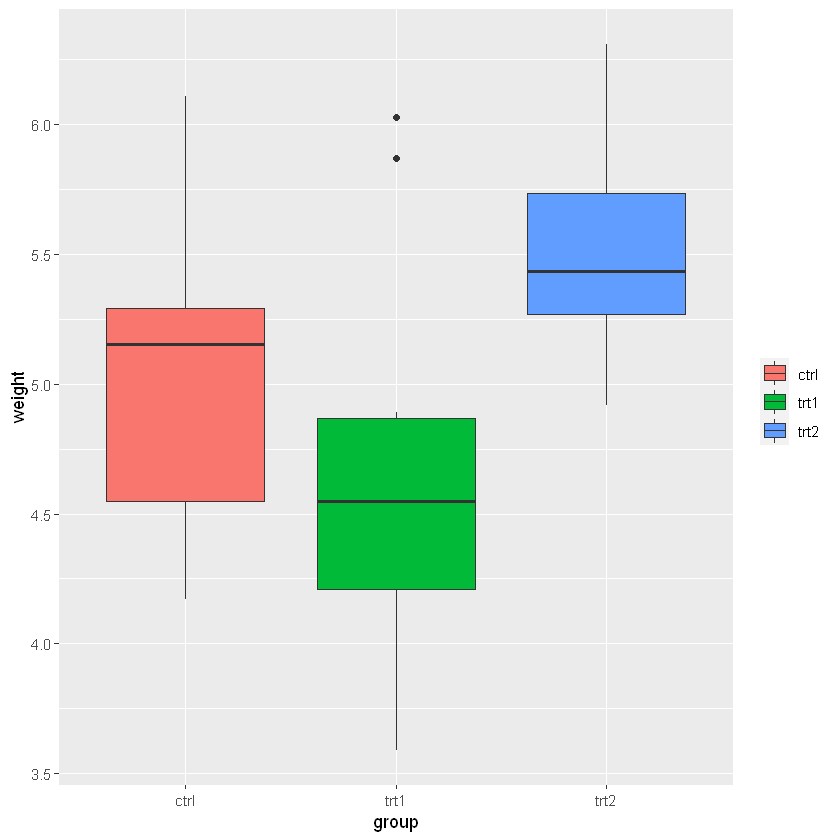

In [44]:
ggplot(PlantGrowth, aes(x=group, y=weight, fill=group)) + 
 geom_boxplot() + 
 guides(fill=guide_legend(title = NULL))

## 修改图例标签

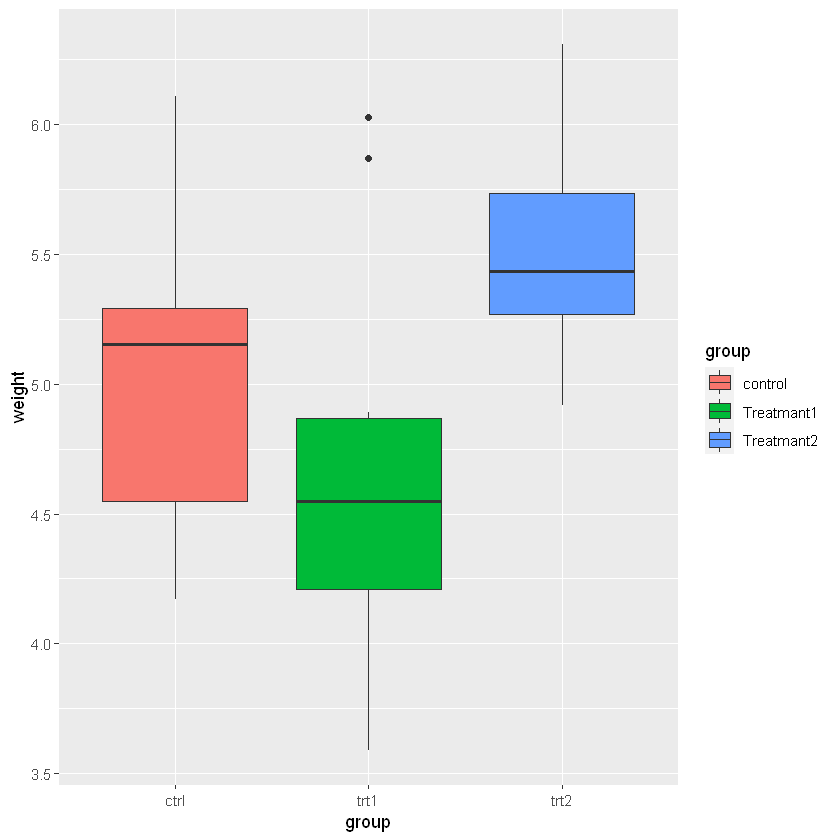

In [50]:
library(gcookbook)

p <- ggplot(PlantGrowth, aes(x=group, y=weight, fill=group)) + 
 geom_boxplot()

p + scale_fill_discrete(labels=c('control','Treatmant1','Treatmant2'))

如果有一个变量被分别映射到两个图形属性，则默认会生成一个组合了两种情况的图例。如果希望修改图例标签，则必须同时修改两种标度中的标签；否则会得到两个分离的图例。

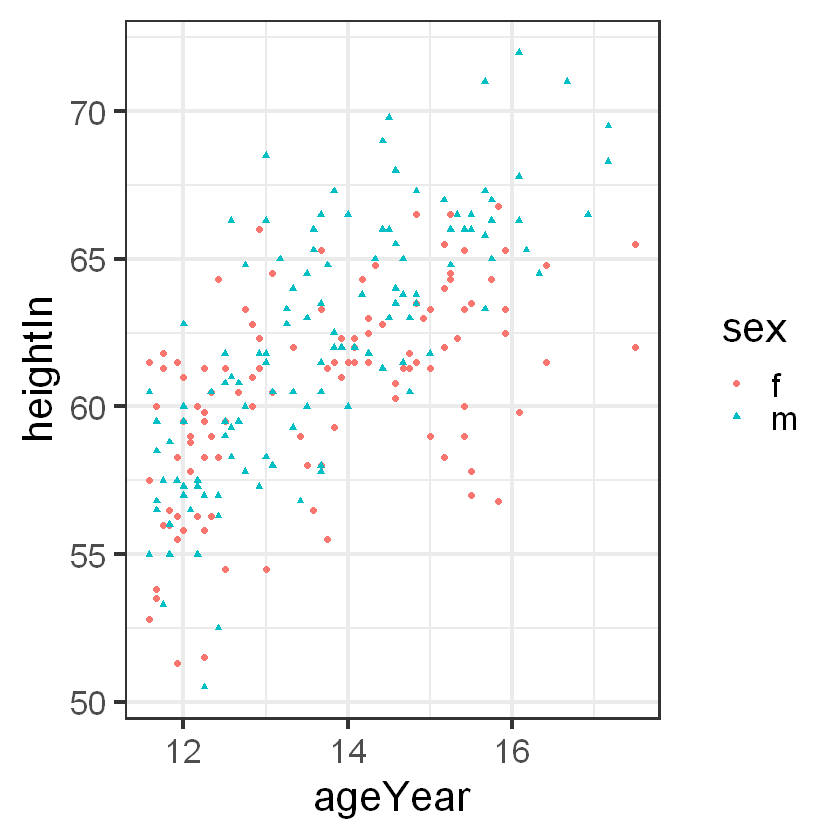

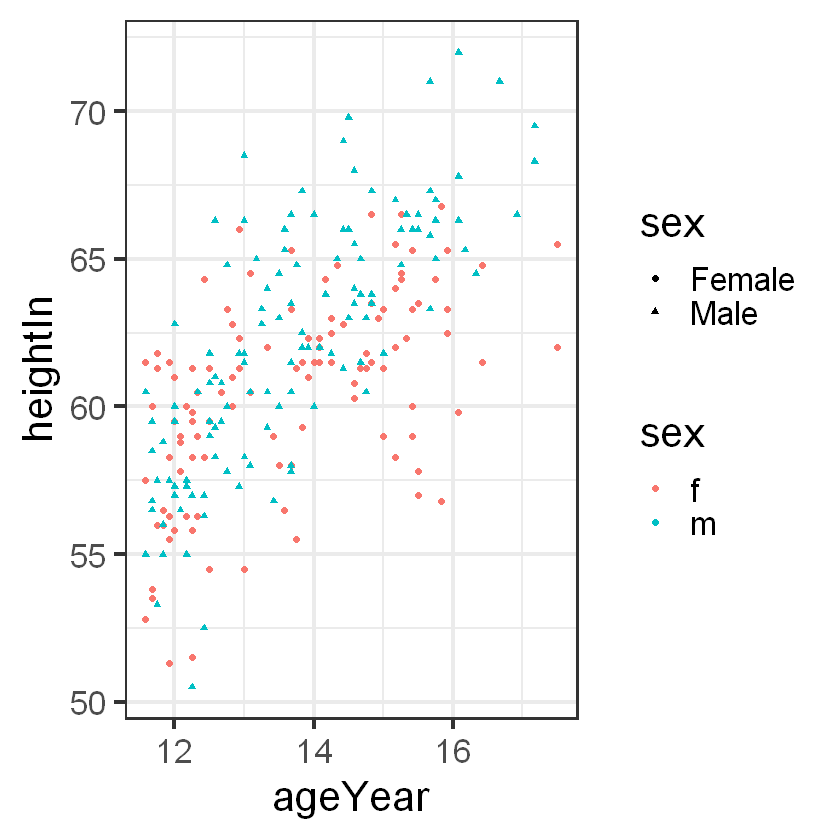

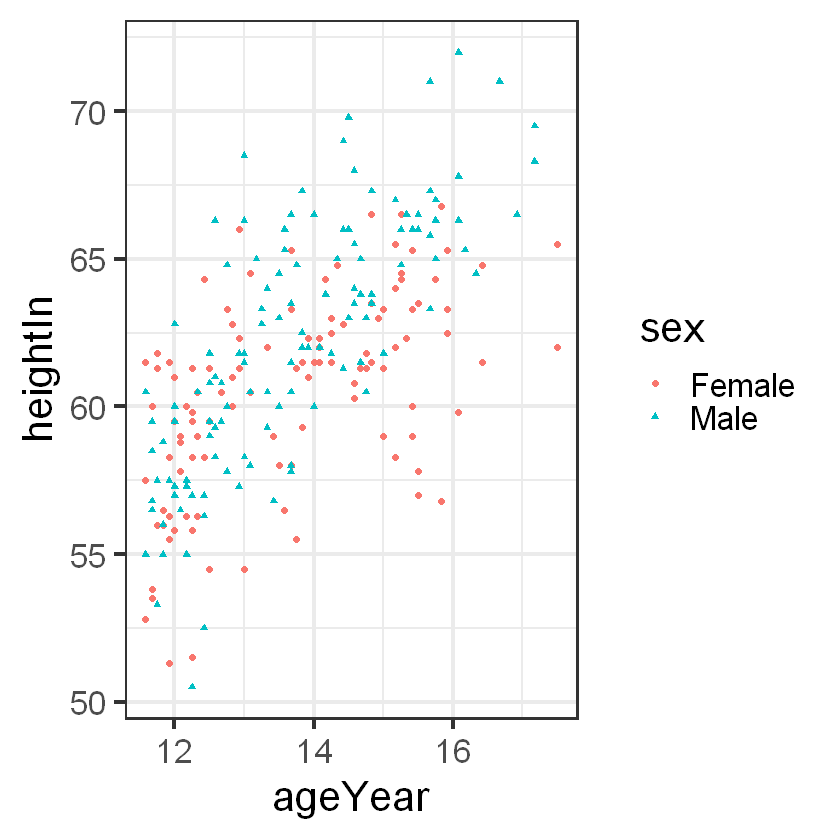

In [54]:
p <- ggplot(heightweight, aes(x=ageYear, y=heightIn, shape=sex, color=sex))+ 
 geom_point() + 
 theme_bw(base_size = 25)

p 

# 修改一个标度中的标签
p + scale_shape_discrete(labels=c('Female','Male'))

p + scale_shape_discrete(labels=c('Female','Male')) + 
 scale_color_discrete(labels=c('Female','Male'))

## 修改图例标签的外观

使用theme(legend.text=element_text())

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"Windows字体数据库里没有这样的字体系列"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"Windows字体数据库里没有这样的字体系列"


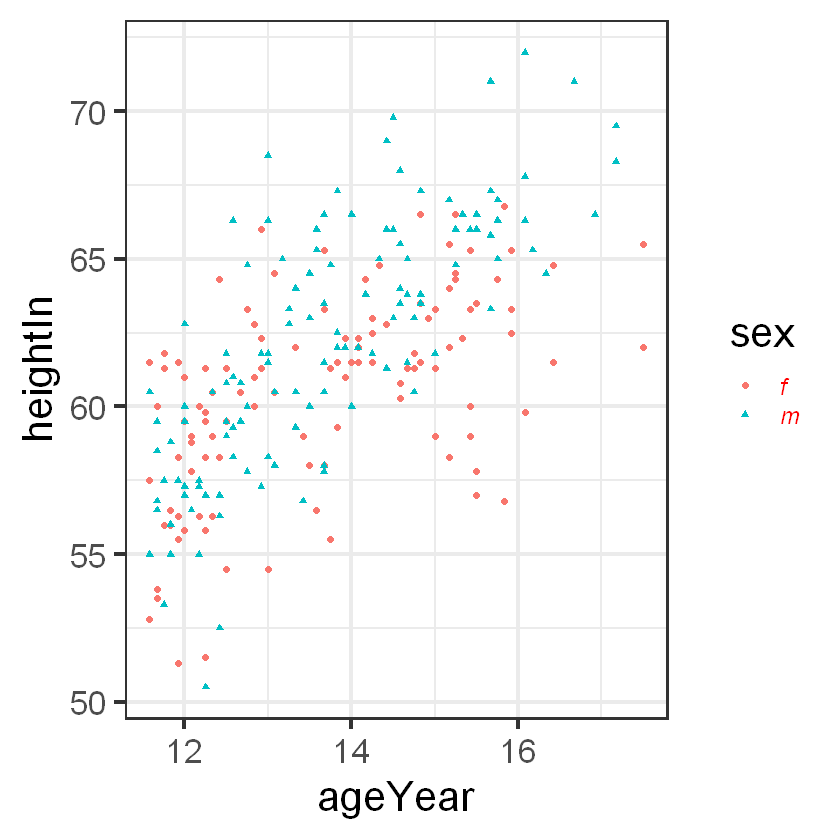

In [55]:
p + theme(legend.text = element_text(face = 'italic', family = 'Times', color = 'red', size = 14))

# 第十一章 分面

## 使用分面将数据分割绘制到子图中

In [175]:
head(mpg,2)

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact


In [176]:
p <- ggplot(mpg, aes(x=displ, y=hwy)) + geom_point()

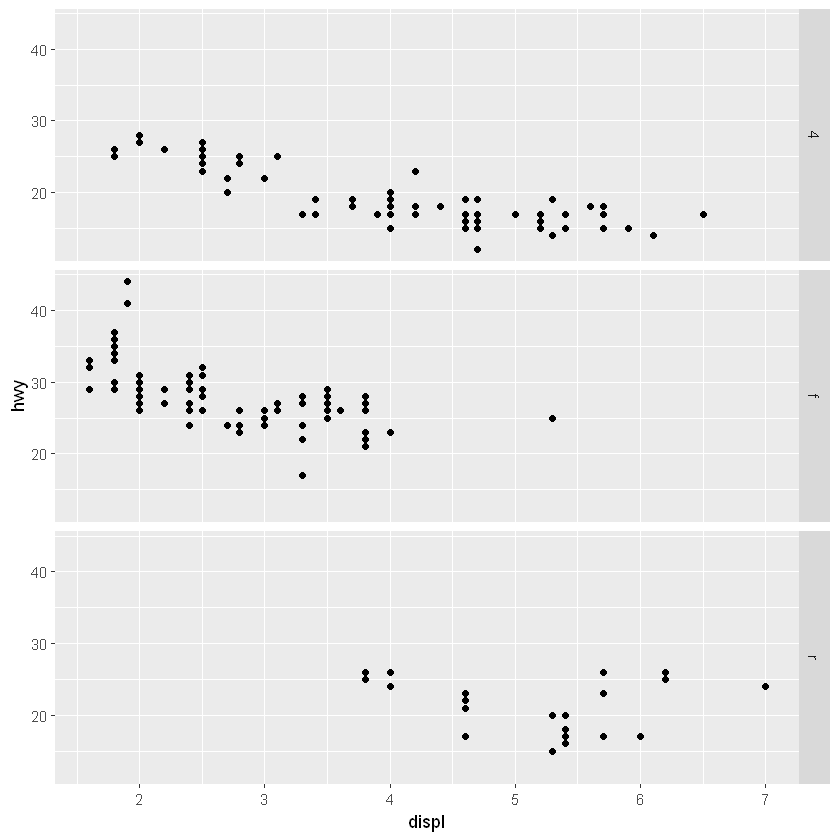

In [177]:
# 纵向排列的子面板根据 drv 分面
p + facet_grid(drv ~ .)

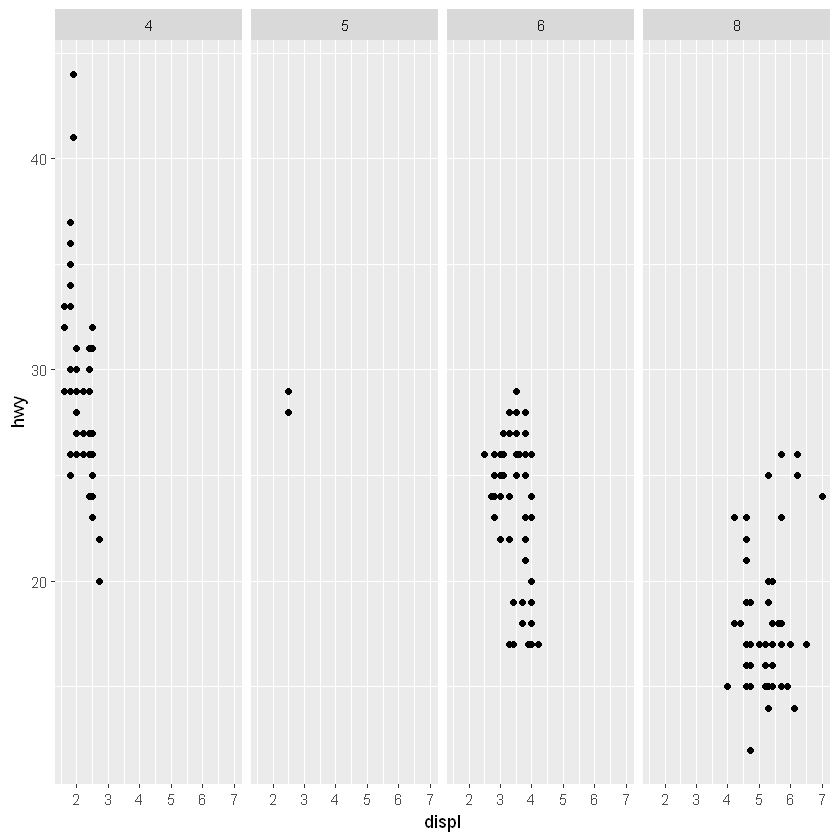

In [178]:
# 横向排列的子面板根据 cyl 分面
p + facet_grid(. ~ cyl)

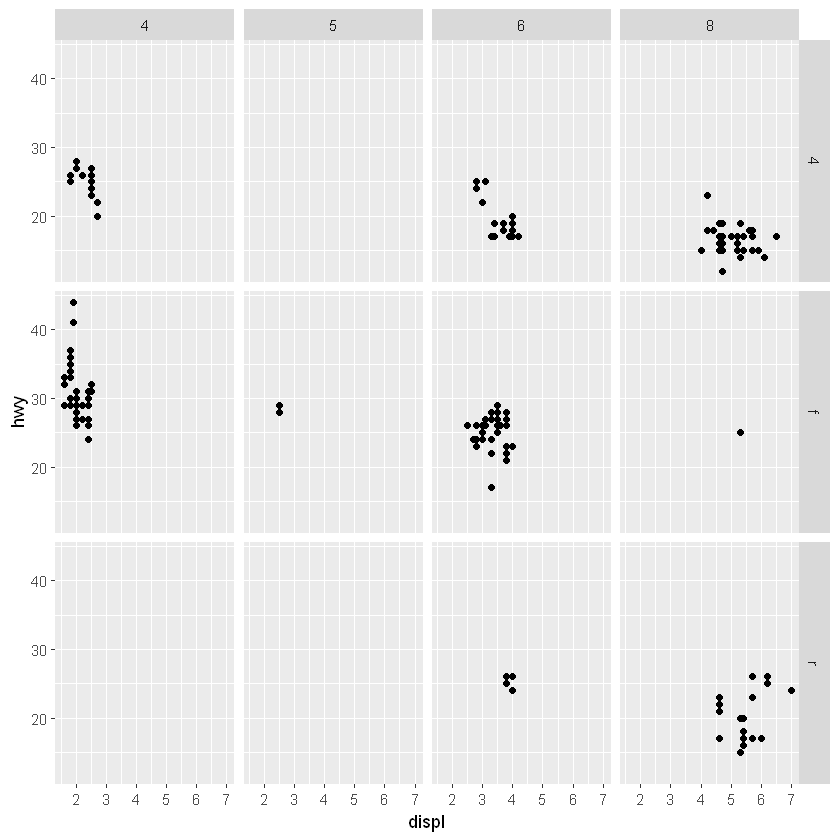

In [179]:
# 同时纵向(drv)和横向(cyl)分割
p + facet_grid(drv ~ cyl)

## 在不同坐标轴下使用分面

将标度设置为 "free_x"、"free_y"、或"free"

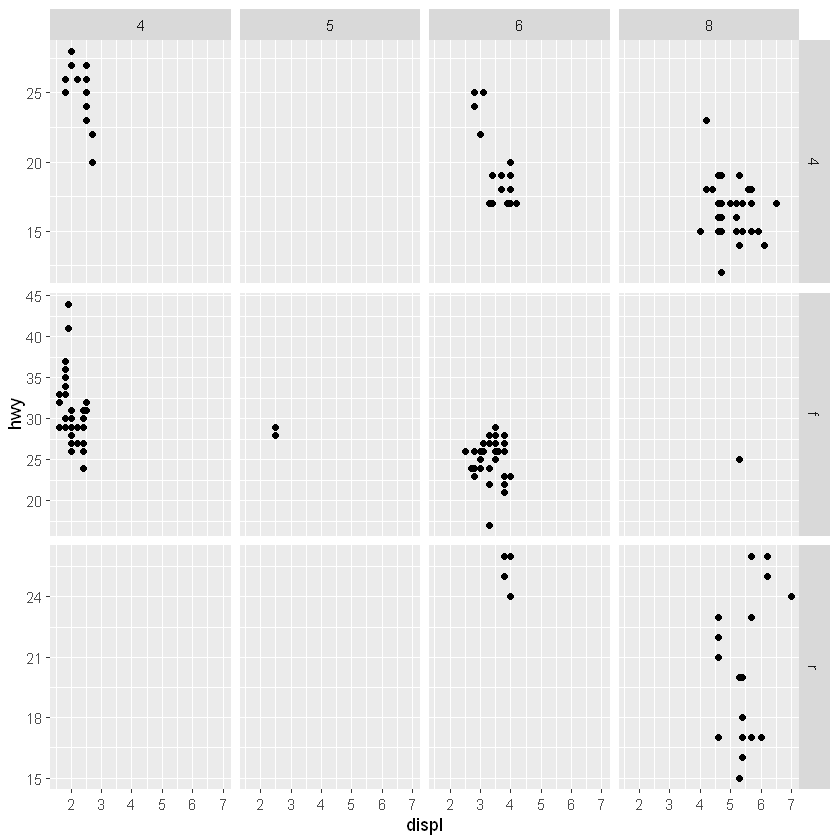

In [180]:
# 使用自由的 y 标度
p + facet_grid(drv ~ cyl, scales = 'free_y')

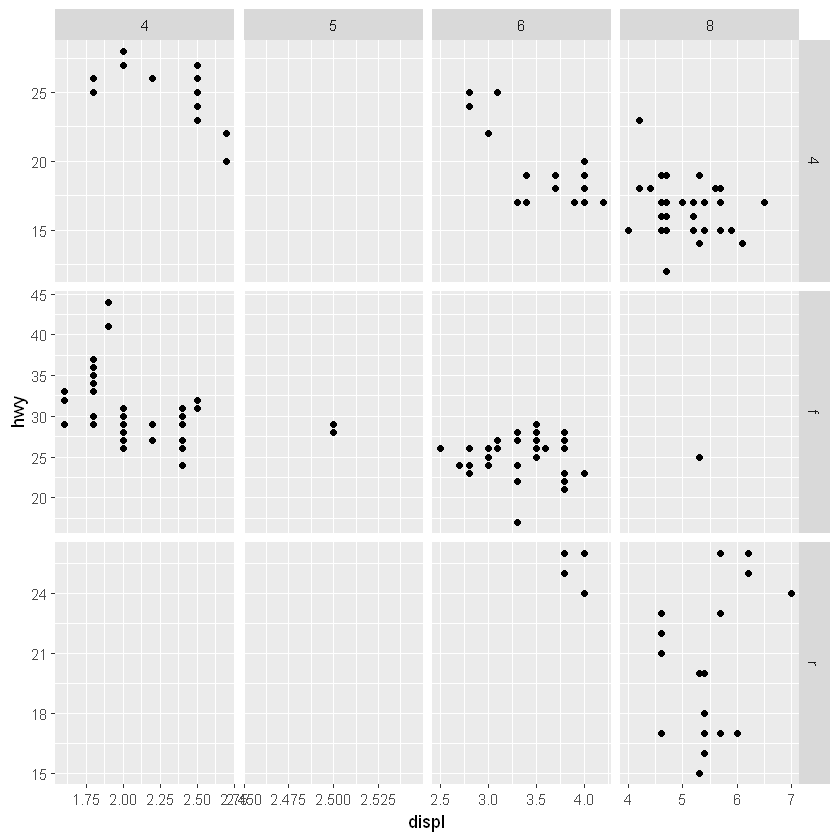

In [181]:
p + facet_grid(drv ~ cyl, scales = 'free')

## 修改分面的文本标签

💡修改因子各水平的名称即可

In [187]:
mpg2 <- mpg

In [192]:
levels(mpg2$drv)[levels(mpg2$drv)=="4"] <- "4wd"
levels(mpg2$drv)[levels(mpg2$drv)=="f"] <- "Font"
levels(mpg2$drv)[levels(mpg2$drv)=="r"] <- "Rear"

In [202]:
levels(mpg$drv)

NULL

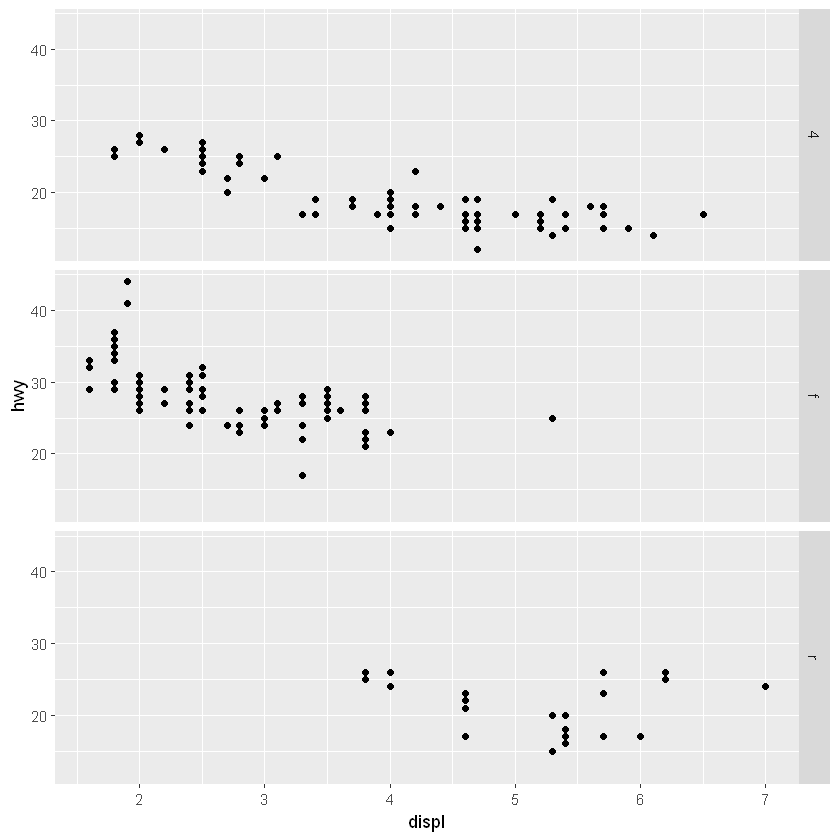

In [193]:
ggplot(mpg2, aes(x=displ, y=hwy)) + geom_point() + facet_grid(drv ~ .)

## 修改分面标签和表标题的外观

使用主题系统，通过设置 `strip.text()` 来控制文本的外观，设置strip.background() 以控制背景的外观：

In [182]:
library(gcookbook)

In [183]:
head(cabbage_exp,2)

,Cultivar,Date,Weight,sd,n,se
,<fct>,<fct>,<dbl>,<dbl>,<int>,<dbl>
1,c39,d16,3.18,0.9566144,10,0.30250803
2,c39,d20,2.80,0.2788867,10,0.08819171


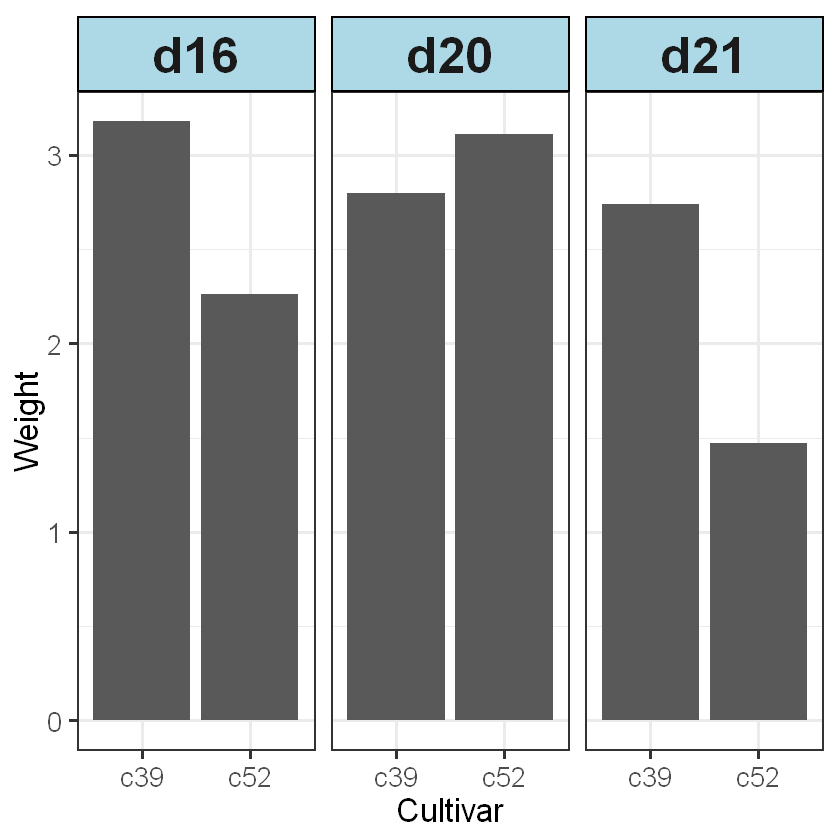

In [186]:
ggplot(cabbage_exp, aes(x=Cultivar, y=Weight)) + geom_bar(stat = 'identity') + 
 facet_grid(. ~ Date) + 
 theme_bw(base_size = 20) + 
 theme(strip.background = element_rect(fill = 'lightblue', color='black', size=1),
       strip.text = element_text(face='bold', size=rel(1.5))
      )

# 第十二章 配色

对于点形来说，大多数点形，整个点的颜色是由 color 控制的，而不是 fill。例外的情况是21-25号点，它们不仅有填充色，也有边界色

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQyGbFLS6kIzEFecRarshBazlmY_FGGN4pX1w&usqp=CAU" width=700 />

函数`scale_fill_hue()`中，颜色来自 HCL 色系（hue-chroma-lightness：色相-色度-亮度）的色轮，默认亮度是54（取值为0~100）

In [13]:
library(gcookbook)

In [14]:
p <- ggplot(data = uspopage, aes(x = Year, y = Thousands, fill = AgeGroup)) + 
 geom_area()

In [4]:
h <- ggplot(heightweight, aes(x=ageYear, y=heightIn, color=sex)) + 
 geom_point()

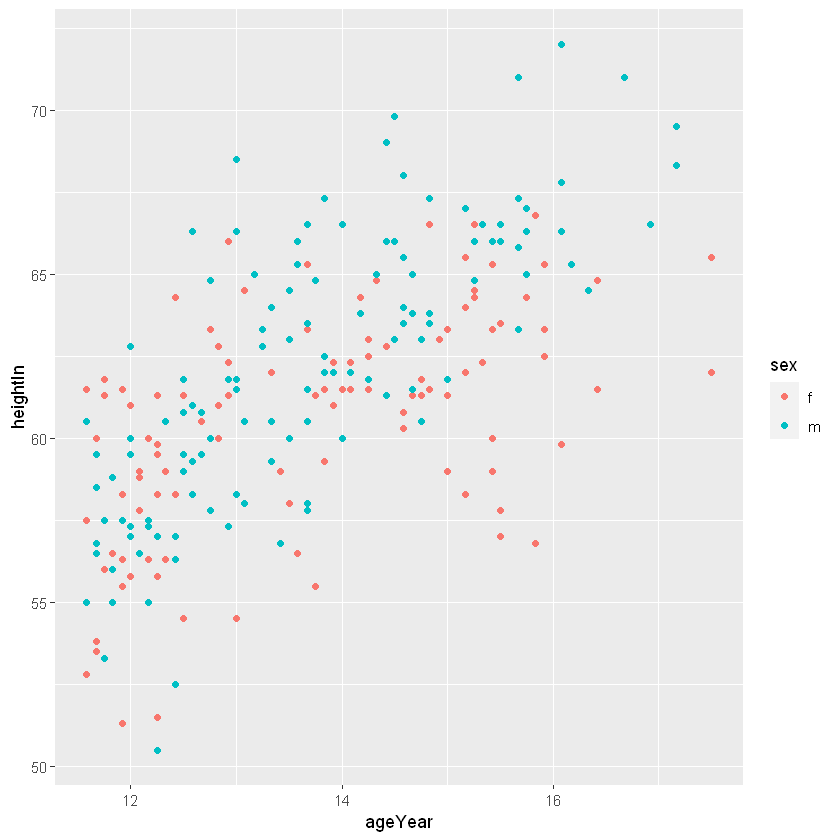

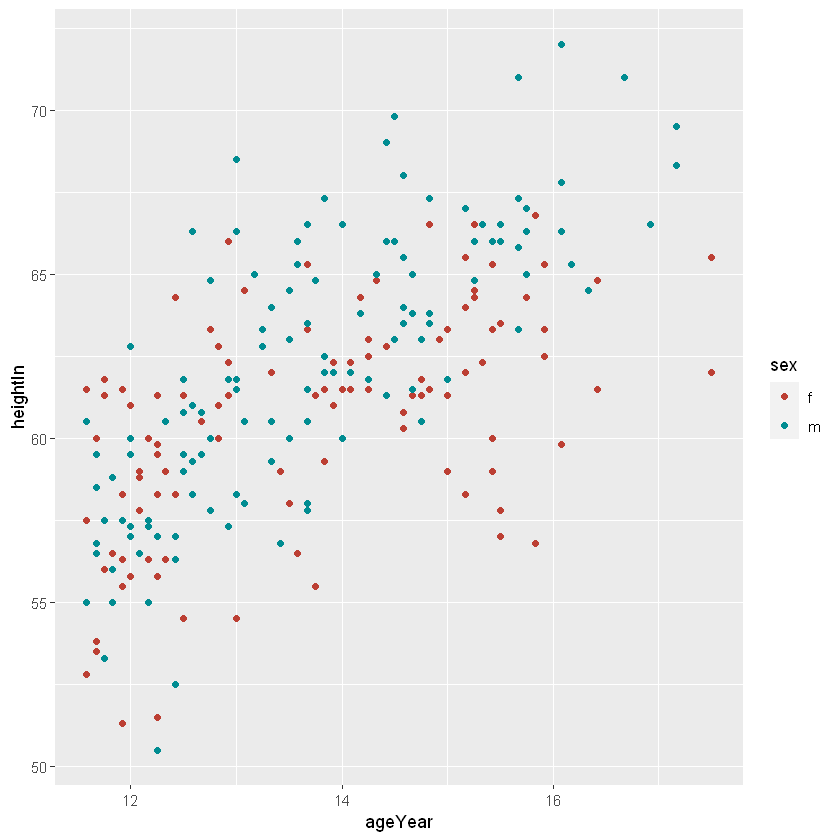

In [6]:
# 默认亮度 65
h

# 略微加深
h + scale_color_hue(l=45)

ColorBrewer包提供了很多调色板，你可以生成一张图来查看该包中的所有调色板：

In [8]:
library(RColorBrewer)

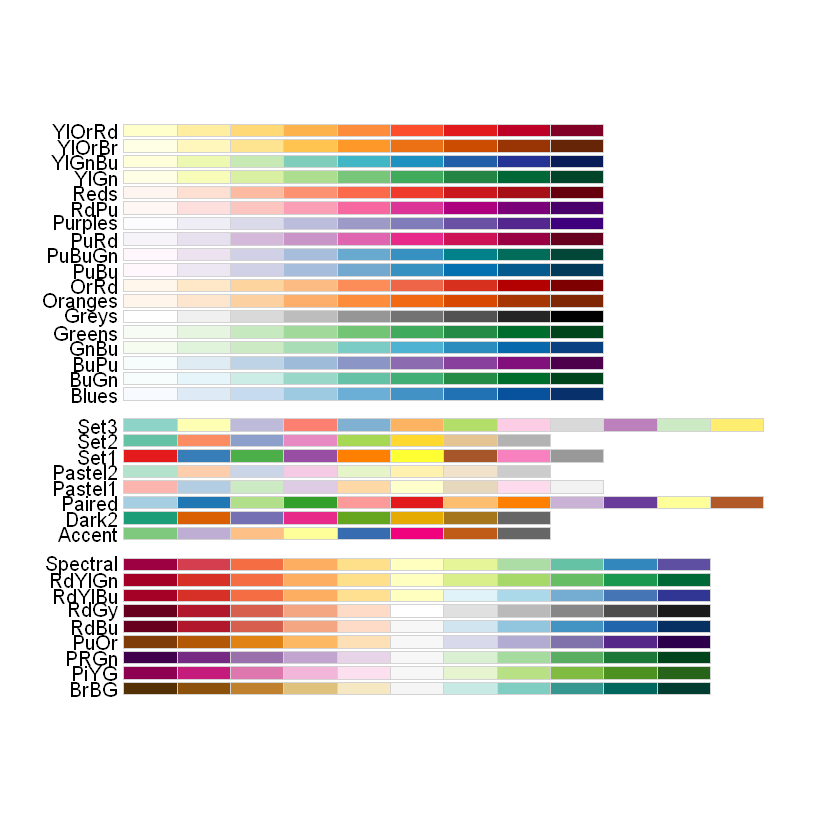

In [10]:
display.brewer.all()

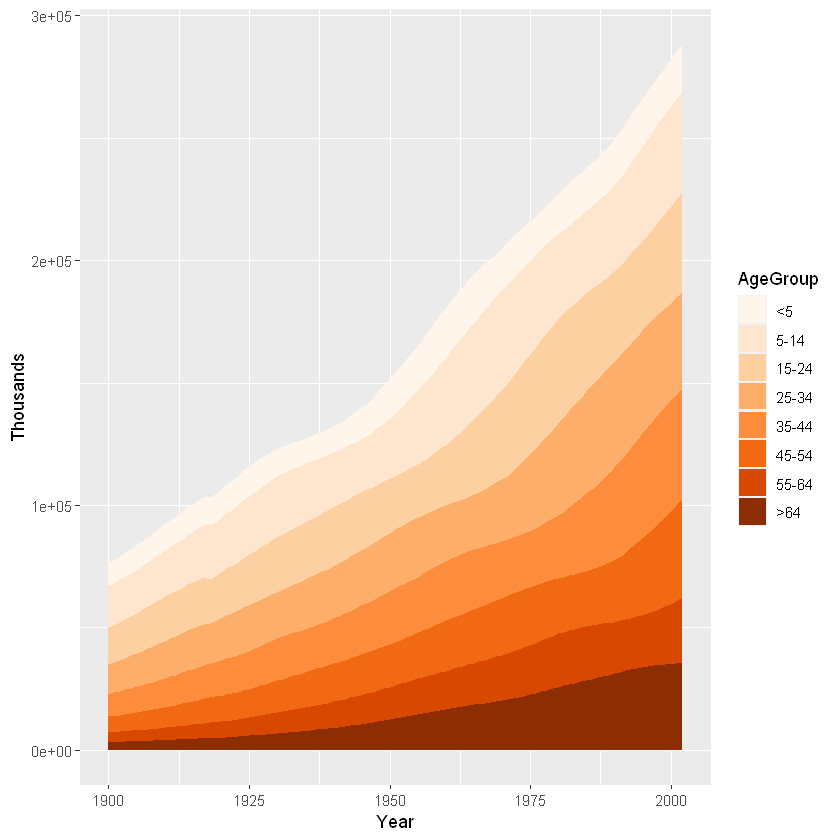

In [23]:
p + scale_fill_brewer(palette = 'Oranges')

你还可以使用灰度调色板，它很适合黑白打印。标度范围是0\~1（其中0对应黑色，1对应白色），灰度调色板的默认范围是0.2\~0.8，但这个可以改。

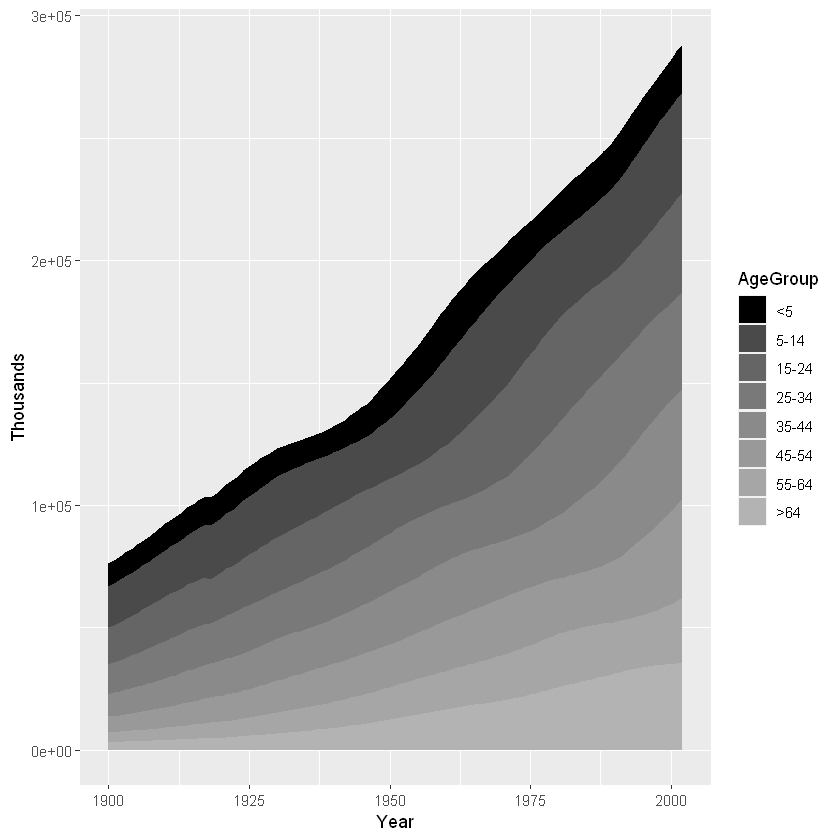

In [20]:
p + scale_fill_grey(start = 0, end = 0.7)

## 对离散型变量使用自定义调色板

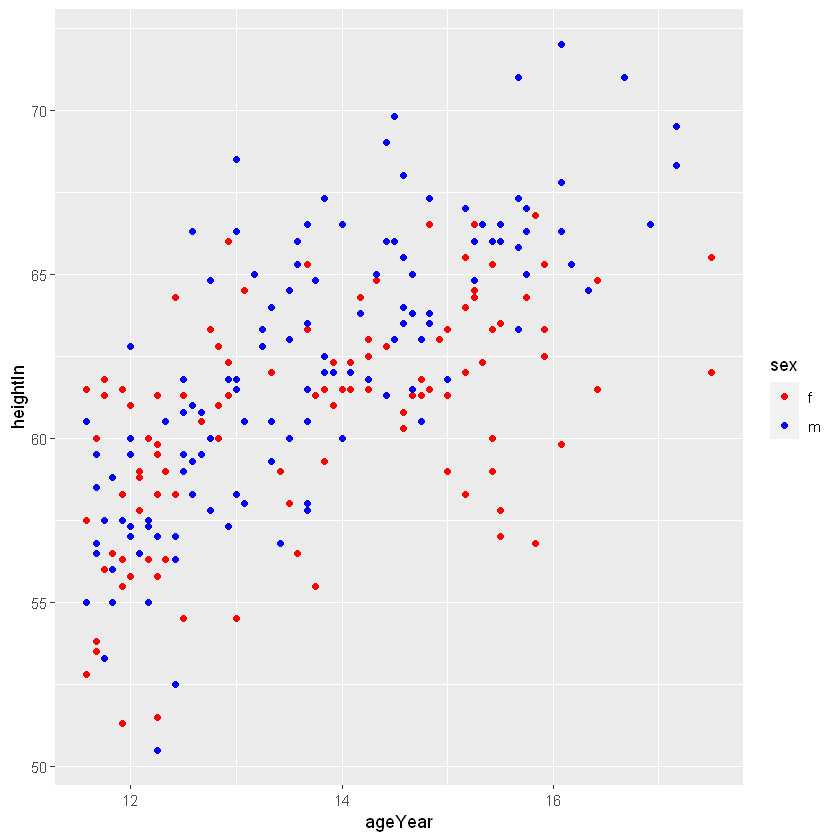

In [26]:
# 使用颜色名
h + scale_color_manual(values = c('red','blue'))

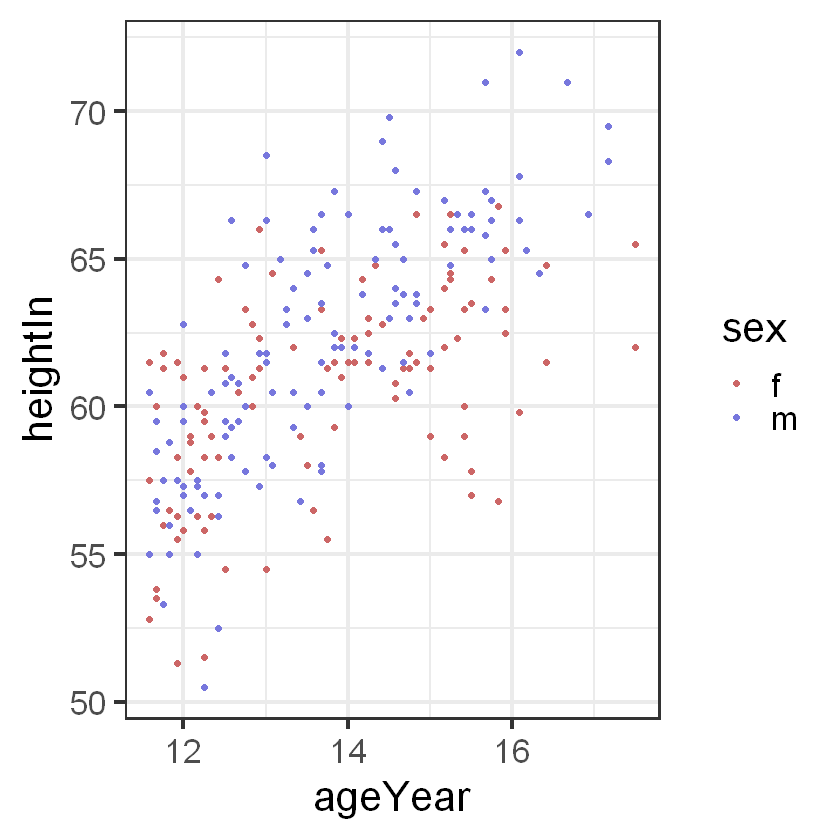

In [28]:
# 使用RGB值
h + theme_bw(base_size = 25) +
 scale_color_manual(values = c('#CC6666','#7777DD'))

💬参数 values 向量中的元素顺序自动匹配离散标度对应因子水平的顺序。  
查看因子顺序的方法：

In [30]:
levels(heightweight$sex)

[1] "f" "m"

如果变量是字符型向量而非因子形式，那么它会被自动转化为因子；顺序也默认地按照字母表排序.

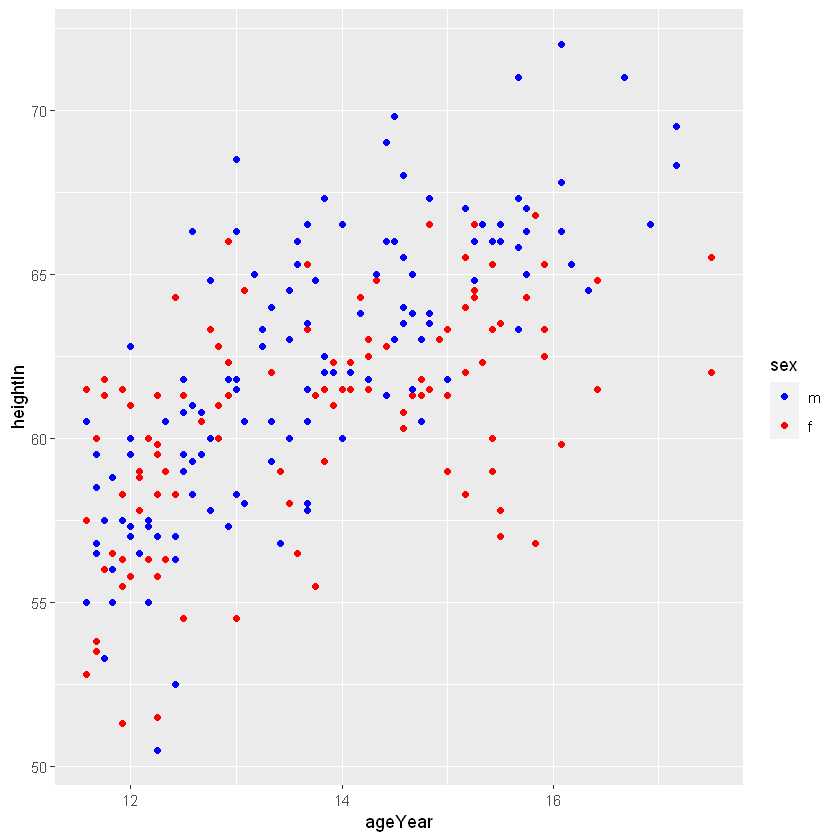

In [31]:
# 自定义颜色分配的顺序
h + scale_color_manual(values = c(m='blue',f='red'))

RGB 颜色由6个数字组成:0-9,A-F(10-15).形如: `#RRGGBB`  
每一个颜色由两个数字来表示,范围从 00 到 FF( 对应十进制中的255 )  
💡十六进制中每个颜色通道常常重复同样的数字,因为这样更容易阅读并且第二个数字的精确值对外观的影响并不是很明显.

这里总结了一些设置RGB颜色的经验:  
- 在一般情况下,更大的数字更明亮,较小的数字更暗淡.
- 如果想得到灰色,将三个颜色通道设置为相同的值.

[RGB颜色十六进制表](https://html-color-codes.com/)

## 对连续型变量使用自定义调色板

对连续型变量自定义渐变式的调色板.颜色可以用已命名的,也可以用RGB值来指定.

In [32]:
library(gcookbook)

In [33]:
# 基础图形
p <- ggplot(heightweight, aes(x=ageYear, y=heightIn, color=weightLb)) + 
 geom_point(size=3)

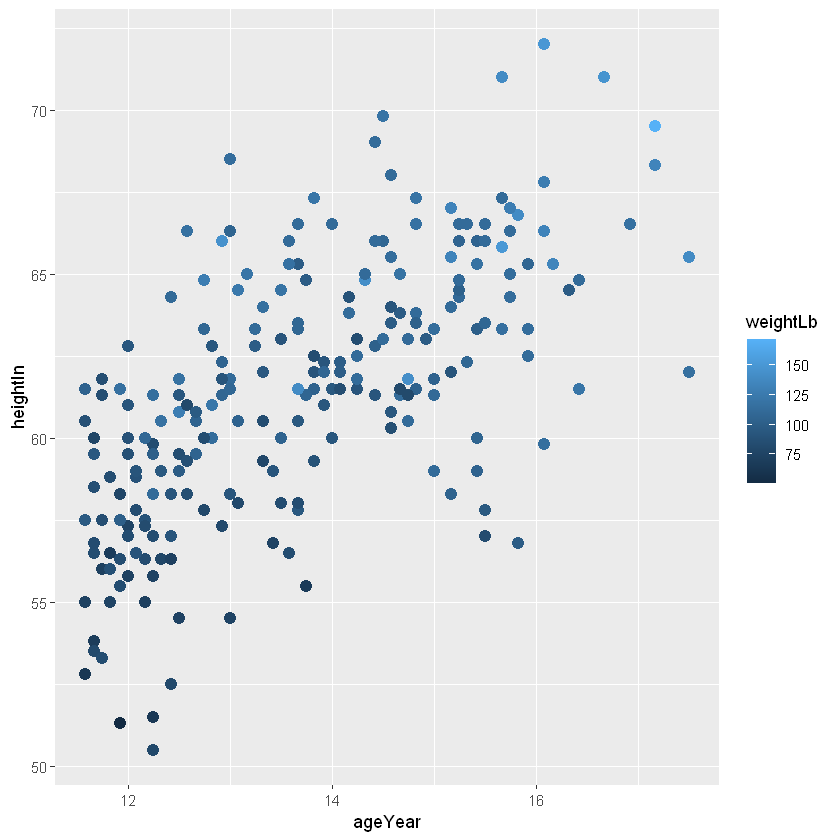

In [35]:
# 默认颜色
p 

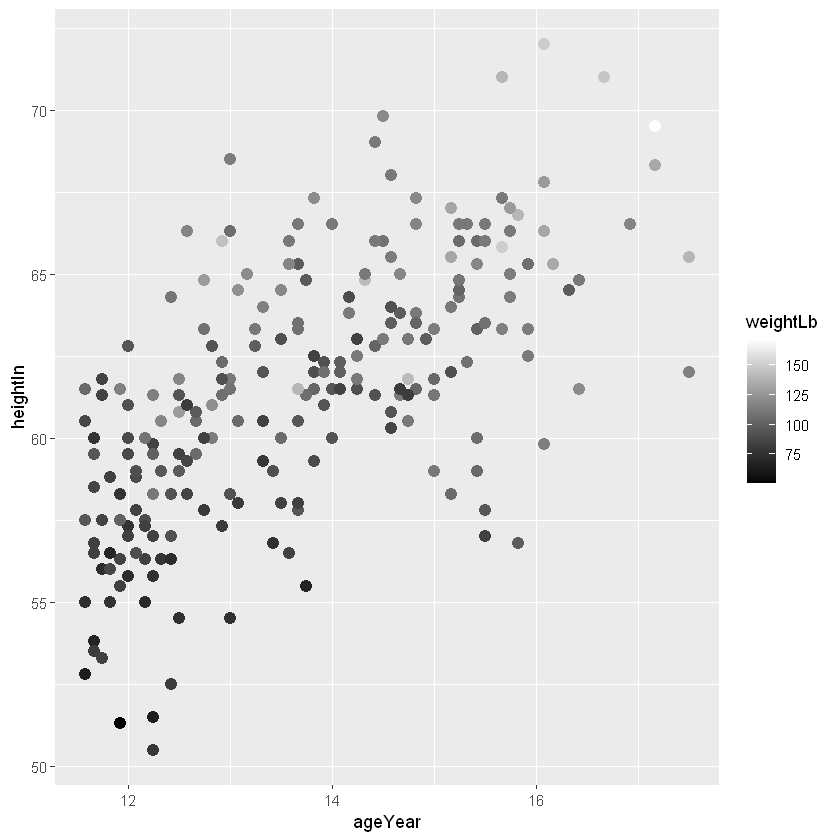

In [36]:
# 使用两种颜色的渐变色
p + scale_color_gradient(low = 'black', high = 'white')

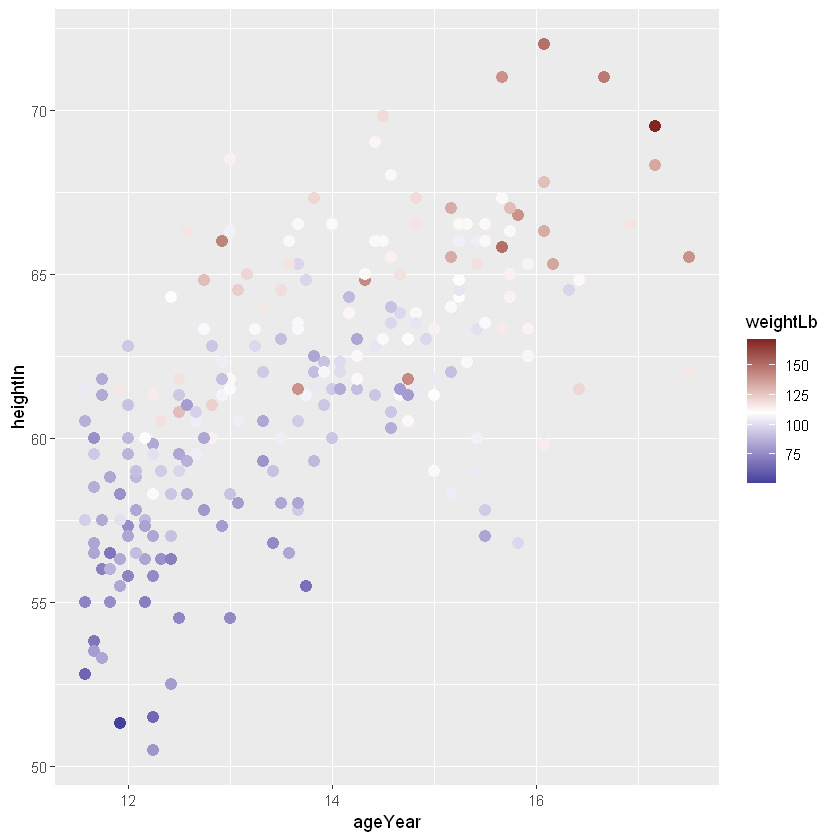

In [45]:
# 渐变色中间用白色划分
library(scales)
# muted, 来自 scales 包: 使标准颜色变得更柔和, 饱和度更低
p + scale_color_gradient2(low = muted('blue'), mid = 'white', high = muted('red'), midpoint = 110)

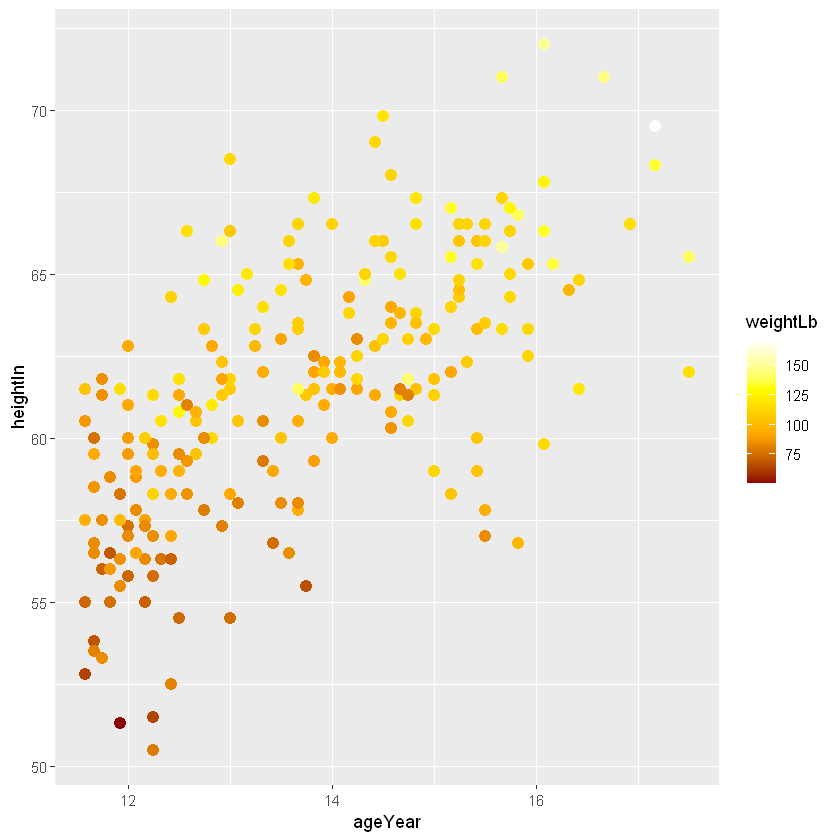

In [44]:
# n个颜色的渐变
p + scale_color_gradientn(colors = c('darkred','orange','yellow','white'))

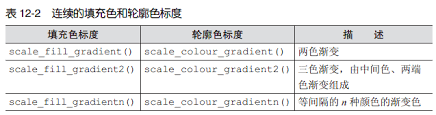

## 根据数值设定阴影颜色

💡增加一列来对y进行划分,然后将该列映射到填充色标度上. 在本例中,首先对数据进行正负划分.

In [161]:
library(gcookbook)

In [162]:
cb<- subset(climate, Source=='Berkeley')

In [163]:
cb$valence[ cb$Anomaly10y >= 0 ] <- 'pos'
cb$valence[ cb$Anomaly10y < 0 ] <- 'neg'

In [164]:
head(cb,2)

,Source,Year,Anomaly1y,Anomaly5y,Anomaly10y,Unc10y,valence
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,Berkeley,1800,NA,NA,-0.435,0.505,neg
2,Berkeley,1801,NA,NA,-0.453,0.493,neg


对数据划分正负之后，就可以将valence变量映射到填充色上来作图了

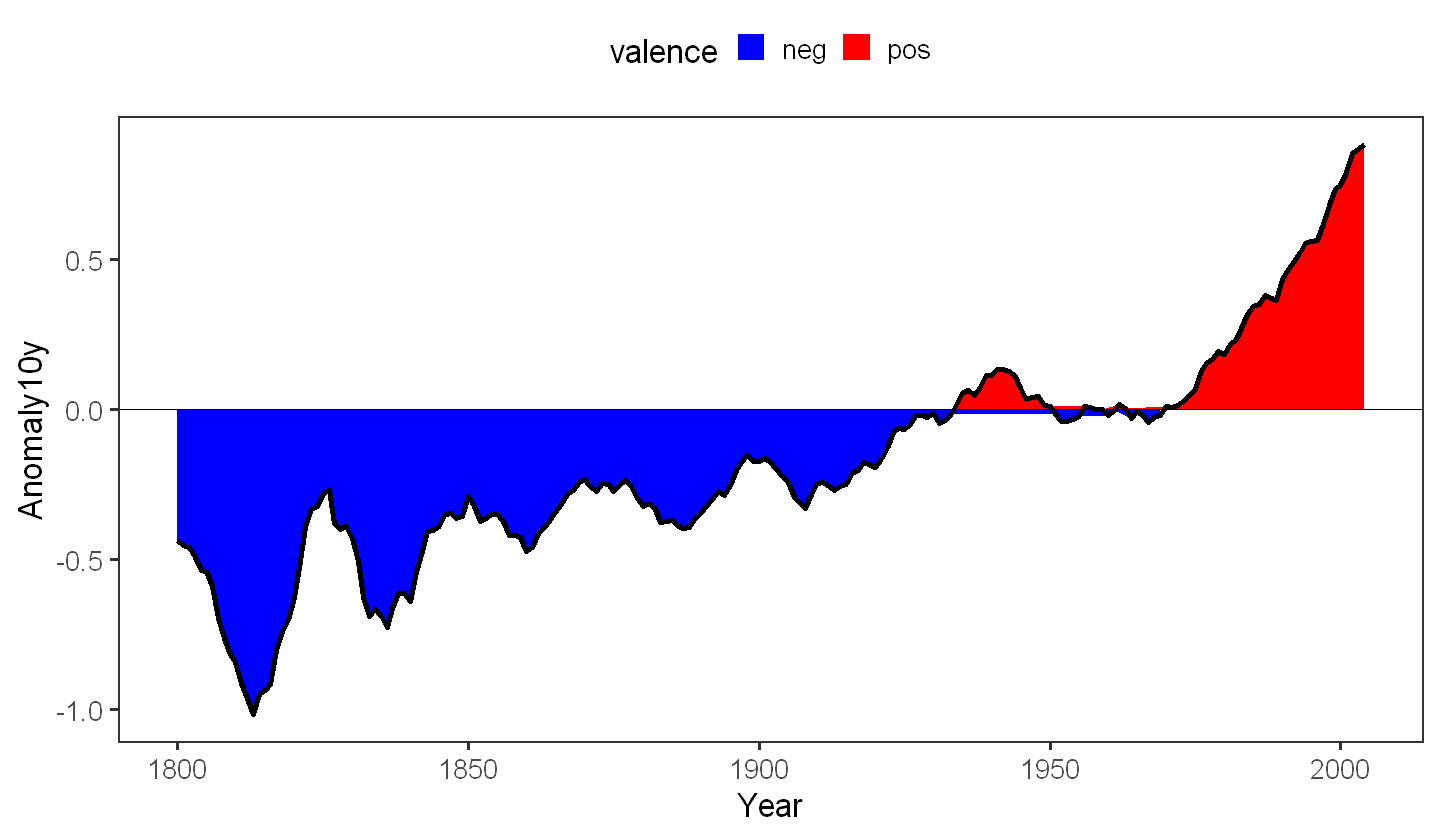

In [188]:
options(repr.plot.width=12)
ggplot(cb, aes(x=Year, y=Anomaly10y)) + 
 geom_area(aes(fill=valence)) + 
 geom_line(size=1.5) + 
 geom_hline(yintercept = 0) + 
 theme_bw(base_size = 20) + 
 theme(panel.grid = element_blank(),
       legend.position = 'top') + 
 scale_fill_manual(values = c('neg'='blue','pos'='red'))

如果你仔细观察此图，会发现在0水平线附近有一些凌乱的阴影。这是因为两个颜色区域都是各自的数据点多边形包围形成的，而这些数据点并不都在0上。  
为了解决这个问题，可以用approx()将数据插值到1000个点左右。

In [172]:
# approx() 返回一个列表，包含 x 和 y向量
interp <- approx(cb$Year, cb$Anomaly10y, n = 1000)

In [176]:
# 放在数据框中，并重新计算valence
cbi <- data.frame(Year=interp$x, Anomaly10y=interp$y) 
cbi$valence[ cbi$Anomaly10y >=0 ] <- 'pos'
cbi$valence[ cbi$Anomaly10y <0 ] <- 'neg'

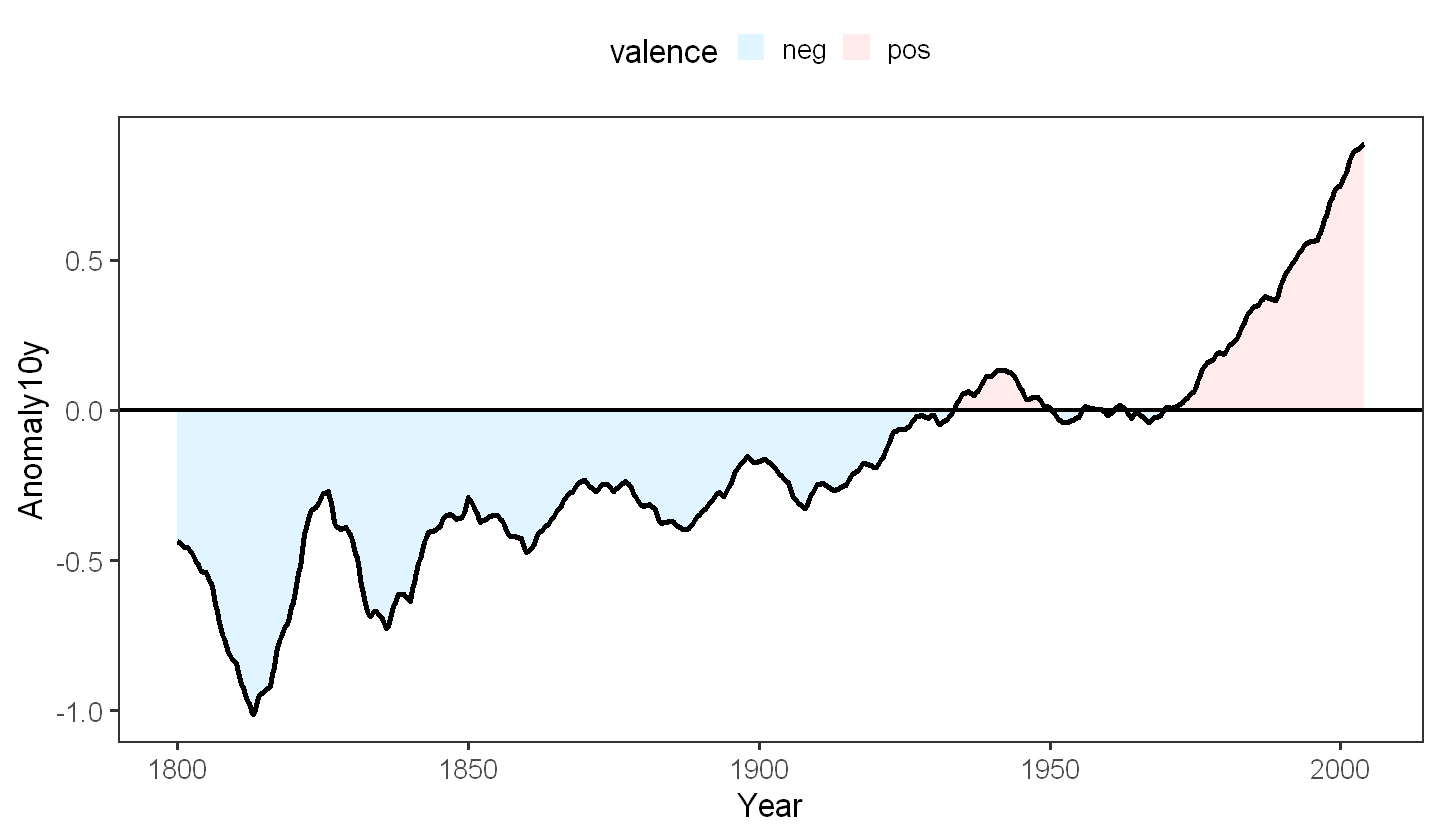

In [189]:
options(repr.plot.width=12)
ggplot(cbi, aes(x=Year, y=Anomaly10y)) + 
 geom_area(aes(fill=valence), alpha=0.6) + 
 geom_line(size=1.5) + 
 geom_hline(yintercept = 0,size=1.2) + 
 theme_bw(base_size = 20) + 
 theme(panel.grid = element_blank(),
       legend.position = 'top') + 
 scale_fill_manual(values = c('neg'='#CCEEFF','pos'='#FFDDDD'))

# 第十三章 其他图形

## 绘制相关矩阵图

In [23]:
head(mtcars,3)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1


首先，使用cor函数计算相关矩阵，将会得到每两列之间的相关系数：

In [24]:
mcor <- cor(mtcars)

In [25]:
# 输出 mcor，保留两位小数
round(mcor, digits = 2)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.00,-0.85,-0.85,-0.78,0.68,-0.87,0.42,0.66,0.60,0.48,-0.55
cyl,-0.85,1.00,0.90,0.83,-0.70,0.78,-0.59,-0.81,-0.52,-0.49,0.53
disp,-0.85,0.90,1.00,0.79,-0.71,0.89,-0.43,-0.71,-0.59,-0.56,0.39
hp,-0.78,0.83,0.79,1.00,-0.45,0.66,-0.71,-0.72,-0.24,-0.13,0.75
drat,0.68,-0.70,-0.71,-0.45,1.00,-0.71,0.09,0.44,0.71,0.70,-0.09
wt,-0.87,0.78,0.89,0.66,-0.71,1.00,-0.17,-0.55,-0.69,-0.58,0.43
qsec,0.42,-0.59,-0.43,-0.71,0.09,-0.17,1.00,0.74,-0.23,-0.21,-0.66
vs,0.66,-0.81,-0.71,-0.72,0.44,-0.55,0.74,1.00,0.17,0.21,-0.57
am,0.60,-0.52,-0.59,-0.24,0.71,-0.69,-0.23,0.17,1.00,0.79,0.06
gear,0.48,-0.49,-0.56,-0.13,0.70,-0.58,-0.21,0.21,0.79,1.00,0.27


如果数据含有不能用来计算系数的任何列（比如一列姓名），应该先将这些列剔除。如果在原始数据中存在缺失值（NA），得到的相关矩阵也会有缺失值。为了克服这个问题，可以使用函数选项use="complete.obs"或者use="pairwise.complete.obs"。

使用corrplot包来绘制相关矩阵图。

In [3]:
library(corrplot)

Warning message:
"package 'corrplot' was built under R version 4.0.5"
corrplot 0.89 loaded



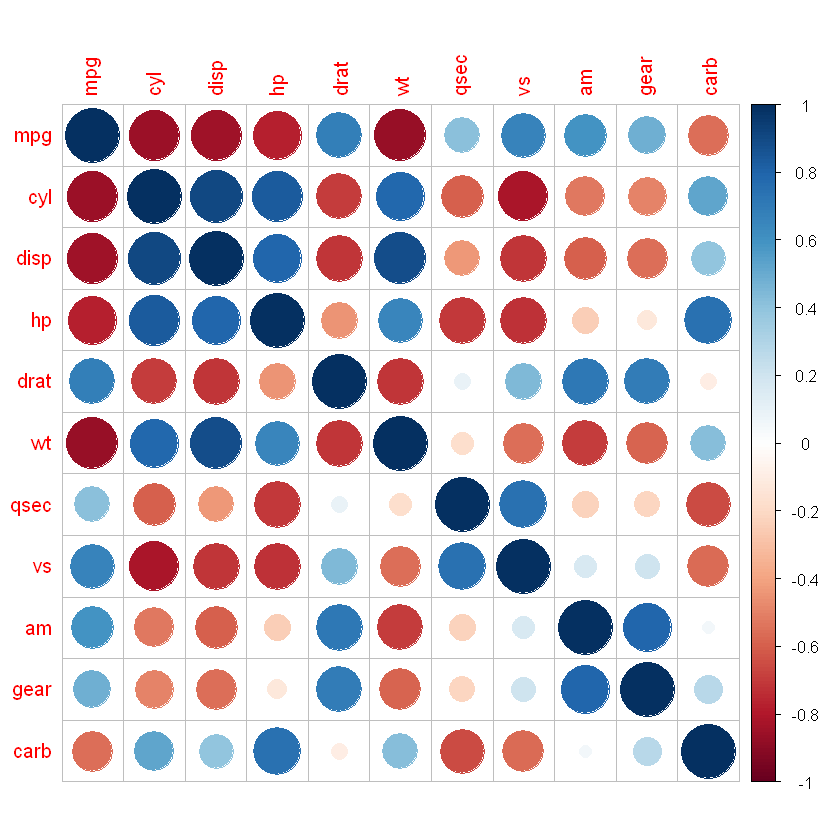

In [27]:
corrplot(mcor)

💬**讨论**  
`corrplot()`函数有相当多的选项。这里给出一个绘制相关矩阵图的例子，例图使用颜色方块和黑色文本标签，并且上边的文本标签呈45°右倾。

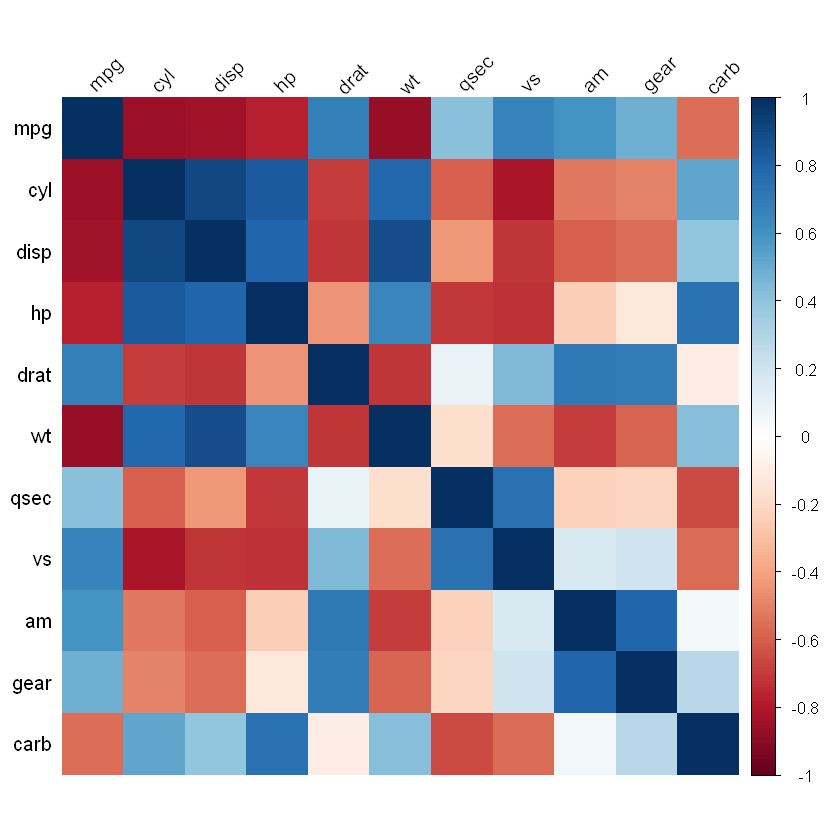

In [28]:
corrplot(mcor, method = "shade", shade.col = NA, tl.col = "black", tl.srt = 45)

将相关系数展示在矩阵的每一个小方块上，同时调淡一点调色板，会使系数更加可读；同时，移除多余的颜色图例。此外，对矩阵重新排序，使得相近的变量在图中更近。其中使用的参数是order="AOE"（前两个特征向量的角排序）。

ERROR: Error in colorlegend(colbar = colbar, labels = round(labels, 2), offset = cl.offset, : 找不到对象'vertical'


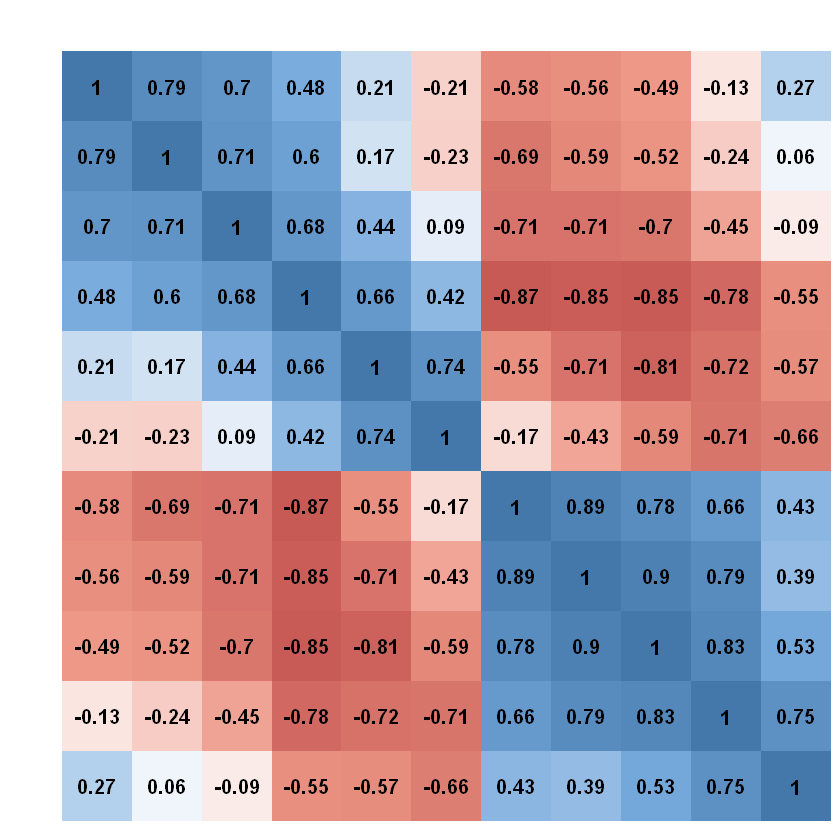

In [30]:
col <- colorRampPalette(c("#BB4444", "#EE9988", "#FFFFFF", "#77AADD", "#4477AA"))

corrplot(mcor, method = "shade", shade.col = NA, tl.col = "black", tl.srt = 45,
        col=col(200), addCoef.col="black", cl.pos = "no", order="AOE")

和其他独立的绘图函数一样，corrplot()有很多自己的选项。这里列出一些最有用的选项。  

`type = c("full", "lower", "upper")`全部，仅使用下三角或上三角  
`diag = TRUE`是否显示对角线上的数值  
`method = "shade"`  使用颜色方块图形  
`method = "ellipse"`使用椭圆图形  
`addCoef.col="color"`  在图形上添加相关系数的颜色  
`tl.srt = number`设定图形上方文本标签的倾斜角度  
`tl.col = "color"`设定文本标签颜色  
`order = c("AOE", "FPC", "hclust")`矩阵重排序，使用特征值角排序、第一主成分或层次聚类

## 绘制函数曲线

使用`stat_function()`函数。为了得到合适的x的范围，必须给`ggplot()`函数传递一个“哑”数据集。在本例中，使用正态分布的密度函数`dnorm()`来演示。

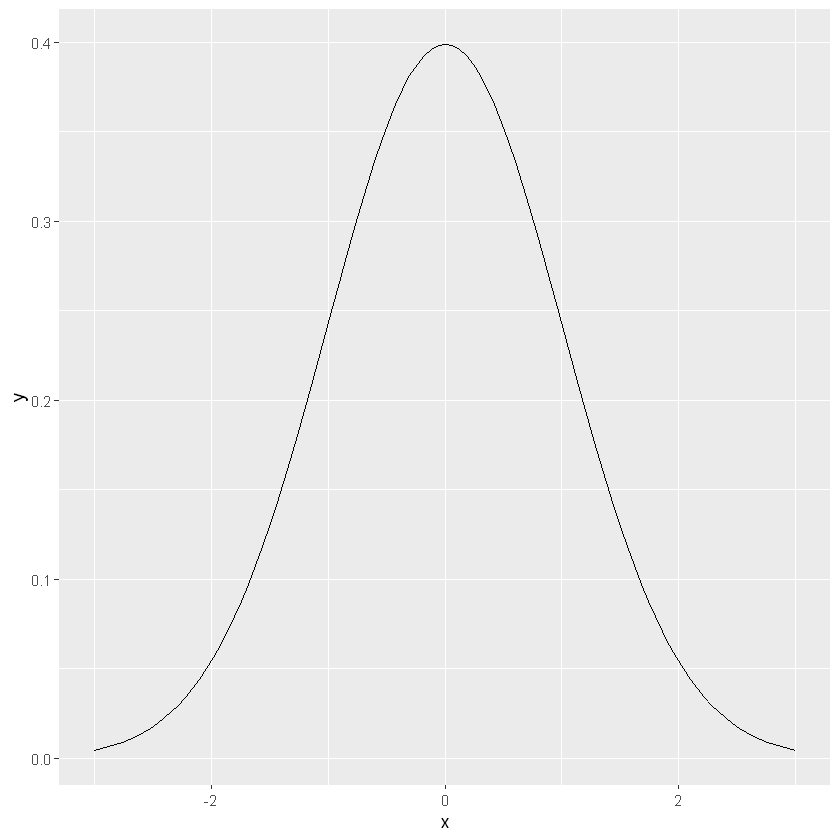

In [5]:
p <- ggplot(data.frame(x=c(-3,3)), aes(x=x))

p + stat_function(fun = dnorm)

某些函数需要设定额外的参数，比如t分布的密度函数`dt()`就需要一个参数来设定自由度。可以这样来设定额外的参数：把参数放到一个列表中，再传给 args 参数

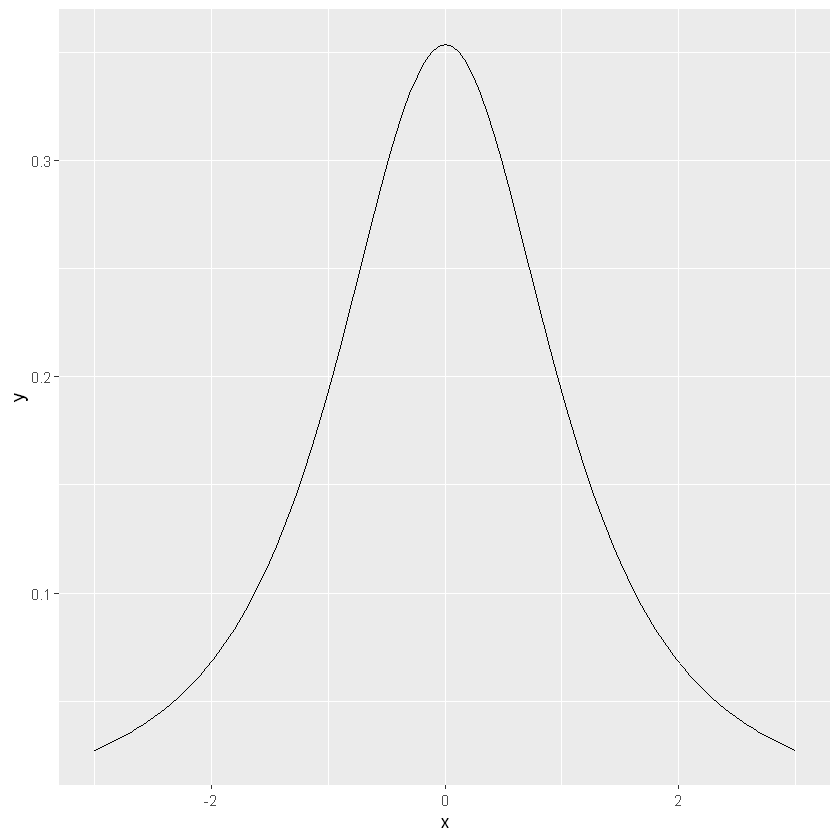

In [6]:
p + stat_function(fun = dt, args = list(df=2))

也可以绘制自定义的函数。其中第一个参数必须是x轴的值，并且必须返回y轴的值。

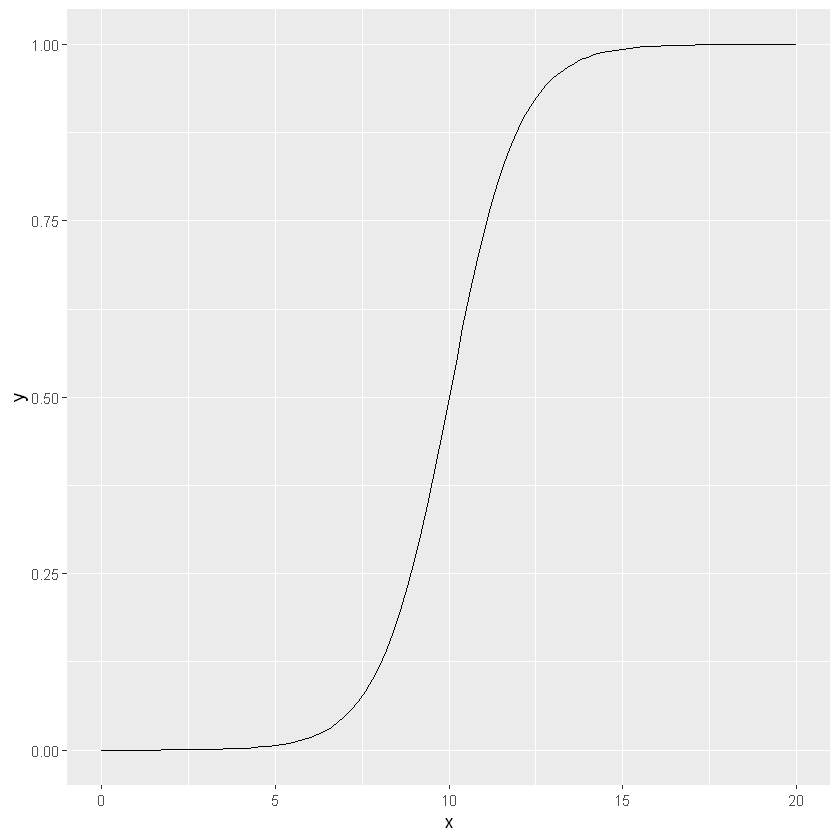

In [9]:
myfun <- function(xvar) {
    1 / (1 + exp(-xvar + 10))
}

ggplot(data.frame(x=c(0,20)), aes(x=x))  + stat_function(fun=myfun)

计算函数值时默认使用给出的x范围内的101个点。想增加点数，使得曲线更平滑，可以给`stat_function()`传递一个更大的n，比如`stat_function(fun=myfun, n=200)`

## 在函数曲线下添加阴影

根据你的曲线函数定义一个新的函数。

## 如何绘制热图

使用`geom_title()`或者`geom_raster()`，并将一个连续变量映射到fill上。

In [14]:
presidents
# 时间序列对象 而不是数据框

,Qtr1,Qtr2,Qtr3,Qtr4
1945,NA,87,82,75
1946,63,50,43,32
1947,35,60,54,55
1948,36,39,NA,NA
1949,69,57,57,51
1950,45,37,46,39
1951,36,24,32,23
1952,25,32,NA,32
1953,59,74,75,60
1954,71,61,71,57


In [15]:
str(presidents)

 Time-Series [1:120] from 1945 to 1975: NA 87 82 75 63 50 43 32 35 60 ...


首先将它转化为`ggplot()`可用的数据框格式，其中的列都是数值形式的。

In [2]:
pres_rating <- data.frame(
    rating  = as.numeric(presidents),
    year    = as.numeric(floor(time(presidents))),
    quarter = as.numeric(cycle(presidents))
)

pres_rating

rating,year,quarter
<dbl>,<dbl>,<dbl>
NA,1945,1
87,1945,2
82,1945,3
75,1945,4
63,1946,1
50,1946,2
43,1946,3
32,1946,4
35,1947,1


现在我们可以使用`geom_title()`或`gem_raster()`来绘图。简单地将几个变量分别映射到x, y 和 fill：

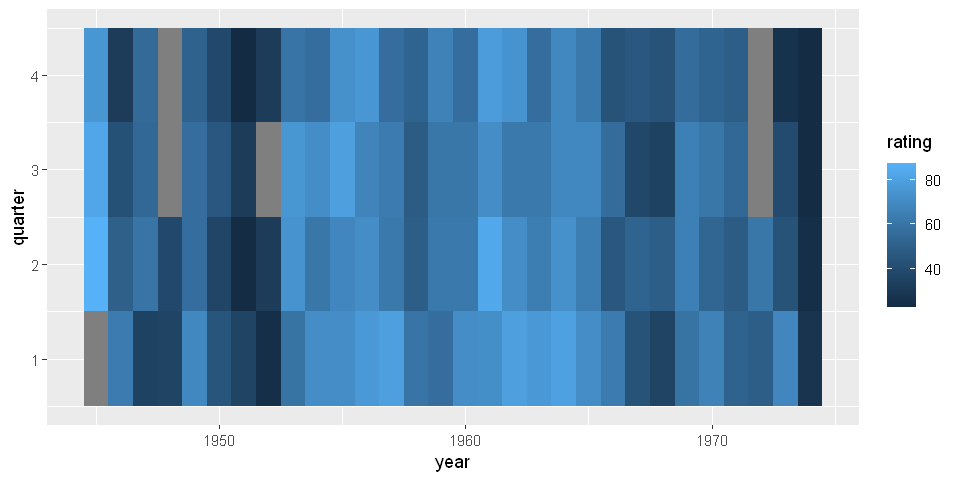

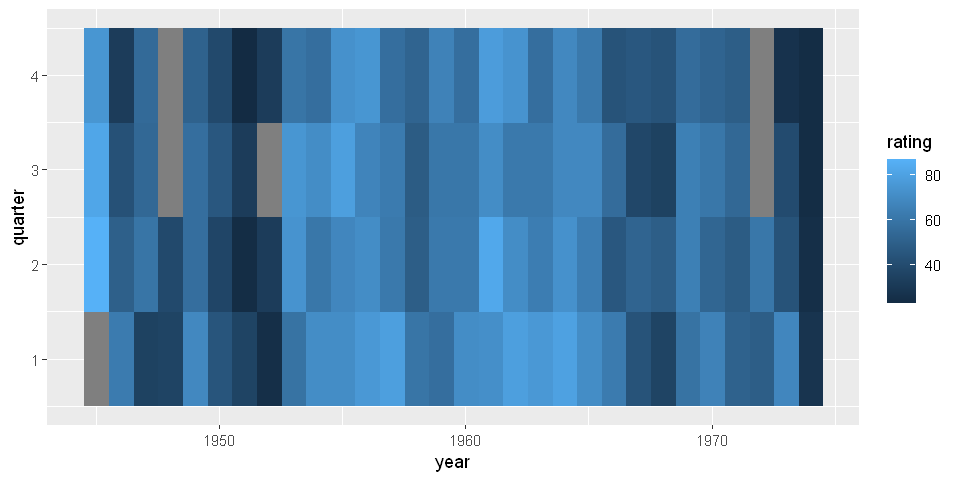

In [5]:
options(repr.plot.height=4 ,repr.plot.width=8)
# 基础图形
p <- ggplot(pres_rating, aes(x=year, y=quarter, fill=rating))

# 使用geom_title()
p + geom_tile()

# 使用 geom_raster()看起来一样，但效率略低
p + geom_raster()

为了更有效地表达信息，可能需要自定义热图地外观。在本例中，倒转y轴，这样顺序就是从上到下，并且在x轴上，每隔4年添加一个坐标刻度来表示一个总统任期。此外，更换之前的颜色标度，使用scale_fill_graadient2()调色盘，该调色盘可以设置一个中点和两个端点的色彩值：

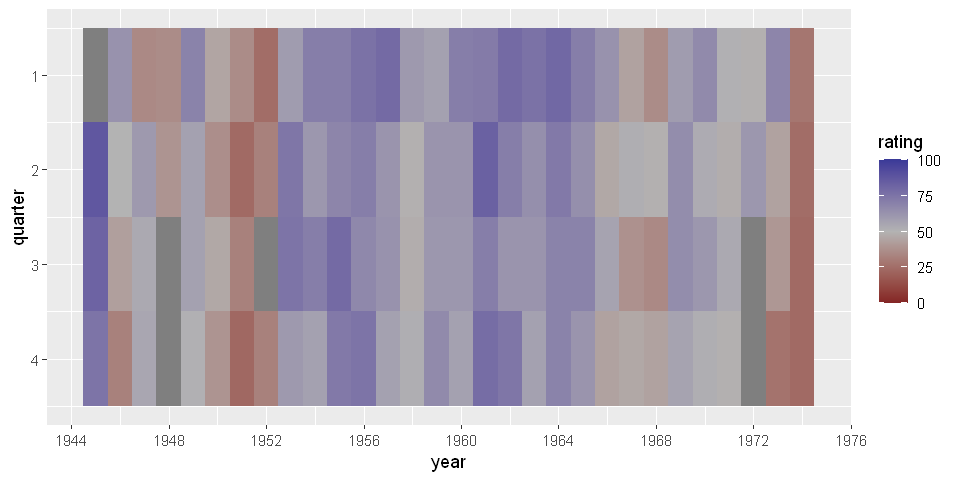

In [8]:
p + geom_tile() + 
 scale_x_continuous(breaks = seq(1940, 1976, by=4)) +
 scale_y_reverse() + 
 scale_fill_gradient2(midpoint = 50, mid = 'grey70', limits=c(0,100))

## 绘制三维散点图

使用rgl包，该包提供了OpenGL图形库的3D绘图接口。要画三维散点图，可以使用`plot3d()`函数。其输入参数可以是两种形式：（1）一个数据框，前三列分别表示x、y、z；（2）直接传递三个向量，分别表示x、y、z的坐标。

In [3]:
library(rgl)

Warning message:
"package 'rgl' was built under R version 4.0.5"


In [4]:
plot3d(mtcars$wt, mtcars$disp, mtcars$mpg, type="s", size=.75, lit=FALSE)

## 绘制QQ图

❓如何绘制QQ图来比较经验分布和理论分布？  

💡使用`qqnorm()`和正态分布比较。给`qqnorm()`一个数值向量，在此基础上用`qqline()`加上理论分布。

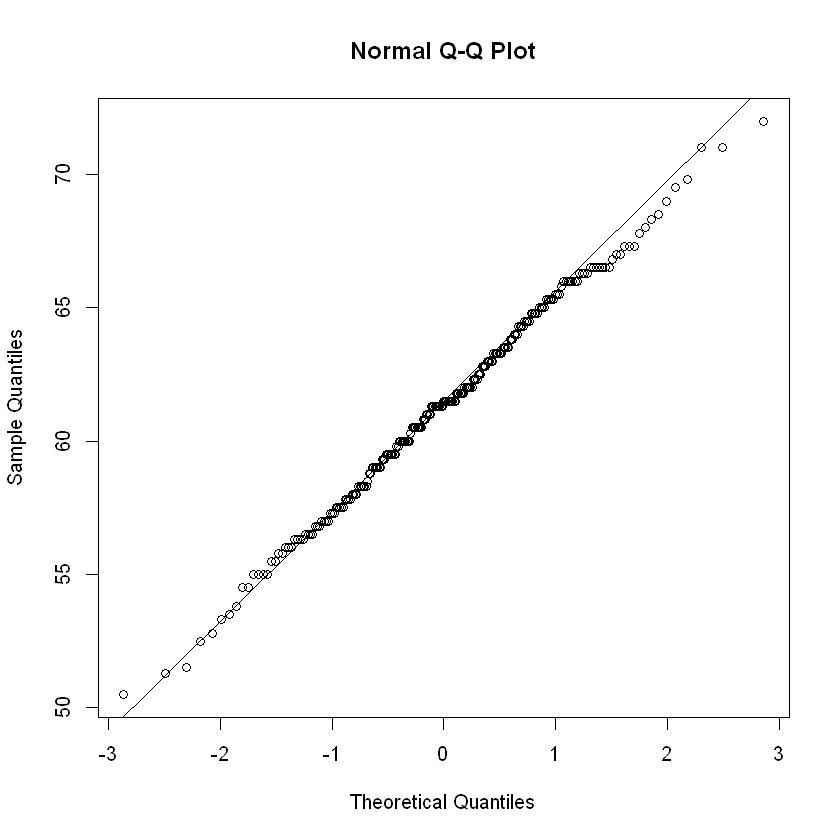

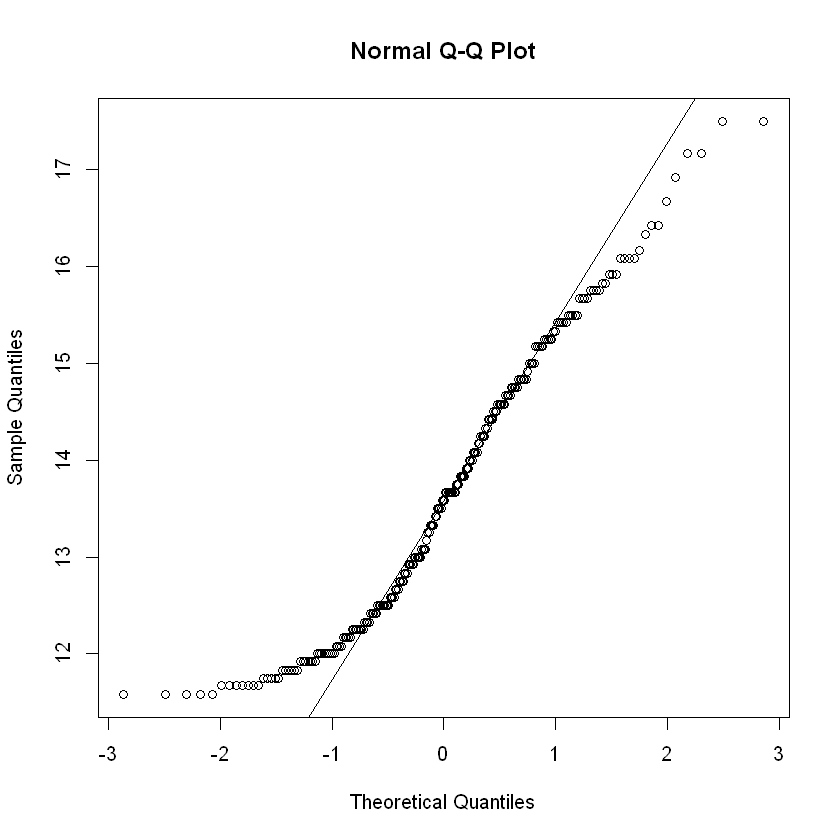

In [4]:
# height的QQ图
qqnorm(heightweight$heightIn)
qqline(heightweight$heightIn)

# age的QQ图
qqnorm(heightweight$ageYear)
qqline(heightweight$ageYear)

heightIn 的 点很接近理论线，这意味着它的分布很接近正态分布。相反，ageYear的点远离理论线，特别是在左面，这表明是有偏离的。此外，直方图在探索数据的分布上也是有帮助的。

## 绘制经验累积分布函数

❓如何画一个数据集的经验累积分布函数图（ECDF）?  
💡使用stat_ecdf():

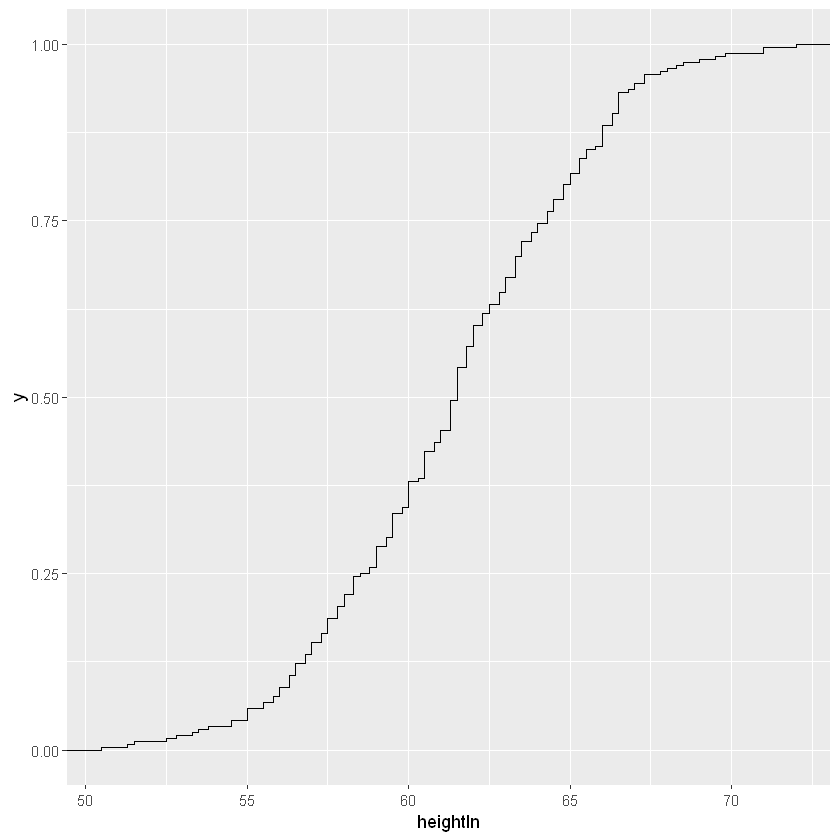

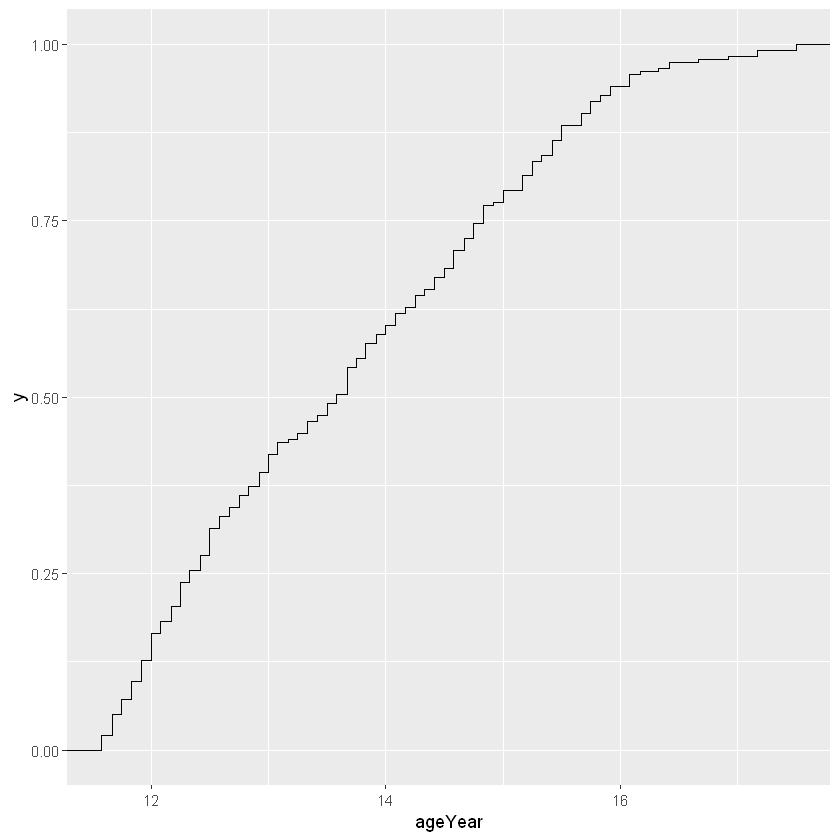

In [5]:
# heightIn 的 ecdf
ggplot(heightweight, aes(x=heightIn)) + stat_ecdf()

# ageYear的 ecdf
ggplot(heightweight, aes(x=ageYear)) + stat_ecdf()

ecdf表明了在观测数据中，小于或等于给定x值的观测所占的比例。因为是经验的，所以累积分布线在每个有观测值的x值处产生一个阶梯。

# 第十四章 输出图形用以展示

## 输出为PDF矢量文件

最常用的方法是使用 `pdf()`打开PDF图形设备，绘制图形，然后使用`dev.off()`关闭图形设备。

In [7]:
# width 和 height 的单位是 英寸： 1cm = 2.54英寸
pdf('myplot.pdf', width=4, height=4)

# 绘制图形
plot(mtcars$wt, mtcars$mpg)
print(ggplot(mtcars, aes(x=wt, y=mpg)) + geom_point())

dev.off()

png 
  2

如果绘制的图形多于一副，则每一页将在PDF输出中列于独立的一页。  
❗注意，使用`print()`，确保即使是一段脚本也能输出图形。

如果在创建图形过程中抛出一个错误，R无法执行到`dev.off()`这一步调用，并可能停留在PDF设备仍然开启的状态。当这种情况发生时，直到手动调用`dev.off()`之前，PDF文件将无法正常打开。

用ggplot创建图形，使用ggsave()会简单一点，但它只会保存最后一幅图形。

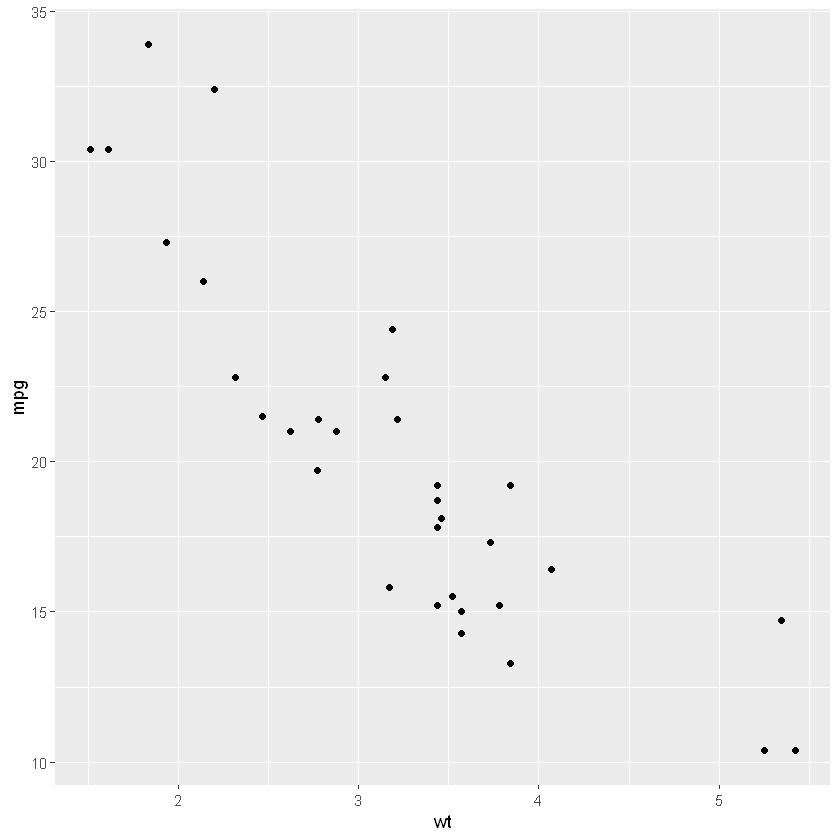

In [8]:
ggplot(mtcars, aes(x=wt, y=mpg)) + geom_point()

# 默认为英寸单位，不过也可指定
ggsave('myplot-ggsave.pdf', width = 8, height = 8, units = 'cm')

## 在PDF文件中使用字体

如何在PDF文件中使用由R提供的基本字体以外的字体？

💡 extrafont包可用于创建包含其他字体的PDF文件。  
需要一次性的软件安装和配置。   
下载并安装Ghostscript，然后再R中执行以下命令。  

In [ ]:
install.packages('extrafont')
library(extrafont)

# 查找并保存系统中已安装字体的信息
font_import()

# 列出字体
fonts()

# 第十五章 数据塑形

R中数据集常以数据框的形式存在。它们都是典型的二维数据结构，每行代表一个具体对象（case,object），每行代表一个描述对象的变量。  
数据框本质上是由向量和因子组成的列表，其中每个向量或者因子代表了数据的一列。

In [1]:
library(gcookbook)

Warning message:
"package 'gcookbook' was built under R version 4.0.3"


In [2]:
head(heightweight,2)

,sex,ageYear,ageMonth,heightIn,weightLb
,<fct>,<dbl>,<int>,<dbl>,<dbl>
1,f,11.92,143,56.3,85
2,f,12.92,155,62.3,105


使用`str()`函数了解数据结构

In [3]:
str(heightweight)

'data.frame':	236 obs. of  5 variables:
 $ sex     : Factor w/ 2 levels "f","m": 1 1 1 1 1 1 1 1 1 1 ...
 $ ageYear : num  11.9 12.9 12.8 13.4 15.9 ...
 $ ageMonth: int  143 155 153 161 191 171 185 142 160 140 ...
 $ heightIn: num  56.3 62.3 63.3 59 62.5 62.5 59 56.5 62 53.8 ...
 $ weightLb: num  85 105 108 92 112 ...


数据第一列 sex ，是一个两水平("f" 和 "m")的因子，其余四列都是数值型向量（其中ageMonth是整型向量，但在此处，它与其他数值向量并无明显区别）。

## 创建数据框

如何将若干向量组织成数据框

💡可以把向量放在`data.frame()`里面：

In [20]:
# 从两个简单的向量开始
g <- c('A','B','C')
x <- 1:3
gf <- as.factor(g)
dat <- data.frame(g,x,gf)
dat

g,x,gf
<chr>,<int>,<fct>
A,1,A
B,2,B
C,3,C


如果向量在一个列表当中，可以用`as.data.frame()`函数直接将它们转化成数据框：

In [31]:
lst <- list(group = g, value = x, groupfactor = gf)
dat <- as.data.frame(lst)
dat

group,value,groupfactor
<chr>,<int>,<fct>
A,1,A
B,2,B
C,3,C


## 从数据框中提取信息

`str()`函数在提取数据框更多信息的时候很实用。一个常见问题是，有时候一个数据框包含的向量是字符型向量而不是因子，反之亦然。这个问题会在分析和画图的时候给我们造成一些困扰。

在Rstudio里面，在提示符(>)后面输入数据框的名称，然后敲下回车键。不会显示每列数据的类型。只有通过`str()`函数，才能看出它们的区别。  
在jupyter中，输出数据框，每列名称下面会标注数据类型。

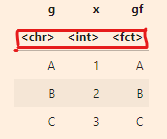

In [24]:
str(dat)

'data.frame':	3 obs. of  3 variables:
 $ group      : chr  "A" "B" "C"
 $ value      : int  1 2 3
 $ groupfactor: Factor w/ 3 levels "A","B","C": 1 2 3


## 向数据框添加列

💡只需把值赋到新列即可：

如果把单个值赋到新列，整个列都将是这个值。下面的例子是增加一个新列，值全都是NA

In [25]:
dat$newcol <- NA

## 从数据框中删除一列

💡把该列的值赋为 NULL 即可

In [27]:
dat$group <- NULL
dat

value,groupfactor,newcol
<int>,<fct>,<lgl>
1,A,NA
2,B,NA
3,C,NA


也可以用subset()函数并将一个**`-`**（减号）置于待删除的列之前：

In [32]:
# 返回不包含barcol列的数据
dat <- subset(dat, select = -value)

In [ ]:
# 排除多列
dat <- subset(dat, select = c(-groupfactor, -newcol))

## 重命名数据框的列名

💡使用`names(dat) <-` 或者 `colnames(dat) <-`函数即可：

In [ ]:
names(dat) <- c('name1', 'name2', 'name3')

如果你想通过列名，重命名某一列：

In [33]:
library(gcookbook) 
names(anthoming)

[1] "angle" "expt"  "ctrl"

In [34]:
names(anthoming)[names(anthoming)=='ctrl'] <- c('Control')
names(anthoming)

[1] "angle"   "expt"    "Control"

也可以通过名字的数值位置重命名：

In [35]:
colnames(anthoming)[1] <- 'Angle'
colnames(anthoming)

[1] "Angle"   "expt"    "Control"

## 重排序数据框的列

💡通过列的 **数值位置** 或者 **名称** 重排序

In [40]:
library(gcookbook)
anthoming

Angle,expt,Control
<int>,<int>,<int>
-20,1,0
-10,7,3
0,2,3
10,0,3
20,0,1


In [41]:
# 列表风格的索引
anthoming[c(1,3,2)]

Angle,Control,expt
<int>,<int>,<int>
-20,0,1
-10,3,7
0,3,2
10,3,0
20,1,0


In [42]:
# 矩阵风格的索引
anthoming[,c(1,3,2)] # 逗号之前的空白表示输出所有行

Angle,Control,expt
<int>,<int>,<int>
-20,0,1
-10,3,7
0,3,2
10,3,0
20,1,0


这种情况下，两种方法都会得到数据框。  
❗然而，当你单独检索一列的时候，列表风格的索引会得到数据框，而矩阵风格的索引得到的是向量，除非你加上参数`drop=FALSE`:

In [44]:
str(anthoming[3]) # 列表风格的索引

'data.frame':	5 obs. of  1 variable:
 $ Control: int  0 3 3 3 1


In [48]:
str(anthoming[,3]) # 矩阵风格的索引， 获得向量

 int [1:5] 0 3 3 3 1


In [47]:
str(anthoming[,3, drop = FALSE]) # 矩阵风格的索引，并添加参数 drop=FALSE, 获得数据框

'data.frame':	5 obs. of  1 variable:
 $ Control: int  0 3 3 3 1


## 从数据框提取子集

使用`subset()`函数。

In [50]:
library(gcookbook)
str(climate)

'data.frame':	499 obs. of  6 variables:
 $ Source    : chr  "Berkeley" "Berkeley" "Berkeley" "Berkeley" ...
 $ Year      : num  1800 1801 1802 1803 1804 ...
 $ Anomaly1y : num  NA NA NA NA NA NA NA NA NA NA ...
 $ Anomaly5y : num  NA NA NA NA NA NA NA NA NA NA ...
 $ Anomaly10y: num  -0.435 -0.453 -0.46 -0.493 -0.536 -0.541 -0.59 -0.695 -0.763 -0.818 ...
 $ Unc10y    : num  0.505 0.493 0.486 0.489 0.483 0.475 0.468 0.461 0.453 0.451 ...


In [52]:
# 选取 Source 是 Berkeley 的行，并且选取名字为 Year 和 Anomaly10y 的列
climate.berkeley <- subset(climate, Source=='Berkeley', select = c(Year, Anomaly10y))
head(climate.berkeley,2)

,Year,Anomaly10y
,<dbl>,<dbl>
1,1800,-0.435
2,1801,-0.453


还可以通过使用 **`|`** (**OR**) 和 **`&`** (**AND**)操作符同时施加多种筛选条件。

In [54]:
climate.berkeley.hundred <- subset(climate, Source=='Berkeley' & Year>=1900 & Year<=2000, select = c(Year, Anomaly10y))
head(climate.berkeley.hundred, 2)

,Year,Anomaly10y
,<dbl>,<dbl>
101,1900,-0.171
102,1901,-0.162


也可以在方括号内加入索引来得到子数据框，虽然这种方法不是很优雅。

In [56]:
# 逗号后面的部分提取列
climate.indexsub<- climate[ climate$Source=='Berkeley' & climate$Year >= 1900 & climate$Year <=2000, c('Year', 'Anomaly10y')]
head(climate.indexsub,2)

,Year,Anomaly10y
,<dbl>,<dbl>
101,1900,-0.171
102,1901,-0.162


如果用这种方式得到的结果<u>只有一列</u>，那么它会返回一个向量而不是数据框，除非使用参数 `drop=FALSE`:

最后，还可以通过行和列的数值位置提取子数据框。

In [58]:
# 不建议使用数据索引，可读性不好
climate.indexpos <- subset(climate[1:100, c(2,5)])

## 改变因子水平的顺序

💡因子的水平可以由函数`factor()`具体设定。

In [59]:
# 默认的因子水平的顺序是按字母排列的
sizes <- factor(c('small','large','large','small','medium'))
sizes

[1] small  large  large  small  medium
Levels: large medium small

In [60]:
# 改变因子水平的顺序
sizes <- factor(sizes, levels = c('small', 'medium', 'large'))
sizes

[1] small  large  large  small  medium
Levels: small medium large

因子的顺序也可以在第一次创建因子时通过levels参数来指定

💬R中有两种因子：顺序因子（order factor）和常规因子（regulator factor）。在两种类型中，因子水平都是按照某种顺序排列的；区别在于，对于顺序因子，因子水平的顺序是有意义的，而对于常规因子，因子水平的顺序却没有什么意义。

在ggplot2绘图过程中，因子变量被映射到图形属性中，图形属性会采用因子水平的顺序。如 x 轴，x 轴标签会按因子水平的顺序排列。

如果要颠倒因子水平的顺序，可以使用函数 rev(levels()):

In [61]:
factor(sizes, levels = rev(levels(sizes)))

[1] small  large  large  small  medium
Levels: large medium small

## 根据数据的值改变因子水平的顺序

💡使用函数`reorder()`，该函数有三个参数：因子，排序依据的数据（以哪一列做排序依据）, 汇总数据的函数（操作数据方法）。

In [62]:
# 复制一份数据，因为我们要修改它
iss <- InsectSprays
iss$spray

[1] A A A A A A A A A A A A B B B B B B B B B B B B C C C C C C C C C C C C D D
[39] D D D D D D D D D D E E E E E E E E E E E E F F F F F F F F F F F F
Levels: A B C D E F

In [63]:
head(iss,2)

,count,spray
,<dbl>,<fct>
1,10,A
2,7,A


In [64]:
iss$spray <- reorder(iss$spray, iss$count, FUN = mean)
iss$spray

[1] A A A A A A A A A A A A B B B B B B B B B B B B C C C C C C C C C C C C D D
[39] D D D D D D D D D D E E E E E E E E E E E E F F F F F F F F F F F F
attr(,"scores")
        A         B         C         D         E         F 
14.500000 15.333333  2.083333  4.916667  3.500000 16.666667 
Levels: C E D A B F

起始因子水平的顺序是ABCDEF，重排后的顺序是CEDABF。新的顺序是由 iss\$spray 中每组 iss\$count 的平均值决定的。

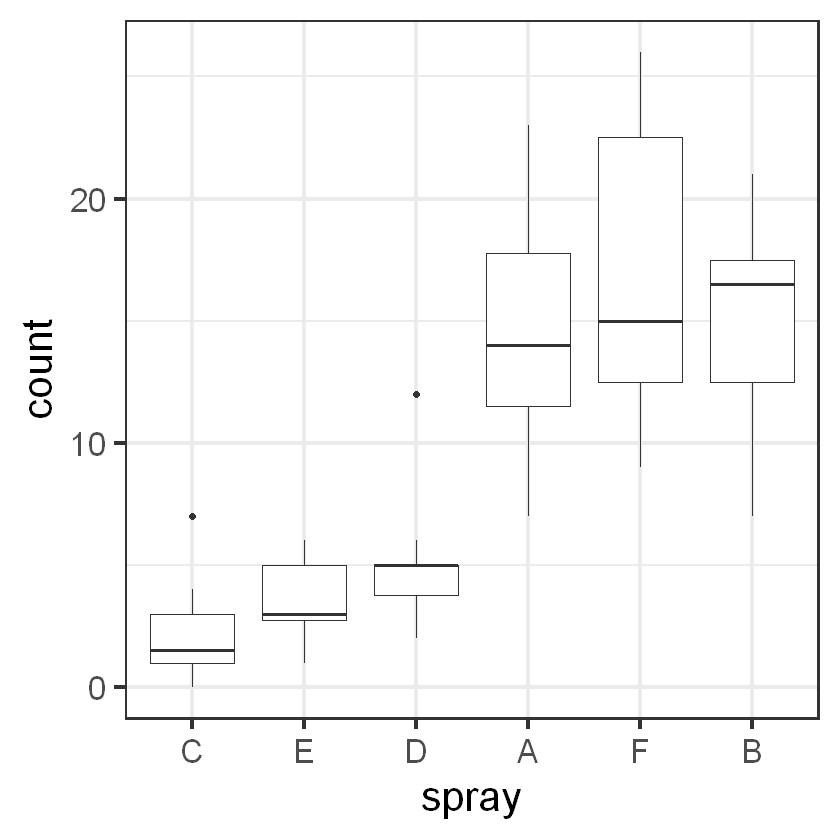

In [70]:
ggplot(data = iss, aes(x=spray,y=count)) + 
 geom_boxplot() + 
 theme_bw(base_size = 25)

注意到这些中位值并不是严格按照从左到右依次递增的顺序的，于是在`reorder()`函数中应用 median() 函数

In [67]:
iss$spray <- reorder(iss$spray, iss$count, FUN = median)
iss$spray

[1] A A A A A A A A A A A A B B B B B B B B B B B B C C C C C C C C C C C C D D
[39] D D D D D D D D D D E E E E E E E E E E E E F F F F F F F F F F F F
attr(,"scores")
   C    E    D    A    B    F 
 1.5  3.0  5.0 14.0 16.5 15.0 
Levels: C E D A F B

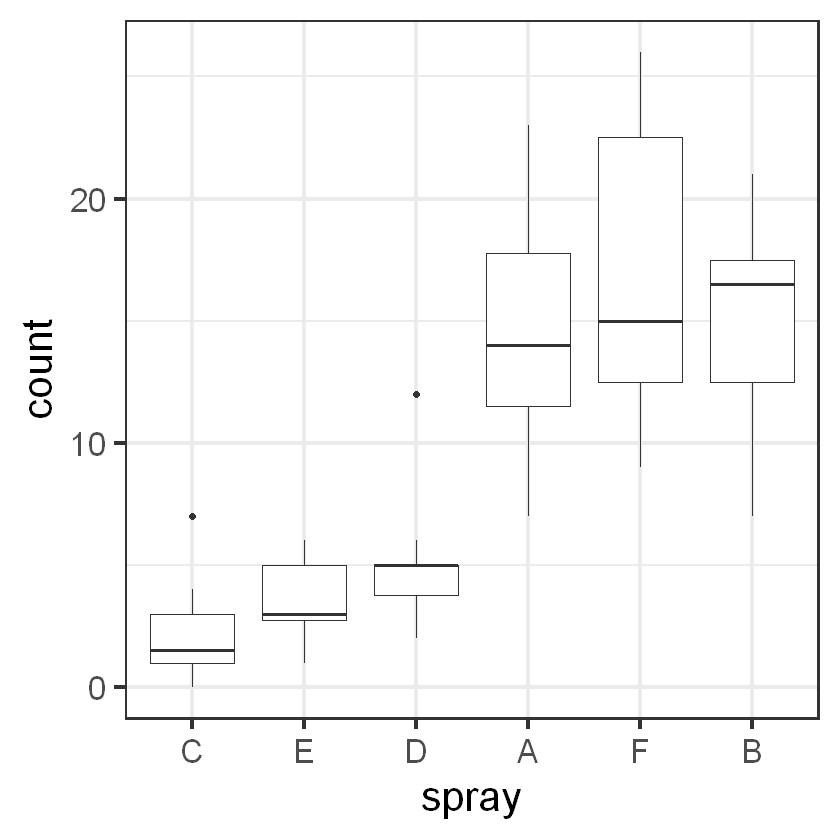

In [72]:
# 以 count 的 median 进行排序
ggplot(data = iss, aes(x=spray,y=count)) + 
 geom_boxplot() + 
 theme_bw(base_size = 25)

## 改变因子水平的名称

使用 plyr包中的`revalue()`函数或`mapvalues()`函数。

In [73]:
levels(sizes)

[1] "small"  "medium" "large"

In [74]:
library(plyr)

In [75]:
sizes1 <- revalue(sizes, c(small="S", medium="M", large="L"))
sizes1

[1] S L L S M
Levels: S M L

In [76]:
# 也可以使用引号——如果原因子水平名称中存在空格等特殊字符，这将很有用
revalue(sizes, c("small"="S", "medium"='M', "large"="L"))

[1] S L L S M
Levels: S M L

In [79]:
# mapvalues()函数使用两组向量，而不是一组映射关系向量
mapvalues(sizes, c("small", "medium", "large"), c("S","M","L"))

[1] S L L S M
Levels: S M L

revalue()函数和mapvalues()函数很方便，但是在R中有一个更传统（也更笨）的方法，使用`levels() <- `函数

In [80]:
sizes <- factor(c('small','large','large','small','medium'))

In [81]:
levels(sizes)[levels(sizes)=='large'] <- 'L'
levels(sizes)[levels(sizes)=='medium'] <- 'M'
levels(sizes)[levels(sizes)=='small'] <- 'S'
sizes

[1] S L L S M
Levels: L M S

如果你要改变所有水平的名称，这里有一个更简单的方法。可以给 levels() 传递一个 list 类型的参数:

In [82]:
sizes <- factor(c('small','large','large','small','medium'))
levels(sizes) <- list(S='small', M='medium', L='large')
sizes

[1] S L L S M
Levels: S M L

在这个方法中，所有因子必须在一个`list`里面指定；如果`list`里面有任何的缺失，缺失的值最终会以`NA`代替

## 去掉因子中不再使用的水平


使用 `droplevels()` 函数

## 把一个分类变量转化为另一个分类变量

使用PlantGrowth数据集的一个子数据集

In [85]:
pg <- PlantGrowth[c(1,2,11,21,22),]
pg

,weight,group
,<dbl>,<fct>
1,4.17,ctrl
2,5.58,ctrl
11,4.81,trt1
21,6.31,trt2
22,5.12,trt2


在这个例子中，使用`cut()`函数把一个连续变量weight转化为分类变量wtclass

In [87]:
pg$wtclass <- cut(pg$weight, breaks = c(0,2,6,Inf))

In [89]:
pg

,weight,group,wtclass
,<dbl>,<fct>,<fct>
1,4.17,ctrl,"(2,6]"
2,5.58,ctrl,"(2,6]"
11,4.81,trt1,"(2,6]"
21,6.31,trt2,"(6,Inf]"
22,5.12,trt2,"(2,6]"


💬我们为三个类设定了四个边界，边界值可以包括无穷`Inf`.如果一个值落在了规定区间外，它的类别将被定为NA（缺失值）。`cut()`函数的输出结果是一个因子，可以从下面这个例子看出：因子水平的名称是以生成的区间命名的。

为了改变因子水平的名称，可以使用cut()中的labels参数

In [91]:
pg$wtclass <- cut(pg$weight, breaks = c(0,5,6,Inf), labels = c('small', 'medium', 'large'))
pg

,weight,group,wtclass
,<dbl>,<fct>,<fct>
1,4.17,ctrl,small
2,5.58,ctrl,medium
11,4.81,trt1,small
21,6.31,trt2,large
22,5.12,trt2,medium


cut生成的区间是左开右闭的。可以通过设置 `include.lowest=TRUE`使得它同时包含最小值和最大值。如果想让区间是左闭右开的，设定参数`right=FALSE`:

## 变量转换

可以使用`$`操作符来引用新列并对齐赋予新值。

In [92]:
library(gcookbook)

In [93]:
hw <- heightweight
head(hw,2)

,sex,ageYear,ageMonth,heightIn,weightLb
,<fct>,<dbl>,<int>,<dbl>,<dbl>
1,f,11.92,143,56.3,85
2,f,12.92,155,62.3,105


In [94]:
hw$heighCm <- hw$heightIn * 22.54

💬为了使代码更容易阅读，可以使用`transform()`或plyr包中的`mutate()`函数。  
只需指定数据框一次，将其作为函数的第一个参数；它们提供了非常清晰的语法，尤其适合转换多个变量：

In [96]:
hw <- transform(hw, heightCm = heightIn * 2.54, weightKg = weightLb / 2.204)
head(hw,1)

,sex,ageYear,ageMonth,heightIn,weightLb,heighCm,heightCm,weightKg
,<fct>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,f,11.92,143,56.3,85,1269.002,143.002,38.56624


In [98]:
library(dplyr)

Warning message:
"package 'dplyr' was built under R version 4.0.5"

Attaching package: 'dplyr'


The following objects are masked from 'package:plyr':

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [100]:
hw <- mutate(hw, heightCm = heightIn * 2.54, weightKg = weightLb / 2.204)

也可以根据多个变量产生一个新的变量：

transform() 和 mutate() 函数的最大区别是 transform() 会同时计算所有的新列，而 mutate() 将依次计算新列，这样在计算新列时，就可以依赖之前的新列。由于bmi是由 heightCm 和 weightKg 计算来的，因此用 transform() 不能同时计算这些变量；先算得到 heightCm 和 weightKg ，再计算 bmi。而 mutate 可以一次完成计算。

In [102]:
hw <- mutate(hw,
       heightCm = heightIn * 2.54,
       weightKg = weightLb / 2.204,
       bmi = weightKg / (heightCm / 100)^2
)

In [103]:
head(hw,2)

,sex,ageYear,ageMonth,heightIn,weightLb,heighCm,heightCm,weightKg,bmi
,<fct>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,f,11.92,143,56.3,85,1269.002,143.002,38.56624,18.85919
2,f,12.92,155,62.3,105,1404.242,158.242,47.64065,19.02542


## 按组转换数据

💡使用 plyr 包中的 ddply() 函数，在参数中调用 transform()，并指定运算：

In [104]:
library(MASS)
library(dplyr)

Warning message:
"package 'MASS' was built under R version 4.0.5"

Attaching package: 'MASS'


The following object is masked from 'package:dplyr':

    select




In [105]:
head(cabbages,2)

,Cult,Date,HeadWt,VitC
,<fct>,<fct>,<dbl>,<int>
1,c39,d16,2.5,51
2,c39,d16,2.2,55


In [107]:
cb <- ddply(cabbages, "Cult", transform, DevWt = HeadWt - mean(HeadWt))

In [108]:
head(cb,2)

,Cult,Date,HeadWt,VitC,DevWt
,<fct>,<fct>,<dbl>,<int>,<dbl>
1,c39,d16,2.5,51,-0.4066667
2,c39,d16,2.2,55,-0.7066667


上面的代码首先会将cabbages数据根据Cult分割成几个独立的数据框。 Cult 上有两个水平，c39 和 c52, 因此也就是分割成两个。然后在这两个数据框上使用 `transform()` 函数，其他参数保持不变。

也可以根据多个变量分组、切割数据框，同时也可以在多个变量上进行运算。本例中将会根据 Cult 和 Date 切割数据，形成两者组合得到的分组，然后计算 HeadWt 和 VitC 在各个组的偏差：

In [111]:
cb <- ddply(cabbages, c('Cult','Date'), transform,
     DevWt = HeadWt - mean(HeadWt), DevVitC = VitC - mean(VitC))
head(cb,2)

,Cult,Date,HeadWt,VitC,DevWt,DevVitC
,<fct>,<fct>,<dbl>,<int>,<dbl>,<dbl>
1,c39,d16,2.5,51,-0.68,0.7
2,c39,d16,2.2,55,-0.98,4.7


## 分组汇总数据

配合 summarise() 函数使用 plyr 包中的 `ddply()` 函数，并指定操作为 summarise

In [112]:
library(MASS)
library(plyr)

In [114]:
ddply(cabbages, c("Cult", "Date"), summarise, Weight = mean(HeadWt),
     VitC = mean(VitC))

Cult,Date,Weight,VitC
<fct>,<fct>,<dbl>,<dbl>
c39,d16,3.18,50.3
c39,d20,2.80,49.4
c39,d21,2.74,54.8
c52,d16,2.26,62.5
c52,d20,3.11,58.9
c52,d21,1.47,71.8


In [115]:
summarise(cabbages, Weight = mean(HeadWt))

Weight
<dbl>
2.593333


`summarise()`计算均值会更合适，得到一行一列的数据框，名为 Weight。

In [116]:
ddply(cabbages, 'Cult', summarise, Weight = mean(HeadWt))

Cult,Weight
<fct>,<dbl>
c39,2.906667
c52,2.280000


上面的代码首先根据 Cult 的值将数据框 cabbages 切割成了几个小数据框。因子 Cult 有两个水平，c39和c52，因此也就有两个数据框，然后在每个数据框上套用 `summarise()`，利用 `mean()` 函数计算每个数据框中 HeadWt 的均值并赋给新的列 Weight。结果就得到了两个一行的数据框，然后 ddply() 将它们合并为一个。

除了求均值，我们还可以做很多其他的事。比方说，你可能想计算每个组的标准差和频数；使用 sd() 来计算标准差， length() 来计算频数

In [119]:
colnames(cabbages)

[1] "Cult"   "Date"   "HeadWt" "VitC"

In [121]:
ddply(cabbages, c('Cult','Date'), summarise, Weight = mean(HeadWt),sd = sd(HeadWt), n = length(HeadWt))

Cult,Date,Weight,sd,n
<fct>,<fct>,<dbl>,<dbl>,<int>
c39,d16,3.18,0.9566144,10
c39,d20,2.80,0.2788867,10
c39,d21,2.74,0.9834181,10
c52,d16,2.26,0.4452215,10
c52,d20,3.11,0.7908505,10
c52,d21,1.47,0.2110819,10


还有一些有用的函数也能够得到汇总统计量，包括 min(), max(), median() 等

### 处理缺失值

首先试一下会发生什么

In [122]:
c1 <- cabbages
c1$HeadWt[c(1,20,45)] <- NA

In [149]:
ddply(c1, c('Cult','Date'), summarise,
     Weight = mean(HeadWt),
     sd = sd(HeadWt),
     n = length(HeadWt))

Cult,Date,Weight,sd,n
<fct>,<fct>,<dbl>,<dbl>,<int>
c39,d16,NA,NA,10
c39,d20,NA,NA,10
c39,d21,2.74,0.9834181,10
c52,d16,2.26,0.4452215,10
c52,d20,NA,NA,10
c52,d21,1.47,0.2110819,10


两个问题。  
第一个问题：如果任一输入值包含NA，mean() 和 sd()函数都会返回NA。幸运的是，这些函数都有一个参数来处理这个问题：设置 na.rm=TRUE即可忽略缺失值。

第二个问题：`length()`没有对缺失值进行特殊处理，而是将它们视为正常值，但这是不对的。可以使用`sum(!is.na(...))`达到相同的效果。 `is.na()` 返回一个逻辑向量：NA返回TRUE，非NA返回TRUE。用 ! 取反后，再用 `sum()` 函数将TRUE的数量加起来。最终的结果就是非缺失值的频数：

In [125]:
ddply(c1, c('Cult','Date'), summarise,
     Weight = mean(HeadWt, na.rm = TRUE),
     sd = sd(HeadWt, na.rm = TRUE),
     n = sum(!is.na(HeadWt)))

Cult,Date,Weight,sd,n
<fct>,<fct>,<dbl>,<dbl>,<int>
c39,d16,3.255556,0.9824855,9
c39,d20,2.722222,0.1394433,9
c39,d21,2.740000,0.9834181,10
c52,d16,2.260000,0.4452215,10
c52,d20,3.044444,0.8094923,9
c52,d21,1.470000,0.2110819,10


### 组合缺失

如果在分类变量中有任何‘空组合’，它们就不会出现在汇总的数据框中。缺失组合会给绘图带来麻烦。

In [128]:
# 复制 cabbages 并移除同时包含c52和d21的行
c2 <- subset(c1, !(Cult=='c52' & Date=='d21'))

c2a <- ddply(c2, c('Cult','Date'), summarise,
     Weight = mean(HeadWt, na.rm = TRUE),
     sd = sd(HeadWt, na.rm = TRUE),
     n = sum(!is.na(HeadWt)))
c2a

Cult,Date,Weight,sd,n
<fct>,<fct>,<dbl>,<dbl>,<int>
c39,d16,3.255556,0.9824855,9
c39,d20,2.722222,0.1394433,9
c39,d21,2.740000,0.9834181,10
c52,d16,2.260000,0.4452215,10
c52,d20,3.044444,0.8094923,9


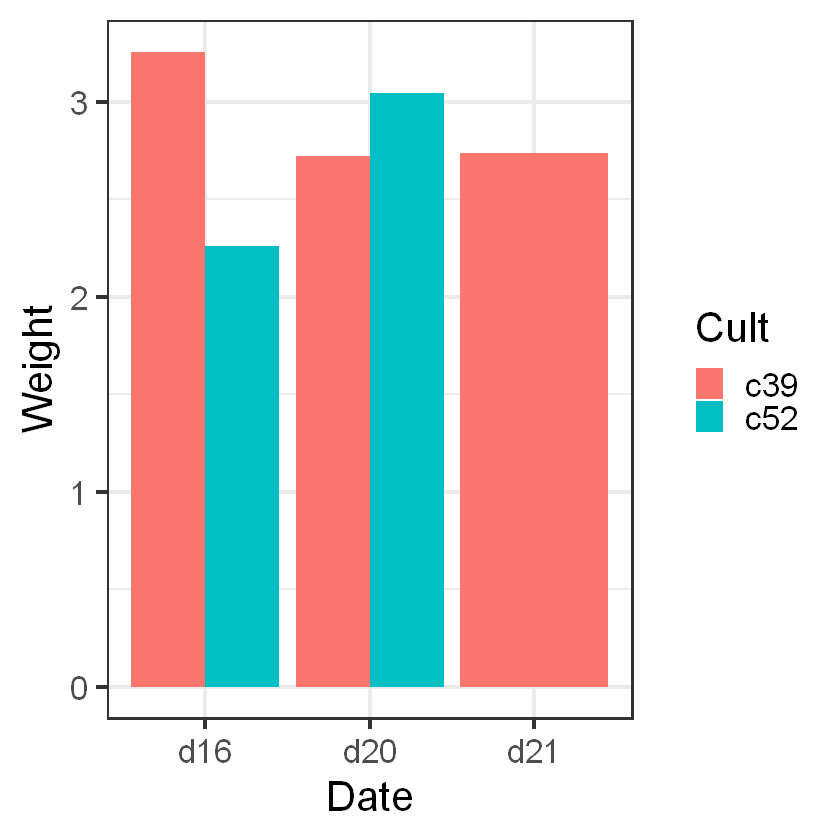

In [134]:
ggplot(c2a, aes(x=Date, y=Weight, fill=Cult)) + 
 geom_bar(stat='identity', position = position_dodge()) + 
 theme_bw(base_size = 25)

为了填充缺失的组合，在ddply() 函数中使用 `.drop=FALSE`即可：

In [138]:
c2b <- ddply(c2, c('Cult','Date'), .drop = FALSE, summarise,
     Weight = mean(HeadWt, na.rm = TRUE),
     sd = sd(HeadWt, na.rm = TRUE),
     n = sum(!is.na(HeadWt)))
c2b

Cult,Date,Weight,sd,n
<fct>,<fct>,<dbl>,<dbl>,<int>
c39,d16,3.255556,0.9824855,9
c39,d20,2.722222,0.1394433,9
c39,d21,2.740000,0.9834181,10
c52,d16,2.260000,0.4452215,10
c52,d20,3.044444,0.8094923,9
c52,d21,NaN,NA,0


Warning message:
"Removed 1 rows containing missing values (geom_bar)."


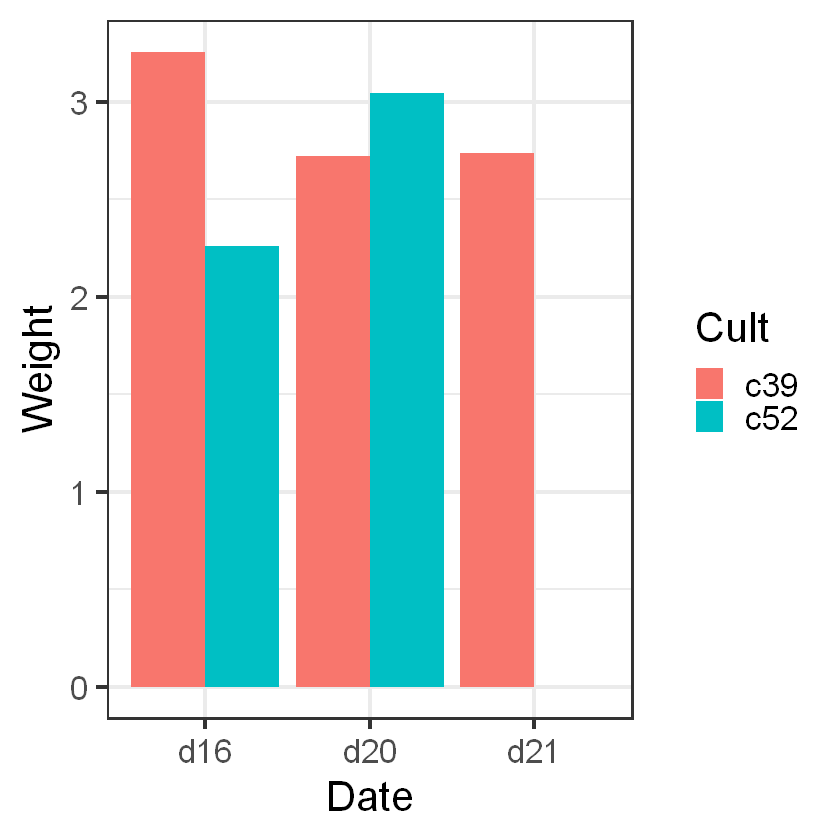

In [139]:
ggplot(c2b, aes(x=Date, y=Weight, fill=Cult)) + 
 geom_bar(stat='identity', position = position_dodge()) + 
 theme_bw(base_size = 25)

## 使用标准误差和置信区间来汇总数据

In [143]:
ca <- ddply(cabbages, c('Cult', 'Date'), summarise,
     Weight = mean(HeadWt, na.rm = TRUE), 
     sd = sd(HeadWt, na.rm = TRUE),
     n = sum(!is.na(HeadWt)),
     se = sd / sqrt(n))
ca

Cult,Date,Weight,sd,n,se
<fct>,<fct>,<dbl>,<dbl>,<int>,<dbl>
c39,d16,3.18,0.9566144,10,0.30250803
c39,d20,2.80,0.2788867,10,0.08819171
c39,d21,2.74,0.9834181,10,0.31098410
c52,d16,2.26,0.4452215,10,0.14079141
c52,d20,3.11,0.7908505,10,0.25008887
c52,d21,1.47,0.2110819,10,0.06674995


计算均值的标准差包括两步：首先计算各组的标准差和频数，然后用这些值来计算得到标准误差。各组的标准误差就是标准差除以样本量的平方根。

## 置信区间

置信区间是通过均值的标准误差和自由度计算得到的。要计算置信区间，首先使用`qt()`得到分位数，然后和标准误差相乘即可。  
给定概率值和自由度，`qt()` 函数会计算出对应t分布的分位数。  
对95%的置信区间来说，应该使用0.975的概率值；对钟形的t分布，这对应了曲线两端各2.5%的面积。自由度是样本量大小减去1.

下面的代码将会计算每组标准误差的乘数。由于一共有6个组，并且每个组都有10个观测值，因此它们会有相同的乘数。

In [144]:
ciMult <- qt(.975, ca$n-1)
ciMult

[1] 2.262157 2.262157 2.262157 2.262157 2.262157 2.262157

现在我们将上面的向量乘以标准误差来得到95%的置信区间：

In [145]:
ca$ci <- ca$se * ciMult

In [147]:
ca

Cult,Date,Weight,sd,n,se,ci
<fct>,<fct>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
c39,d16,3.18,0.9566144,10,0.30250803,0.6843207
c39,d20,2.80,0.2788867,10,0.08819171,0.1995035
c39,d21,2.74,0.9834181,10,0.31098410,0.7034949
c52,d16,2.26,0.4452215,10,0.14079141,0.3184923
c52,d20,3.11,0.7908505,10,0.25008887,0.5657403
c52,d21,1.47,0.2110819,10,0.06674995,0.1509989


误差条表示均值的标准误差，它和置信区间有相同的功能：估计总体均值的好坏程度。  
标准误差是抽样分布的标准差

## 把数据从“宽”变“长”

💡使用 reshape2 包中的 `melt()` 函数。在 anthoming 数据集中，angle 表示蚂蚁行进方向与家的方向的角度，实验组（expt）、对照组（ctrl）的数值表示在两组中蚂蚁的数量。

In [150]:
library(gcookbook)

In [151]:
anthoming

Angle,expt,Control
<int>,<int>,<int>
-20,1,0
-10,7,3
0,2,3
10,0,3
20,0,1


为了得到便于分析绘图的数据结果，对以上数据进行结构重塑

In [152]:
library(reshape2)

In [155]:
# 'Angle' 为 标识变量， 'expt' 和 'control' 为非标识变量，这里两个非标识变量都成为了度量变量，汇成了 condition 的一部分。
melt(anthoming, id.vars = 'Angle', variable.name = 'condition', value.name = 'count')

Angle,condition,count
<int>,<fct>,<int>
-20,expt,1
-10,expt,7
0,expt,2
10,expt,0
20,expt,0
-20,Control,0
-10,Control,3
0,Control,3
10,Control,3


如果不想用所有的非标识变量(如上的 'expt' 和 'control')作为度量变量，可以指明哪些变量是你需要的(使用 measure.vars)。

In [156]:
drunk

sex,0-29,30-39,40-49,50-59,60+
<chr>,<int>,<int>,<int>,<int>,<int>
male,185,207,260,180,71
female,4,13,10,7,10


In [158]:
melt(drunk, id.vars = 'sex', measure.vars = c('0-29','30-39'), variable.name = 'age', value.name = 'count')

sex,age,count
<chr>,<fct>,<int>
male,0-29,185
female,0-29,4
male,30-39,207
female,30-39,13


同时，也可以用多列作为标识度量：

In [159]:
plum_wide

length,time,dead,alive
<chr>,<chr>,<int>,<int>
long,at_once,84,156
long,in_spring,156,84
short,at_once,133,107
short,in_spring,209,31


In [160]:
melt(plum_wide, id.vars = c('length', 'time'), variable.name = 'survival', value.name = 'count')

length,time,survival,count
<chr>,<chr>,<fct>,<int>
long,at_once,dead,84
long,in_spring,dead,156
short,at_once,dead,133
short,in_spring,dead,209
long,at_once,alive,156
long,in_spring,alive,84
short,at_once,alive,107
short,in_spring,alive,31


有些数据集并不具备标识变量。这种情况中，可以在用 `melt()` 函数之前，给这个数据框添加一个标识变量。

In [161]:
co <- corneas
co

affected,notaffected
<int>,<int>
488,484
478,478
480,492
426,444
440,436
410,398
458,464
460,476


In [168]:
# 添加标识列
co$id <- as.character(1:nrow(co)) # 用数值做标识列，在后续分析中很可能会出问题，所以 用 as.character() 函数或者 用 factor() 转化一下

In [167]:
melt(co, id.vars = 'id', variable.name = 'eye', value.name = 'count')

id,eye,count
<chr>,<fct>,<int>
1,affected,488
2,affected,478
3,affected,480
4,affected,426
5,affected,440
6,affected,410
7,affected,458
8,affected,460
1,notaffected,484


## 把数据框从“长”到宽

使用 reshape2 包中的 dcast() 函数。

In [169]:
library(gcookbook)

In [170]:
plum

length,time,survival,count
<chr>,<chr>,<fct>,<int>
long,at_once,dead,84
long,in_spring,dead,156
short,at_once,dead,133
short,in_spring,dead,209
long,at_once,alive,156
long,in_spring,alive,84
short,at_once,alive,107
short,in_spring,alive,31


In [171]:
library(reshape2)

In [173]:
# ~ 左侧为标识变量， 右边表示可变变量
dcast(plum, length + time ~ survival, value.var = 'count')

length,time,dead,alive
<chr>,<chr>,<int>,<int>
long,at_once,84,156
long,in_spring,156,84
short,at_once,133,107
short,in_spring,209,31


# ComplexHeatmap

In [1]:
library(ComplexHeatmap)

Loading required package: grid

ComplexHeatmap version 2.4.3
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite:
Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
  genomic data. Bioinformatics 2016.

This message can be suppressed by:
  suppressPackageStartupMessages(library(ComplexHeatmap))




# 在ggplot2图形上添加显著性差异注释

参考资料:  
[如何在ggplot2图形上添加显著性差异注释](https://cloud.tencent.com/developer/article/1692505)

In [4]:
library(ggsignif)
library(ggplot2)

In [2]:
data(iris)

In [3]:
head(iris,2)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa


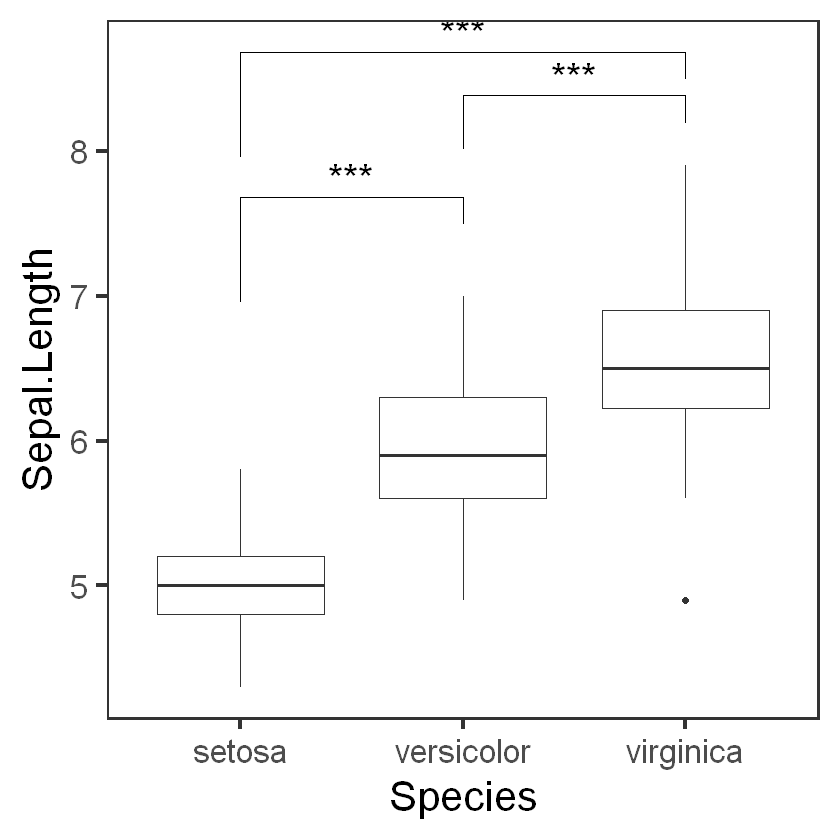

In [9]:
ggplot(iris, aes(x=Species, y=Sepal.Length)) + 
 geom_boxplot() +
 theme_bw(base_size = 25) +
 theme(panel.grid = element_blank()) +
 geom_signif(comparisons = list(c("setosa", "versicolor"),
                                 c("setosa", "virginica"),
                                 c("versicolor", "virginica")),
              y_position=c(7.5, 8.5, 8.2), 
              tip_length = c(0.2, 0.05, 0.2, 0.05, 0.1, 0.05),
              map_signif_level=TRUE,
              textsize=8)

In [5]:
ggplot(dat, aes(Group, Value)) +
  geom_bar(aes(fill = Sub), stat="identity", position="dodge", width=.5) +
  geom_signif(y_position=c(6.0, 8.5), xmin=c(0.85, 1.85), xmax=c(1.15, 2.15),
              annotation=c("**", "NS"), tip_length=0.04) + 
  geom_signif(comparisons=list(c("S1", "S2")),
              y_position = 9.3, tip_length = 0.04, vjust=0.2)

ERROR: Error in ggplot(dat, aes(Group, Value)): 找不到对象'dat'


## 参数解释
mapping # 由aes()或aes_()创建的美学映射集。如果指定且inherit.aes=TRUE（默认值），它将与绘图顶层的默认映射结合。如果没有绘图映射，则必须提供映射。  
data # 绘图数据所在的数据框  
position # 位置调整；可以是字符串，也可以是位置调整函数的结果  
na.rm # 逻辑词，默认为FALSE，移除缺失值时显示警告信息，为TRUE，则不显示警告信息。  
show.legend # 逻辑词，是否显示图例  
comparisons # 长度为2的向量列表  
test # 进行统计检验的方法名称，如t.test、wilcox.test、aov()、anova()、kruskal.test() 等。  
test.args # 检验方法的其他参数  
annotations # 替换P值注释的字符向量  
map_signif_level # 布尔值，检验结果P值使用注释或者星号代替  
y_position # 括号线在对齐y轴高度的数字向量  
xmin # 括号线左侧位置的数字向量  
xmax # 括号线右侧位置的数字向量  
step_increase # 数字向量，减少括号线的重叠  
tip_length # 数字向量，显示括号线两端的下降的小竖线，用来指向精确的组别  
size # 设置括号线的宽度  
textsize # 设置文本字体大小  
family # 设置文本字体  
vjust # 相对于括号线，上下调整文本的距离  
parse # 逻辑词，为TRUE，则标签将解析为表达式  